<a href="https://colab.research.google.com/github/armandordorica/APS1070_Anomaly_Detection/blob/master/APS1070_Project_2_part_2_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2, APS1070 Summer 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**

**Deadline: June 18, 23:00 - 20 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: 
*   Student Number: 

##Part 1: Getting started [6 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____
* What features in the dataset are present aside from the 28 main features?  _____
* Which column contains the targets? To what do the values correspond?_____

In [1]:
pip install wget

In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df['rows']= np.arange(0,df['V23'].values.shape[0],1)

In [5]:

### HERE ###

It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? _____
* Is this data considered balanced or unbalanced? Why is this the case?_____
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____



In [6]:
### HERE ###

Next, split the dataset into a training and testing set. Use a test size of one third, and set the random state to 1.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V11? Make sure to only use your training set for this calculation. _____

Use the code below to set up a Gaussian object for V11.

In [31]:

y = df['Class']
X = df.loc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

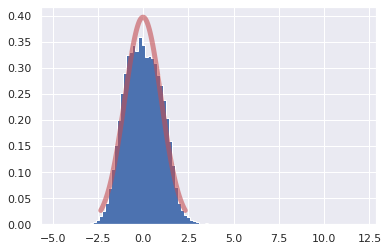

In [32]:


arr = np.array(non_fraud_X_train['V11'])
std_dev = np.std(arr)
mean = np.mean(arr)


from scipy import stats

norm = stats.norm(

    loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V11'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()


We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [33]:
X_train

Time        V1        V2  ...       V28   Amount    rows
37372    38927.0  1.016658  0.139269  ...  0.010645    13.70   37372
215884  140262.0 -2.546080  1.129681  ... -0.191483     1.00  215884
98616    66732.0  1.336743 -0.623283  ...  0.011304    55.00   98616
172195  120995.0 -1.033347 -0.453670  ... -0.017385   389.98  172195
19496    30328.0 -0.440280 -1.339789  ...  0.088869    60.80   19496
...          ...       ...       ...  ...       ...      ...     ...
21440    31666.0 -2.986845 -8.663978  ...  0.404045  2312.26   21440
117583   74729.0  0.937083 -0.849673  ...  0.023771   171.32  117583
73349    55095.0 -1.149963  1.696462  ...  0.031193     7.58   73349
267336  162728.0  1.754554 -0.699398  ... -0.019622    94.80  267336
128037   78576.0 -0.707635  0.493302  ... -0.205589    57.80  128037

[190820 rows x 31 columns]

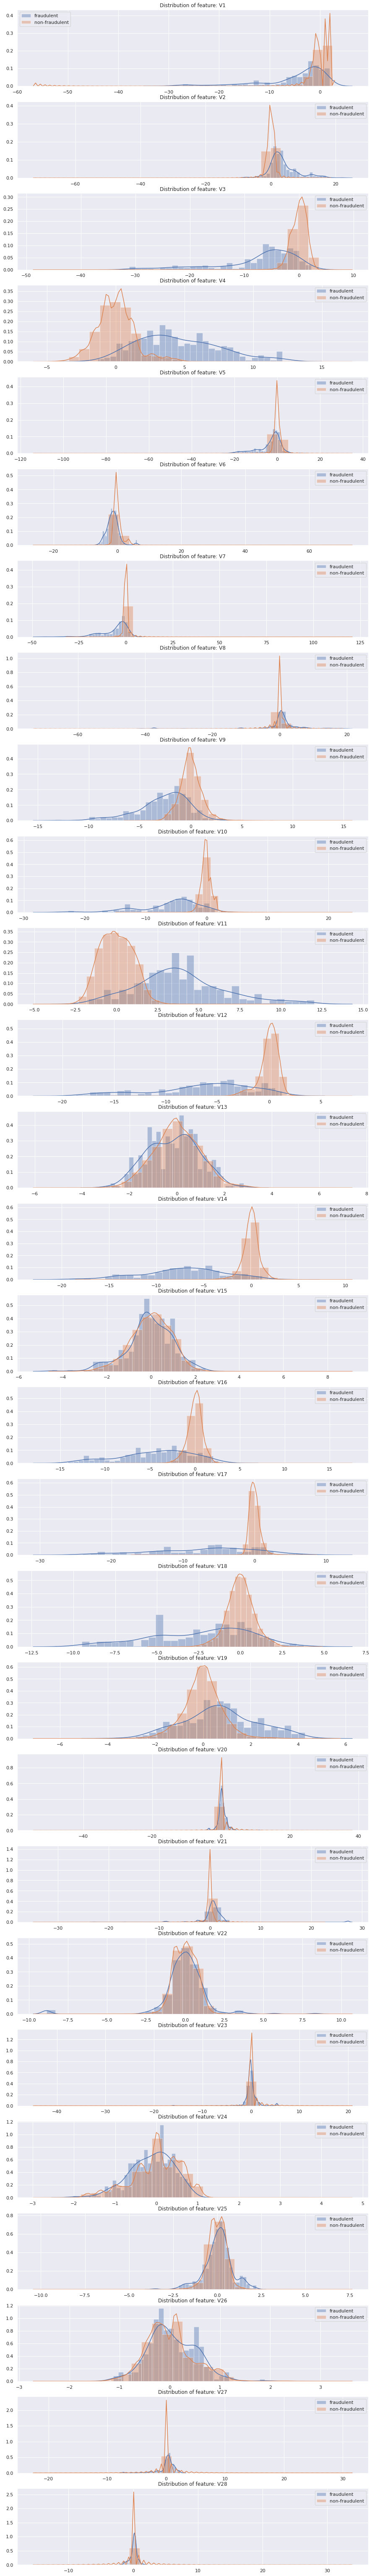

In [35]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

**Q.** Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[2 Marks]**

**Type your answer here**

## Part 2: Single Variable Gaussian Distribution: [7 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. Let's explore the following scenarios:

1.   **One Gaussian:** First, we will fit a single gaussian distribution.

  *   Plot a ROC curve for each feature, fitting non-fraudulent transactions.
  *   Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC (Area under the ROC Curve) **AUC was extremely low for all but the best one was for V14. Best F1 scorw was for V11.**

  *  To make a prediction, we compute the probability that each transaction in the training set belongs to that distribution. If the probability is lower than a threshold, we consider that transaction a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. Report peformance on the test set as well.

  

2.   **Two Gaussians:** In this case, we will fit a Gaussian to each class in the selected feature above — one gaussian to the feature of non-fraudulent transactions and one gaussian for fraudulent transactions. To make predictions, we use the probability of a transaction belonging to the fraudulent Gaussian distribution and non-fraudulent distribution. 

  * Build a classifier using this two-gaussian approach on the training set, and once complete, test performance on the test set.

Summarize your findings.


### Anomaly Detection Algorithm
Given that there are $m$ training examples and $n$ features 
1. Choose features that you think might be indicative of anomalous examples. 
2. Fit Parameters $\mu_1, \mu_2 ..., \mu_n$ as well as $\sigma_1^2, \sigma_2^2, ...\sigma_n^2$

$$
\mu_j = \frac{1}{m} \sum_{i=1}^{m}x_j^{(i)}
$$

where $\mu_j$ is the average value of the $j$th feature. 

$$
\sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}(X_{j}^{(i)} - \mu_j)^2
$$

3. Given new example $x$, compute $p(x)$: 

$$
p(x) = \prod_{j=1}^n p(x_j\; \mu_j, \sigma_j^2)=\prod_{j=1}^n \frac{1}{\sqrt{2\pi\sigma_j} }exp \left( \frac{-(x_j-\mu_j)^2}{2\sigma_j^2}\right)
$$

In [13]:
column_names = ["var_name", "epsilon", "AUC", "F1_score"]

results = pd.DataFrame(columns = column_names)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
import math
from math import e
from sklearn.metrics import accuracy_score
import pandas as pd 
from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score



def p_x(x, mu, sigma): 
  """
  Inputs: x, mu is the average of a gaussian, sigma is the std dev of the gaussian 
  Outputs: probability of a value in a Gaussian 
  """
  return 1/(math.sqrt(2*math.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))


In [86]:

# y_train = y_train.to_frame()

# X_train.reset_index(inplace=True)

# filter_indices = y_train[y_train['Class']==0].index

# non_fraud_X_train = X_train[X_train['index'].isin(filter_indices)]

y = df['Class']
X = df.loc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

y_train = y_train.to_frame()
filter_indices = y_train[y_train['Class']==0].index

non_fraud_X_train = X_train.loc[filter_indices]
fraud_X_train = X_train.loc[y_train[y_train['Class']==1].index]

In [42]:
epsilons = np.arange(0.000,0.3,0.005)[1:]
epsilons

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135,
       0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 ,
       0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225,
       0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 ,
       0.275, 0.28 , 0.285, 0.29 , 0.295])

### **Find probabilities of each of the points of the testing set of belonging to the distribution fitted by non fraudulent transactions of the training set**

Epsilon: 0.005


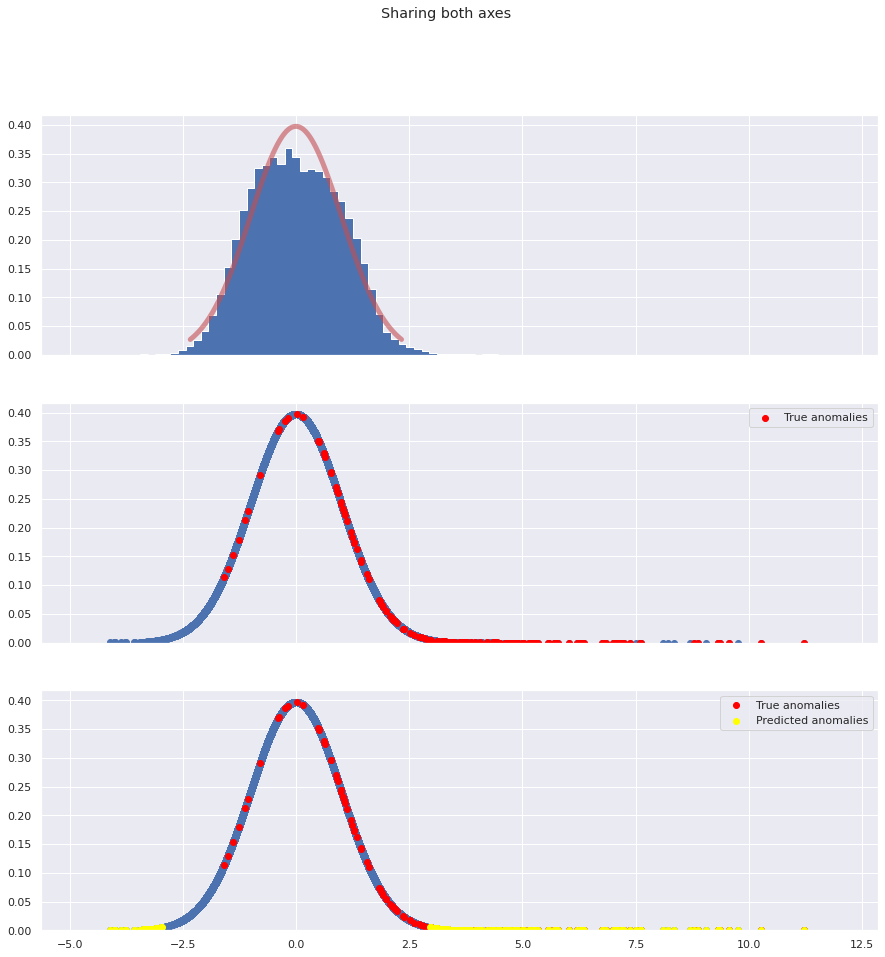

AUC: 0.117


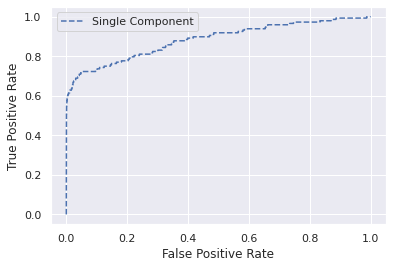

F1 score: 0.409
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

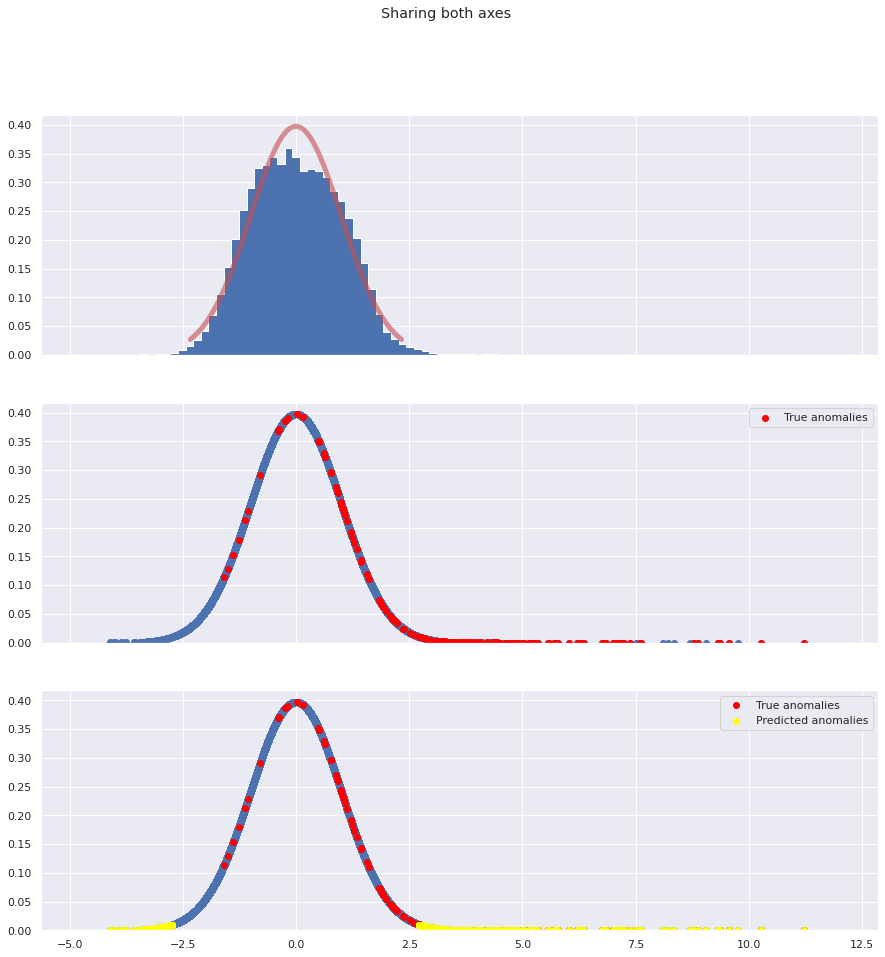

AUC: 0.117


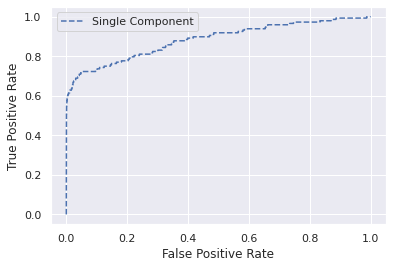

F1 score: 0.280
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

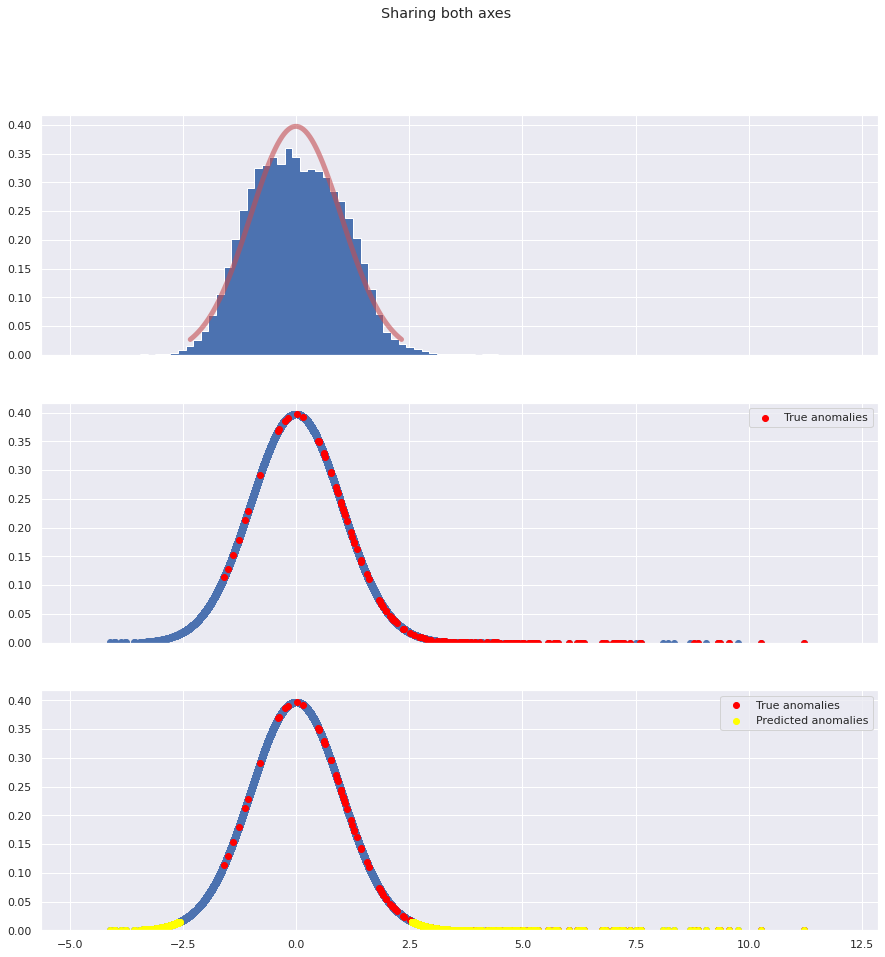

AUC: 0.117


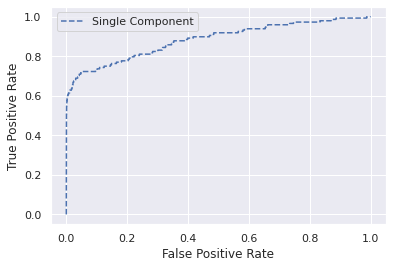

F1 score: 0.211
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

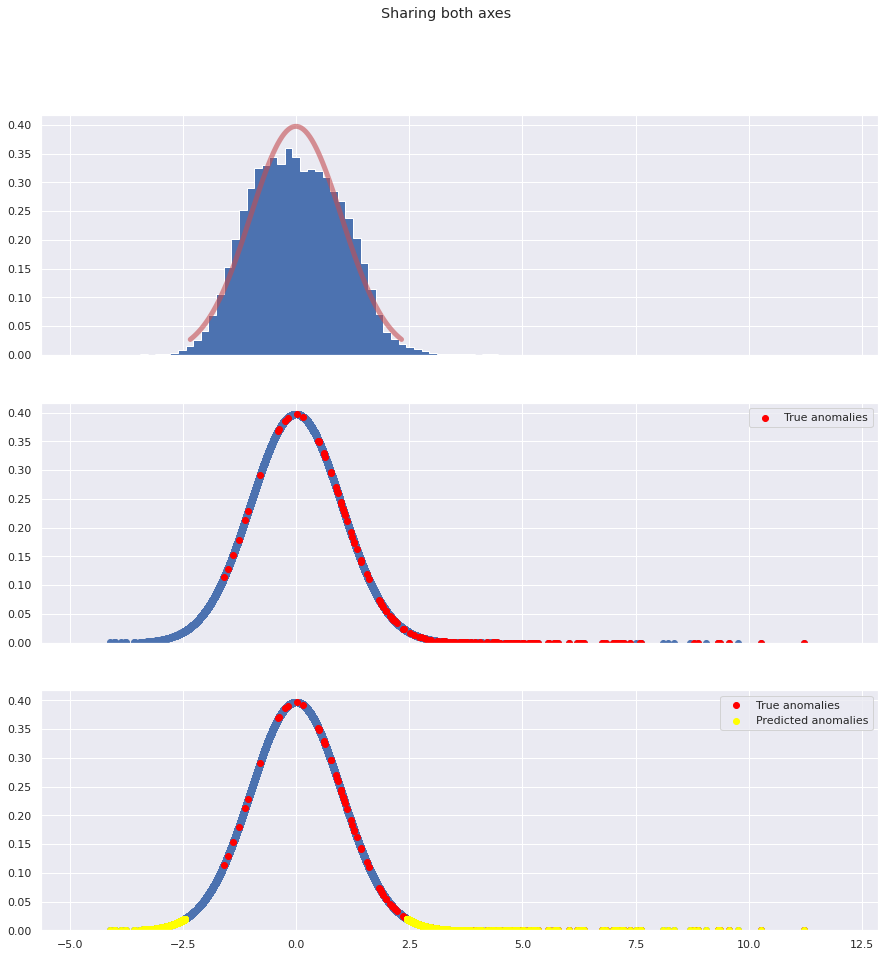

AUC: 0.117


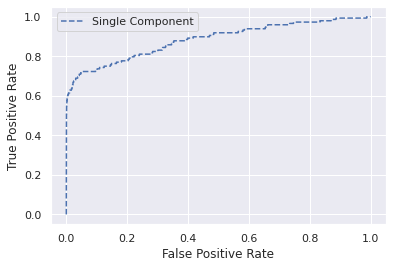

F1 score: 0.167
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

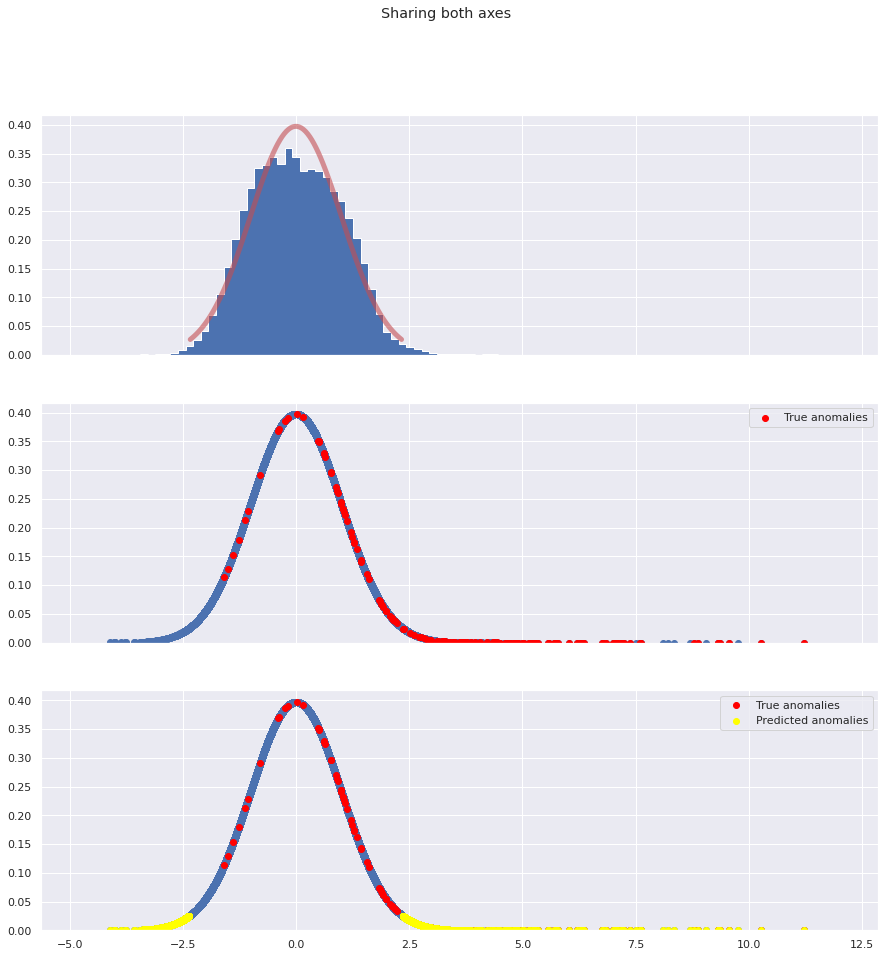

AUC: 0.117


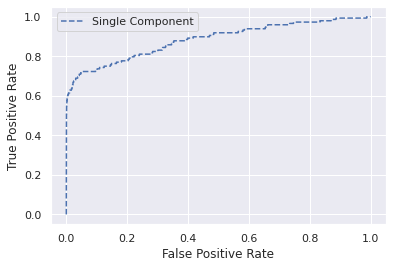

F1 score: 0.139
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

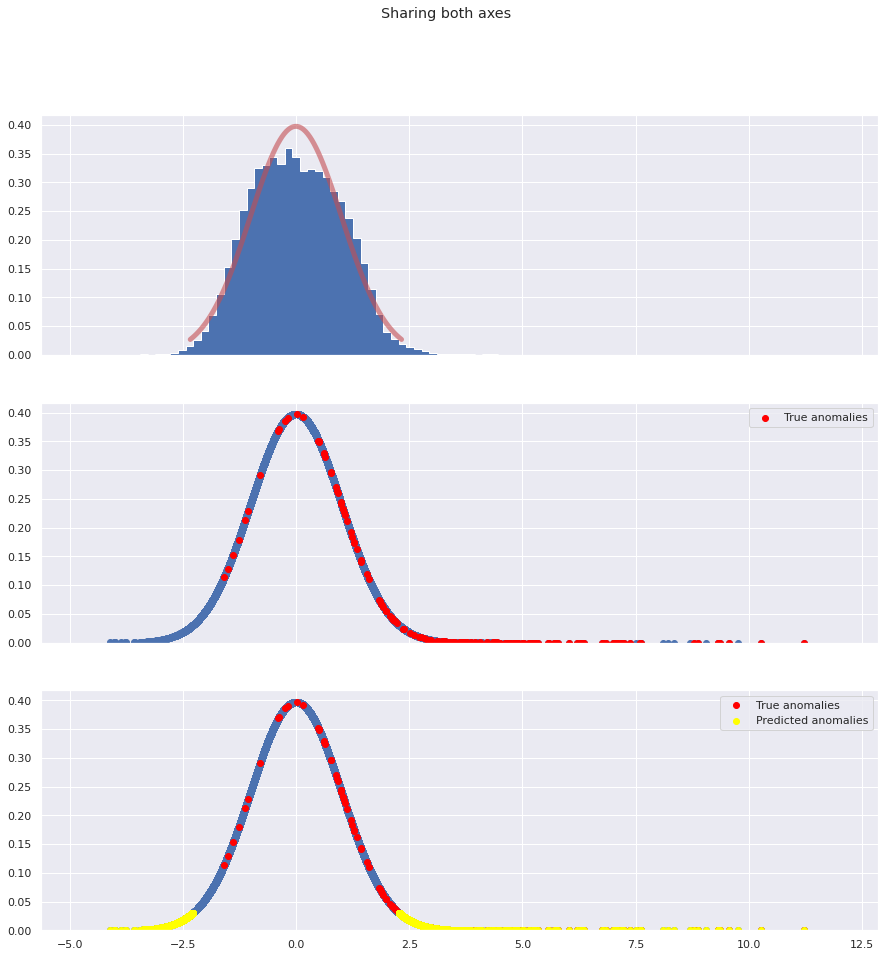

AUC: 0.117


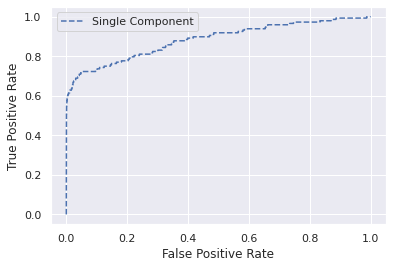

F1 score: 0.115
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

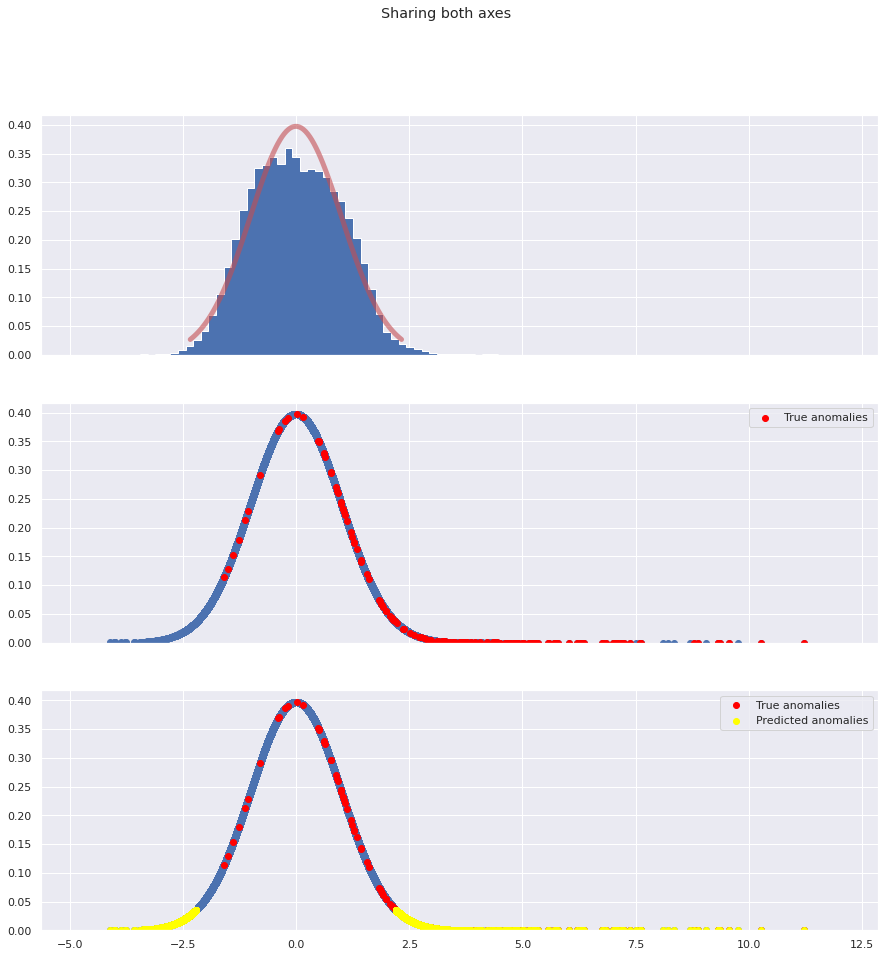

AUC: 0.117


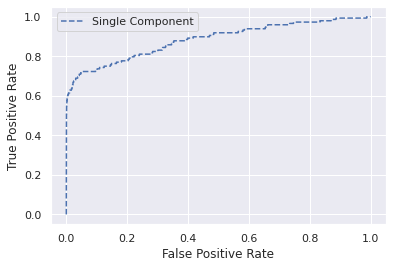

F1 score: 0.100
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

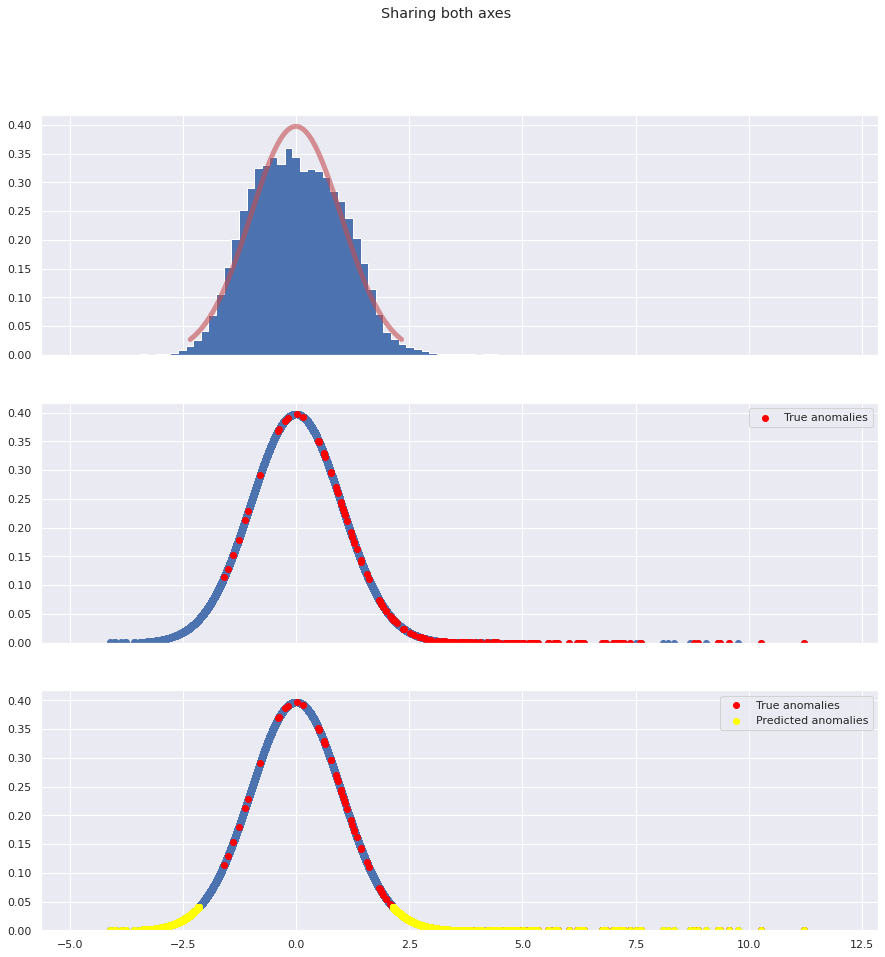

AUC: 0.117


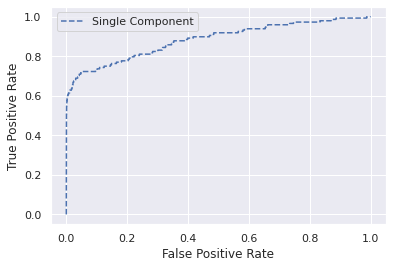

F1 score: 0.089
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

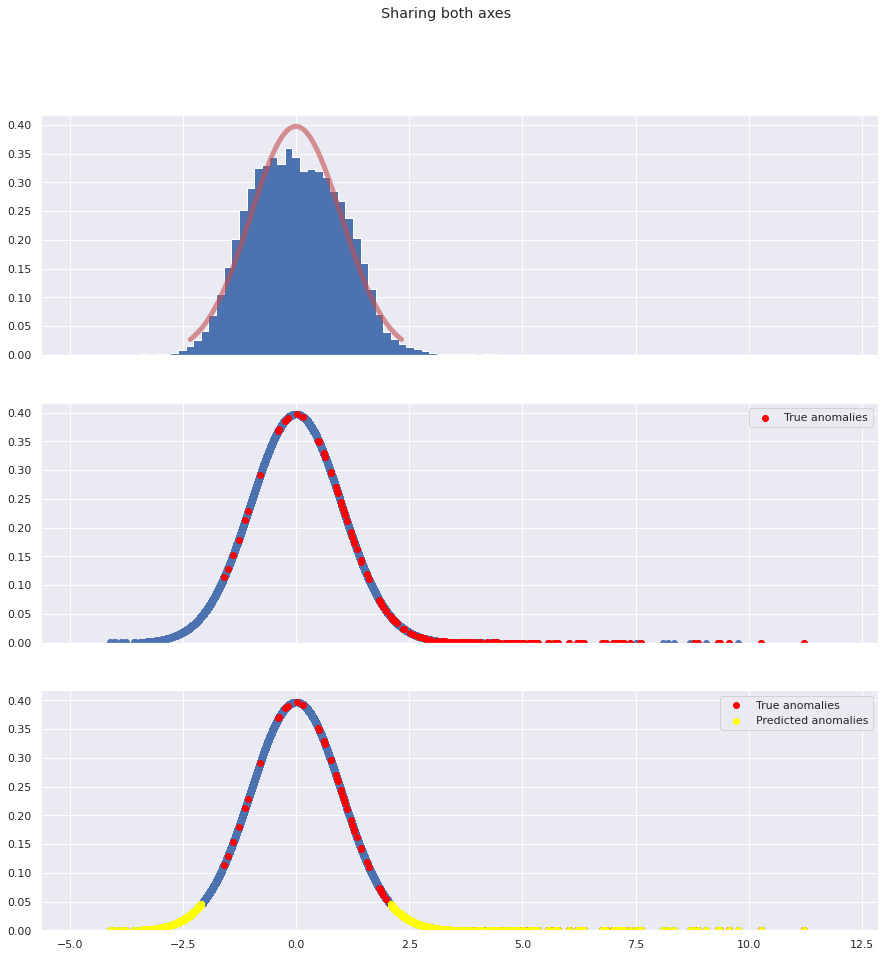

AUC: 0.117


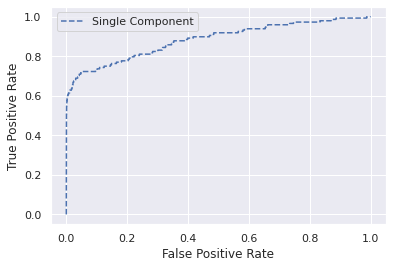

F1 score: 0.081
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

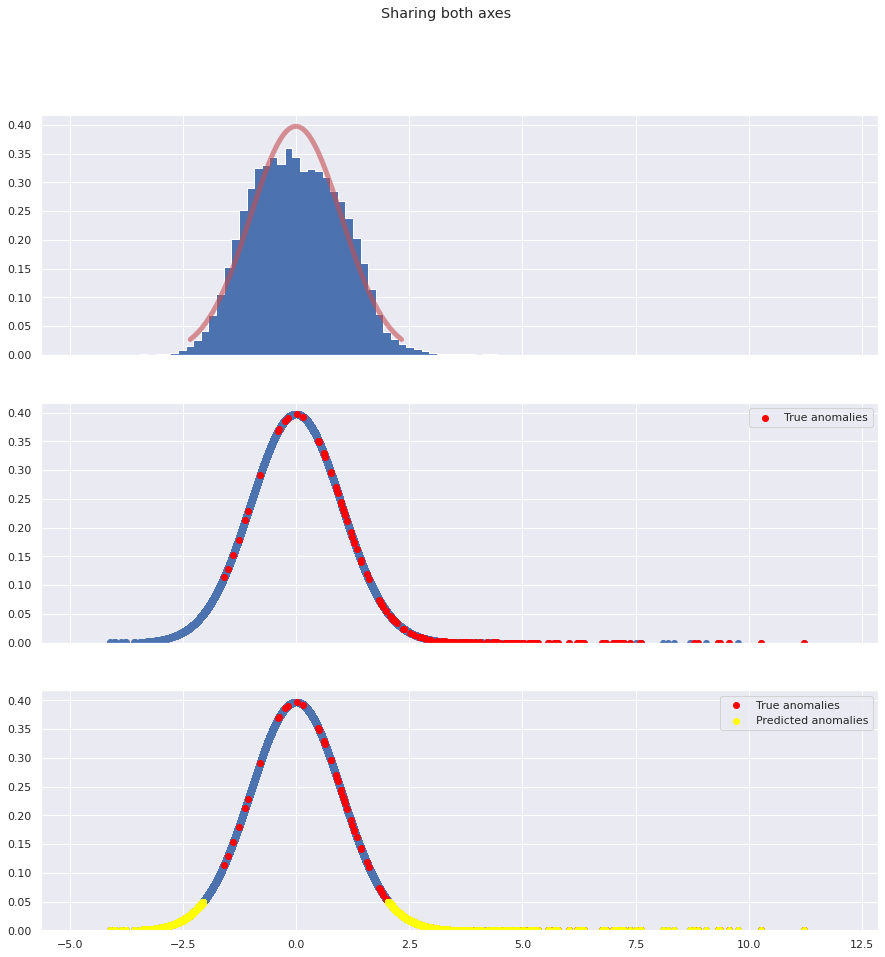

AUC: 0.117


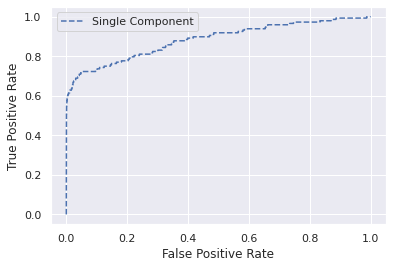

F1 score: 0.072
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

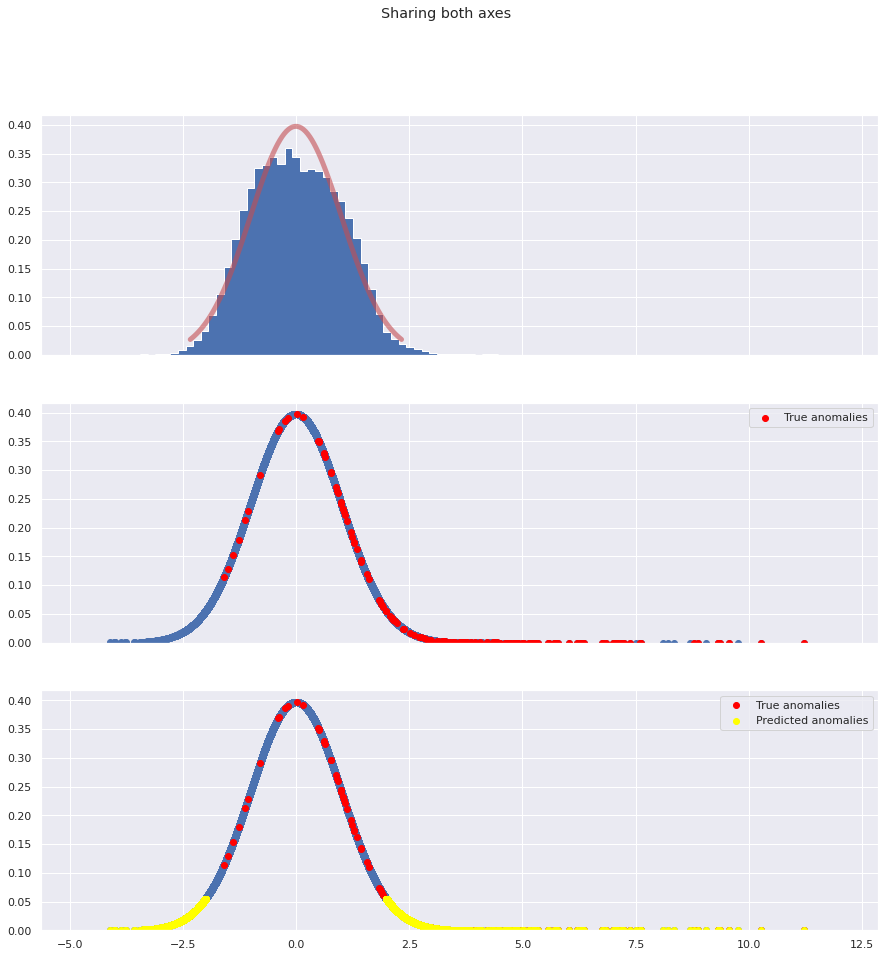

AUC: 0.117


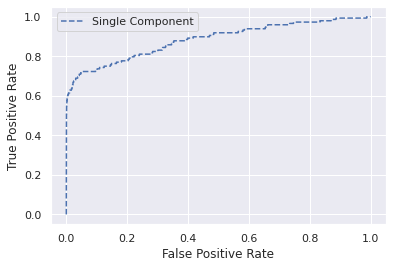

F1 score: 0.064
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

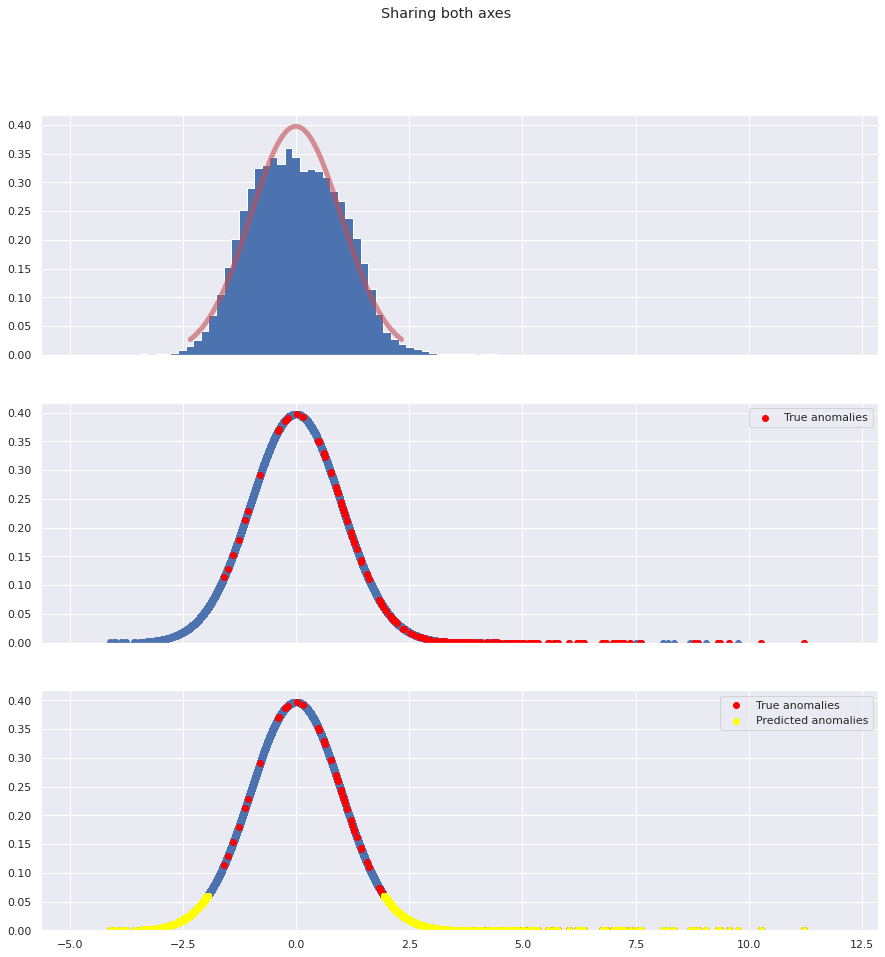

AUC: 0.117


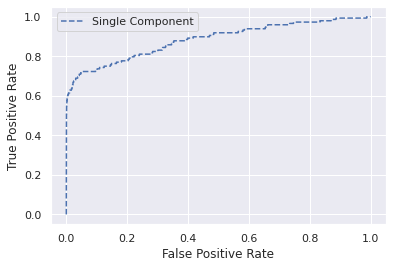

F1 score: 0.057
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

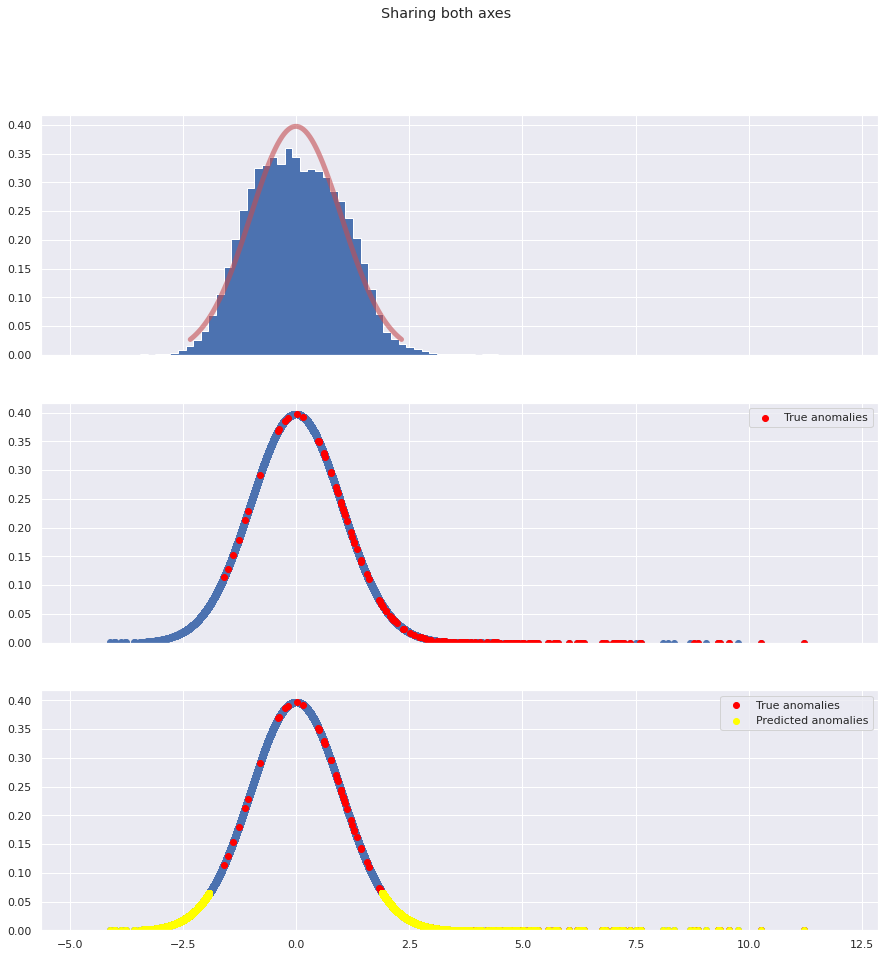

AUC: 0.117


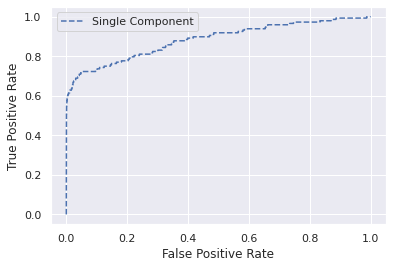

F1 score: 0.052
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

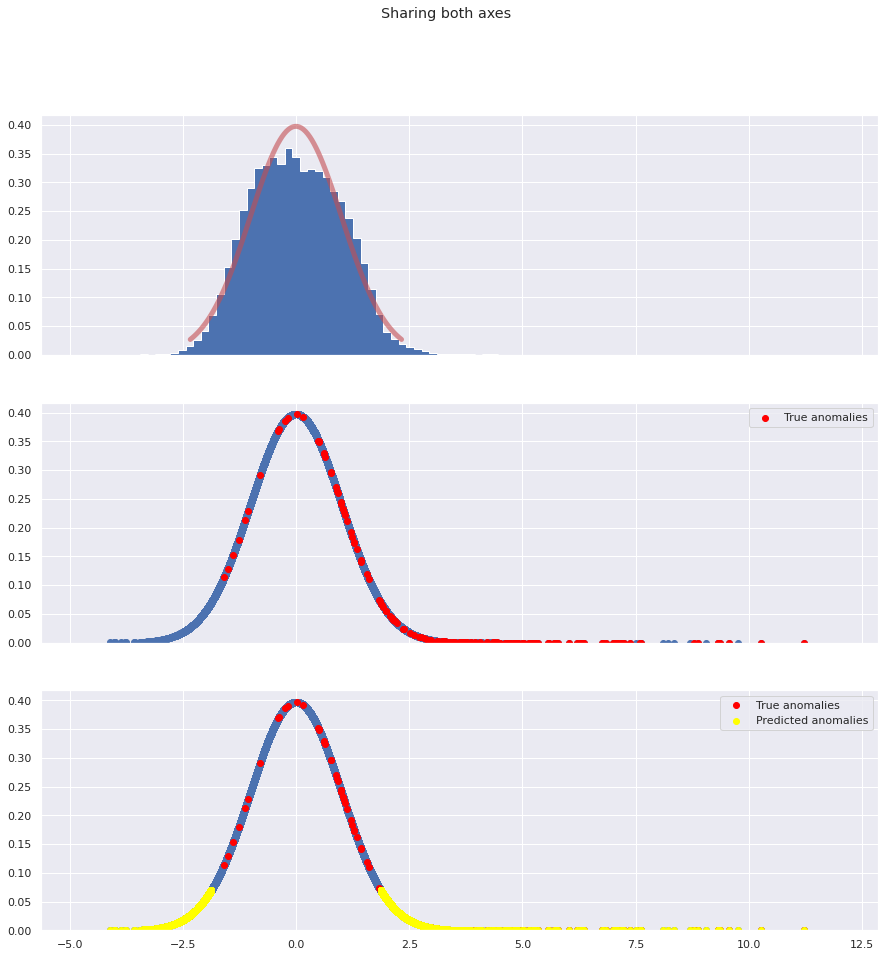

AUC: 0.117


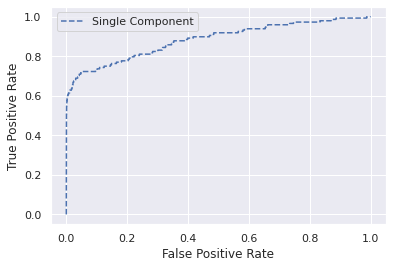

F1 score: 0.047
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

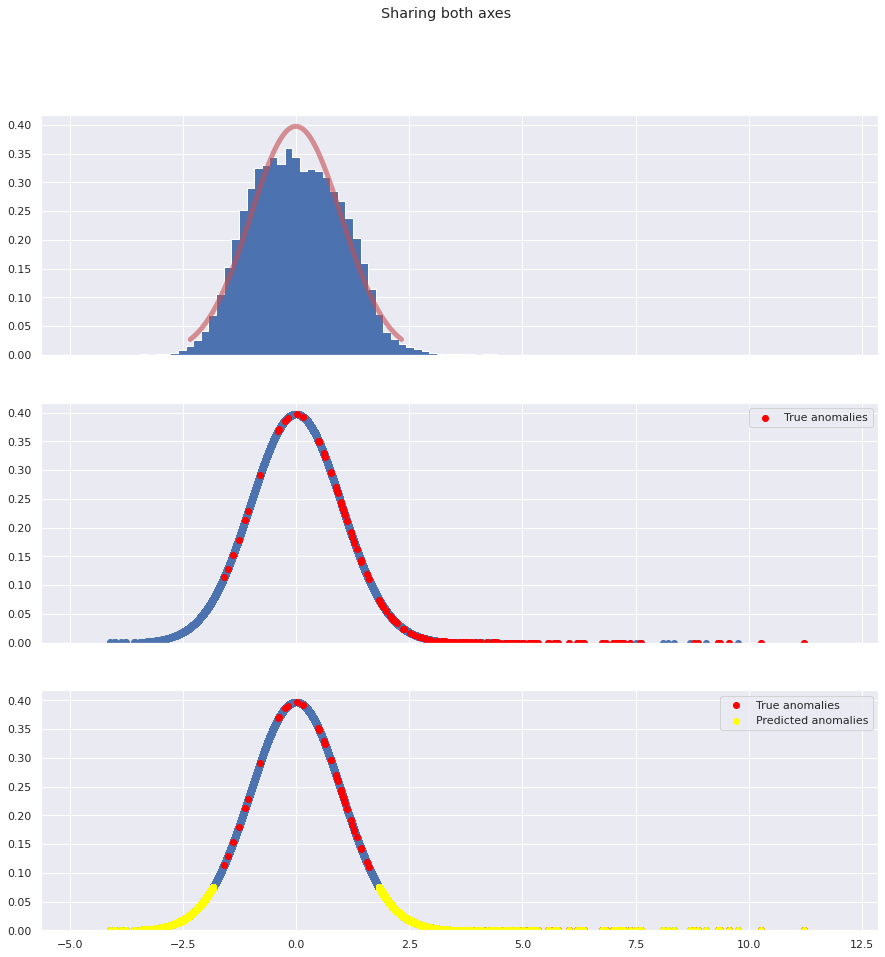

AUC: 0.117


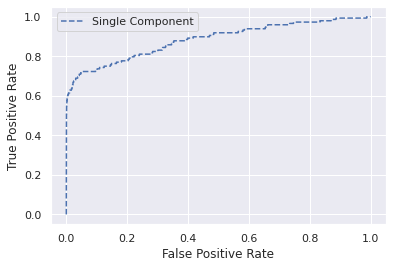

F1 score: 0.043
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

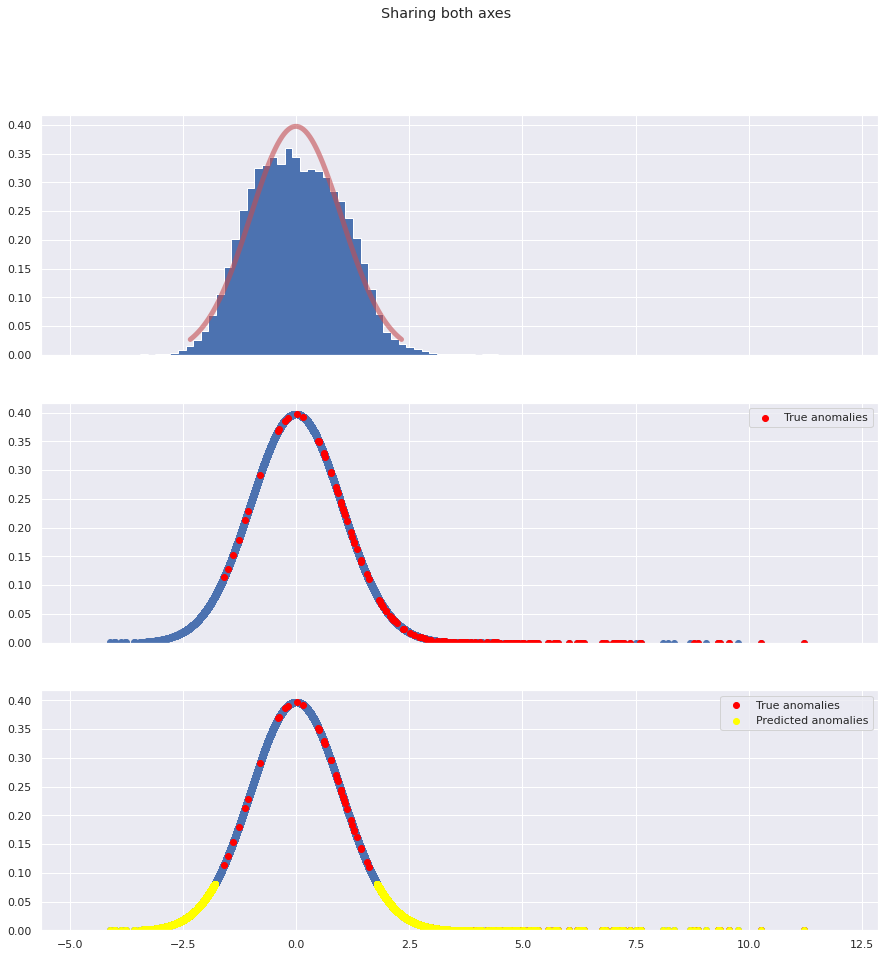

AUC: 0.117


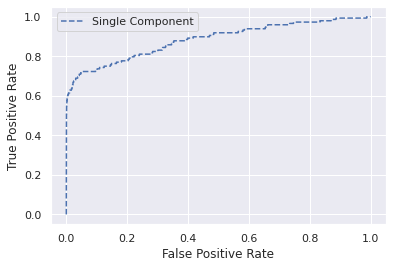

F1 score: 0.039
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

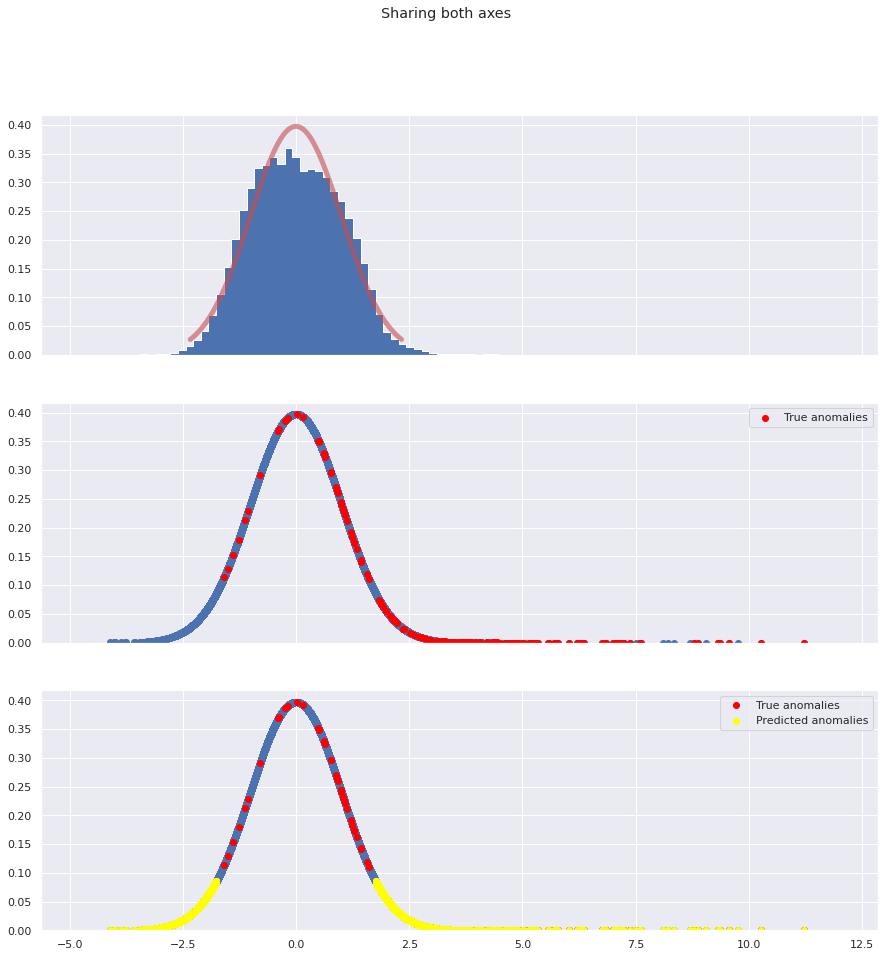

AUC: 0.117


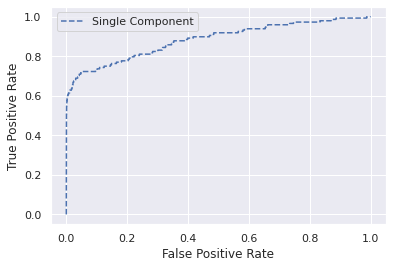

F1 score: 0.035
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

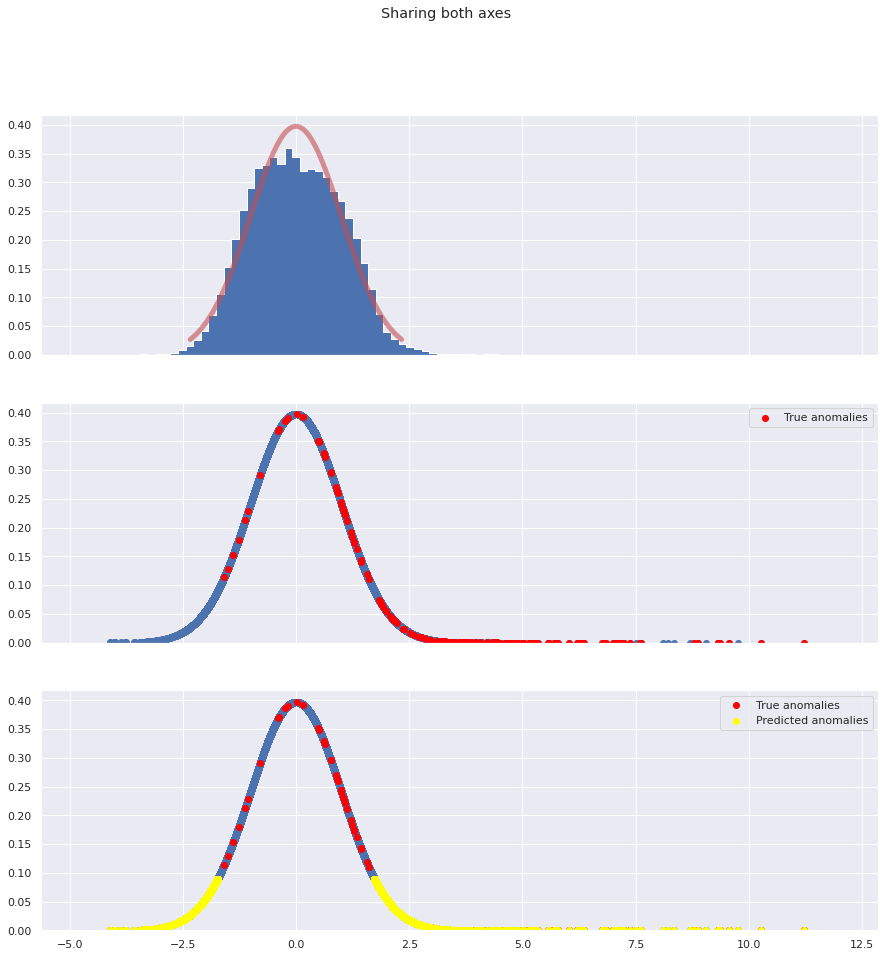

AUC: 0.117


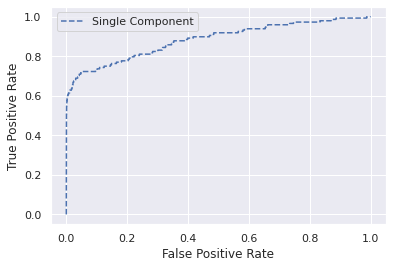

F1 score: 0.032
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

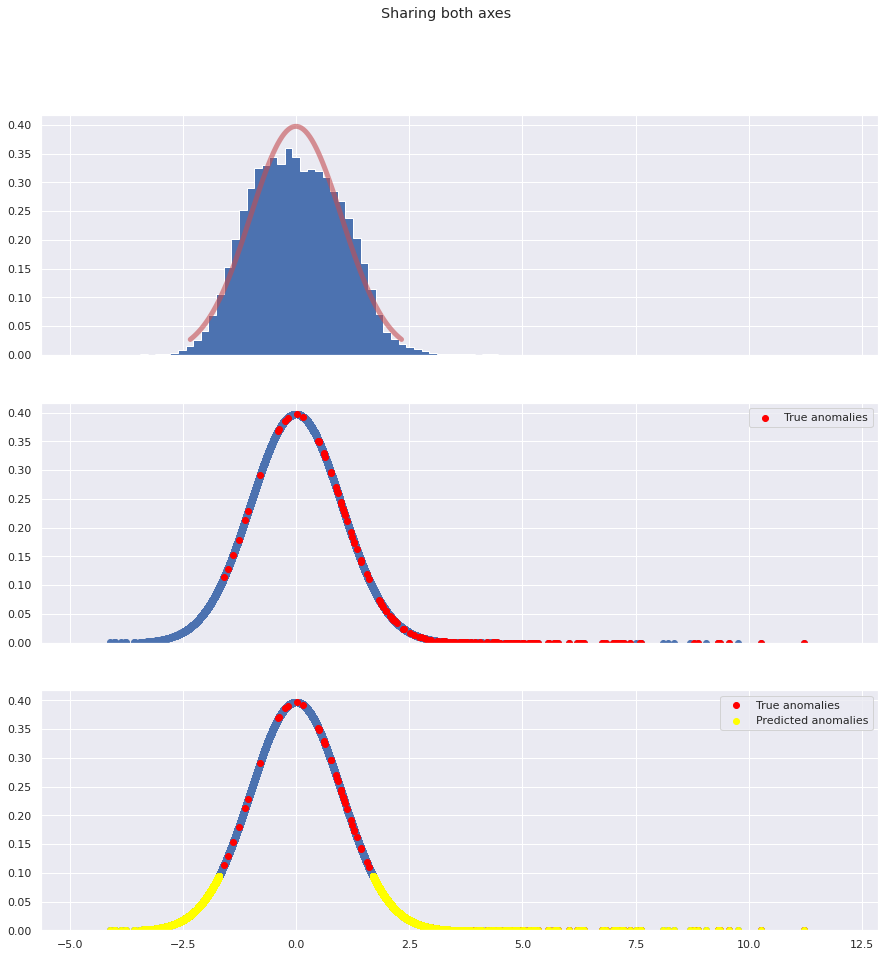

AUC: 0.117


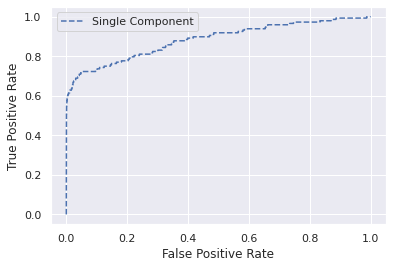

F1 score: 0.029
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

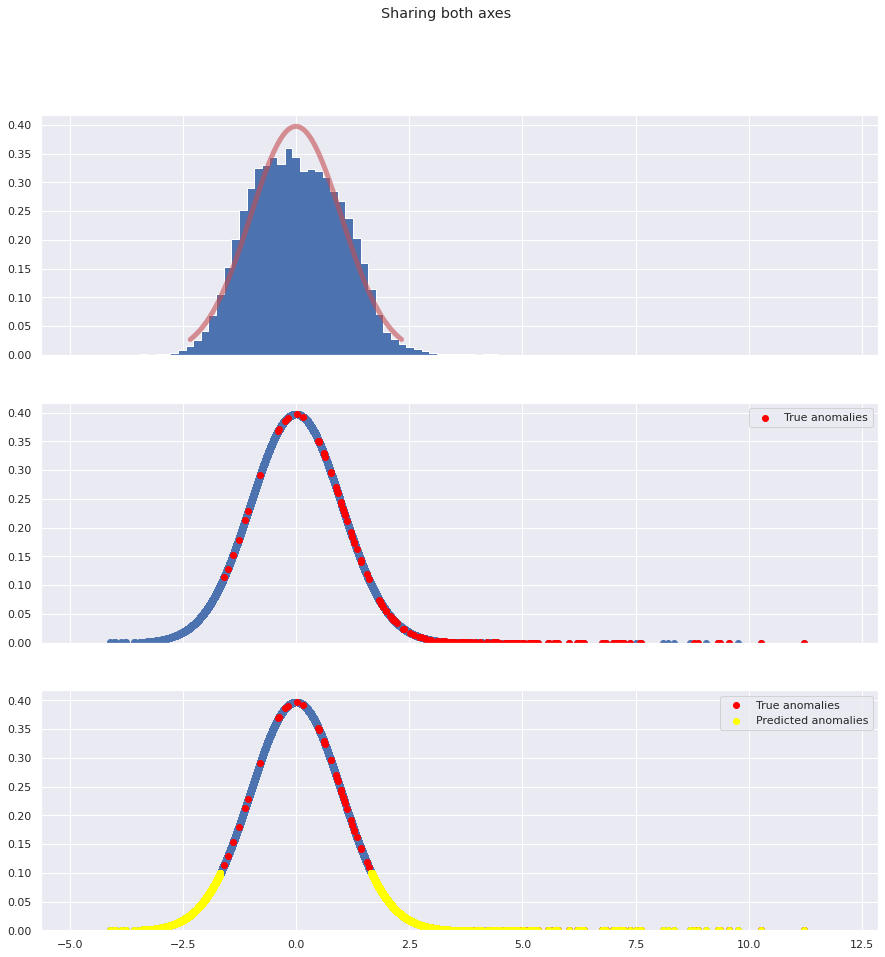

AUC: 0.117


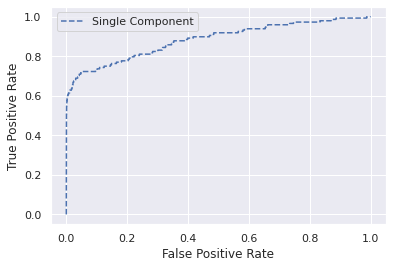

F1 score: 0.027
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

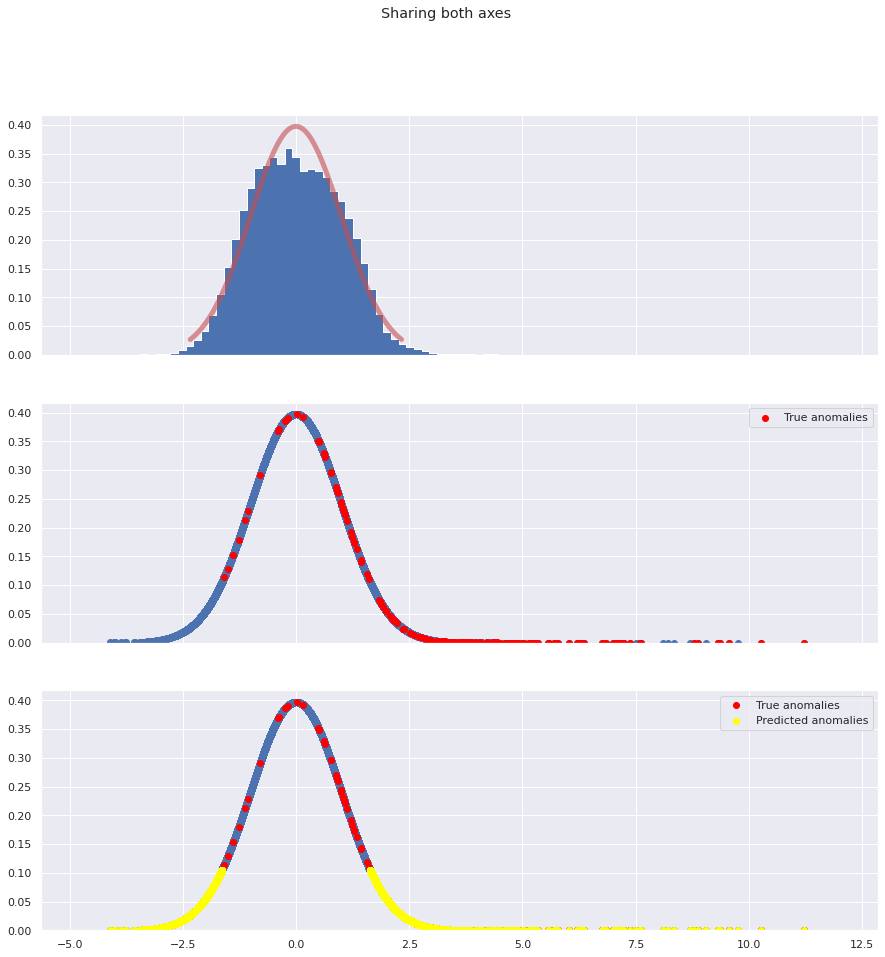

AUC: 0.117


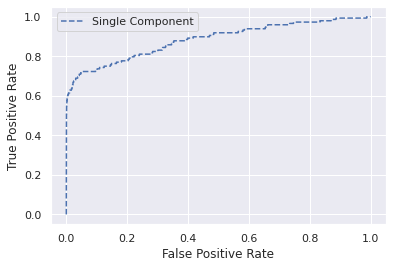

F1 score: 0.025
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

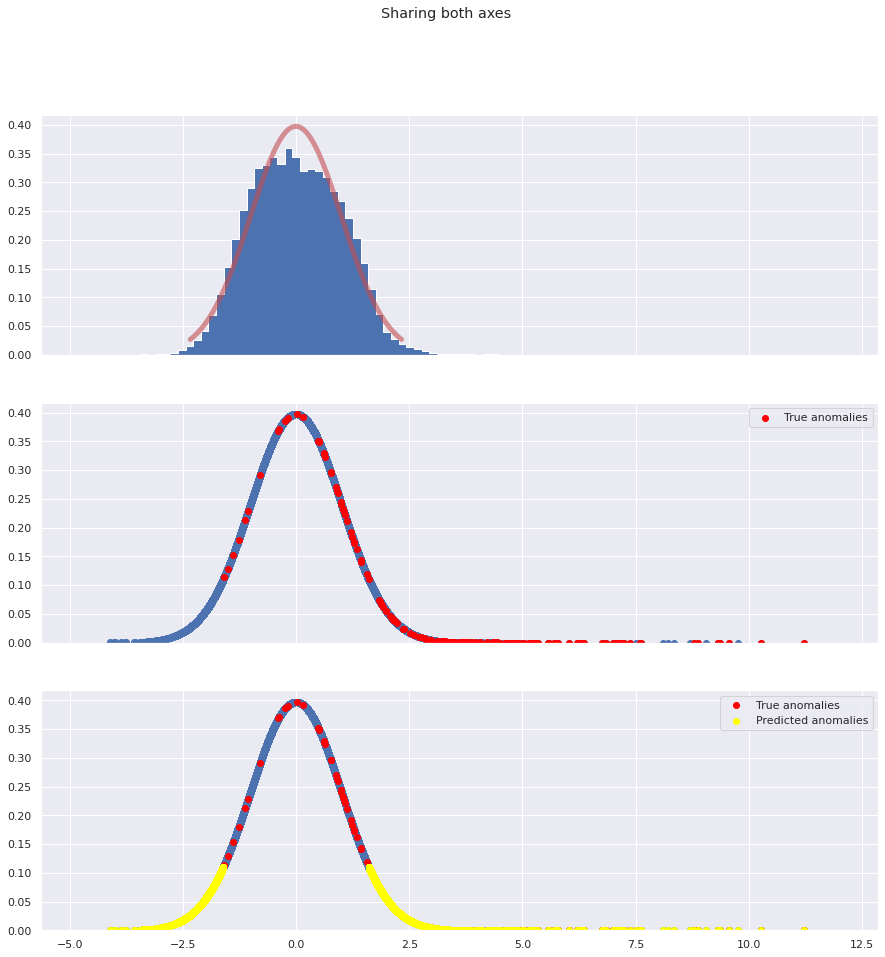

AUC: 0.117


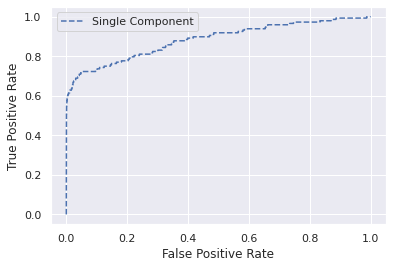

F1 score: 0.023
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

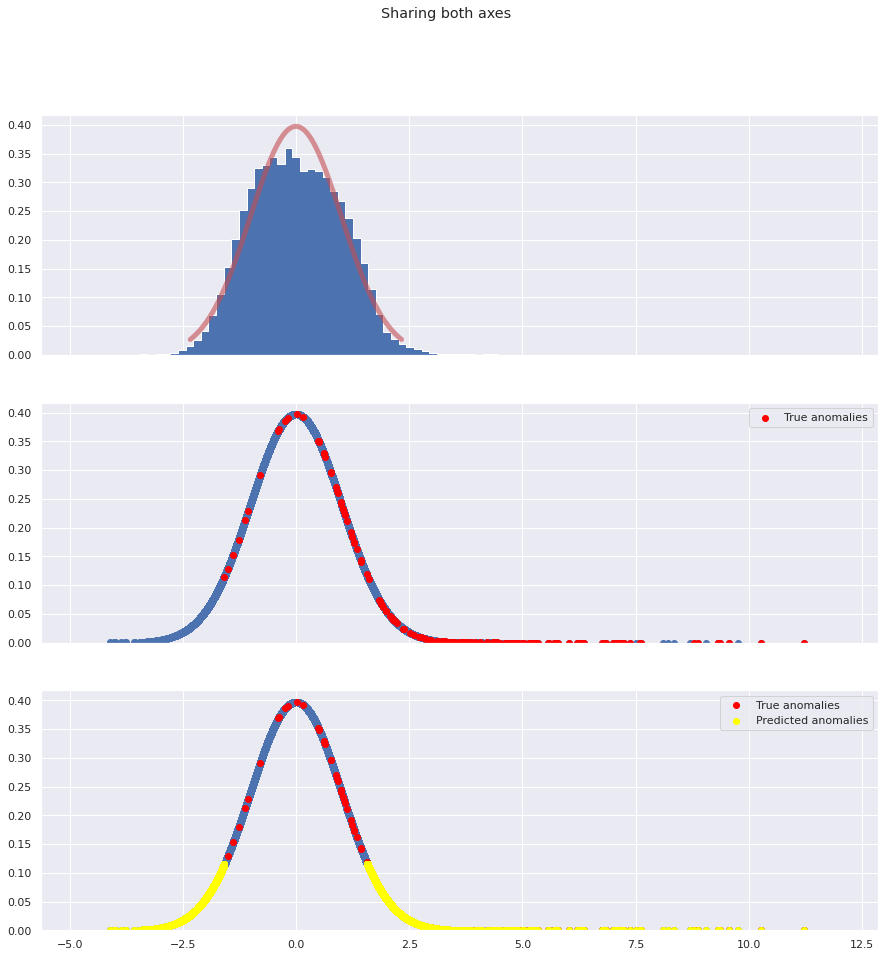

AUC: 0.117


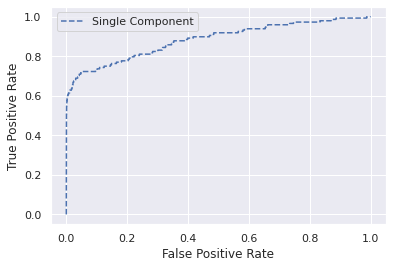

F1 score: 0.022
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

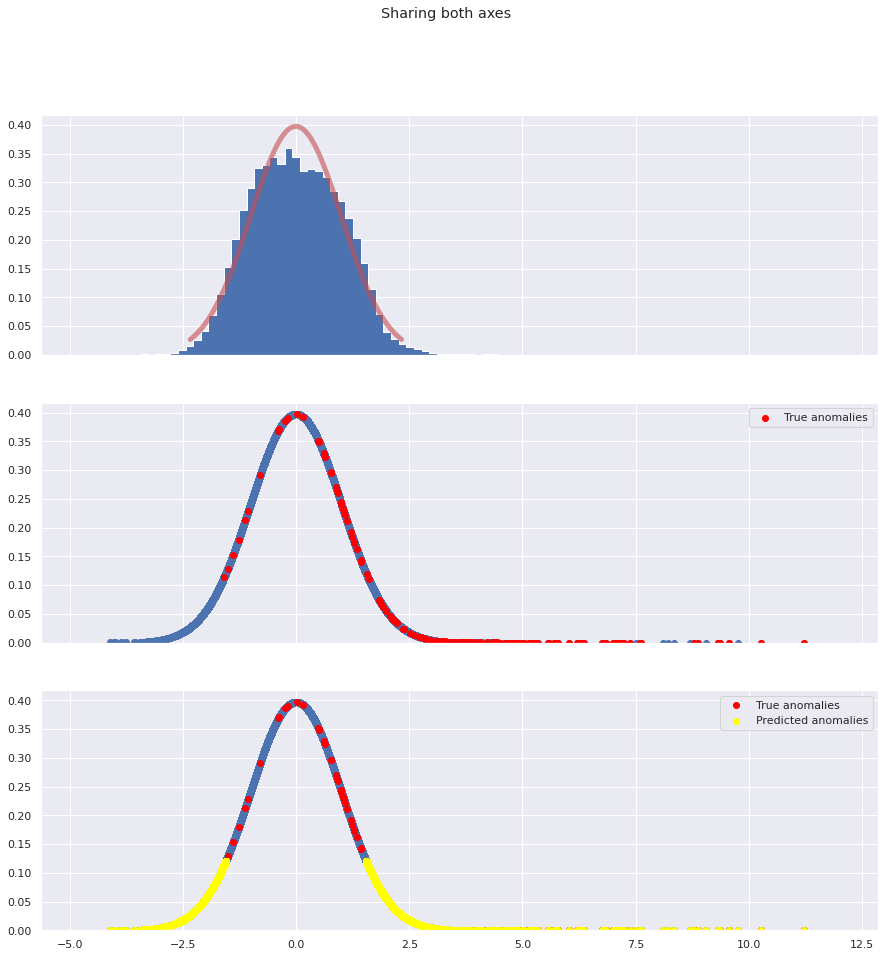

AUC: 0.117


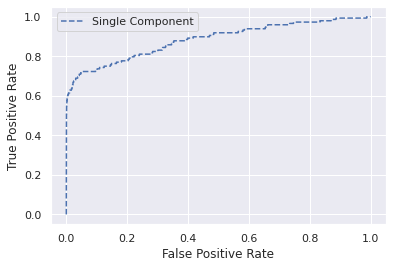

F1 score: 0.021
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

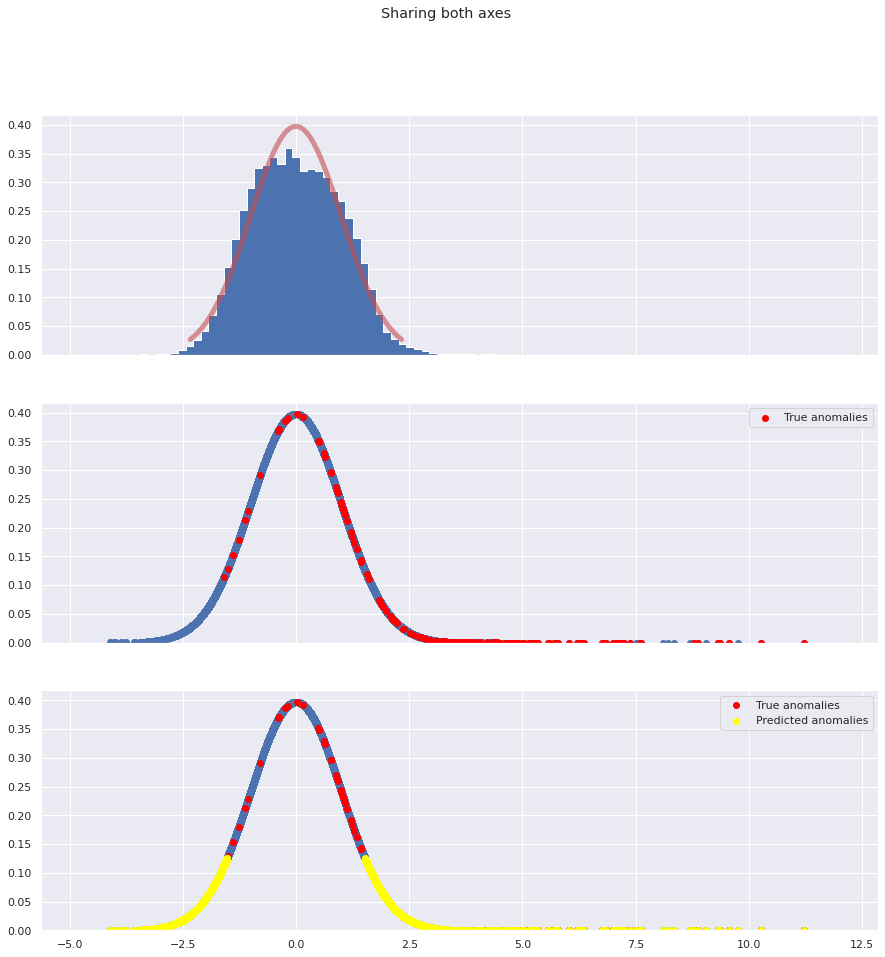

AUC: 0.117


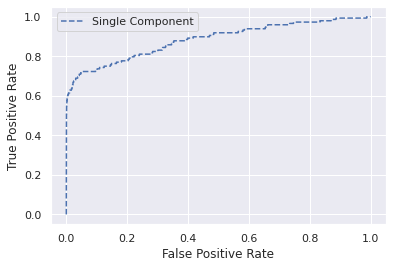

F1 score: 0.019
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

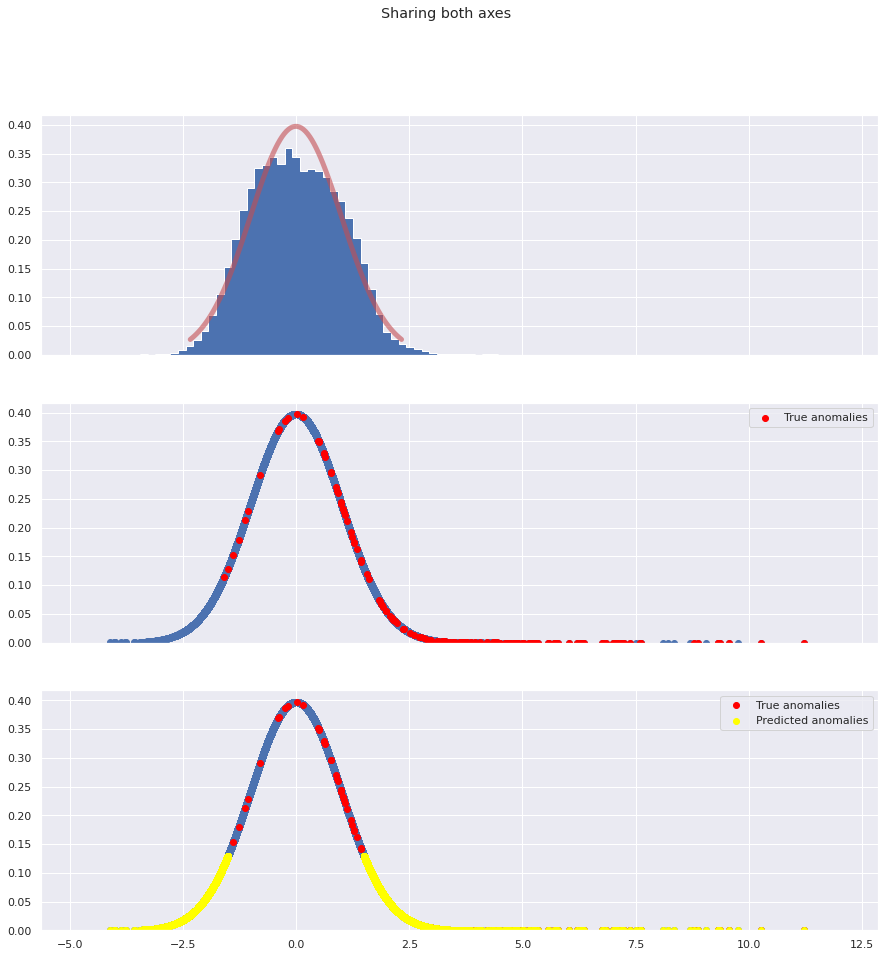

AUC: 0.117


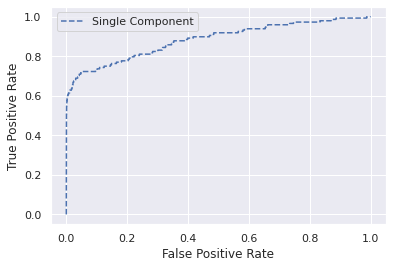

F1 score: 0.018
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

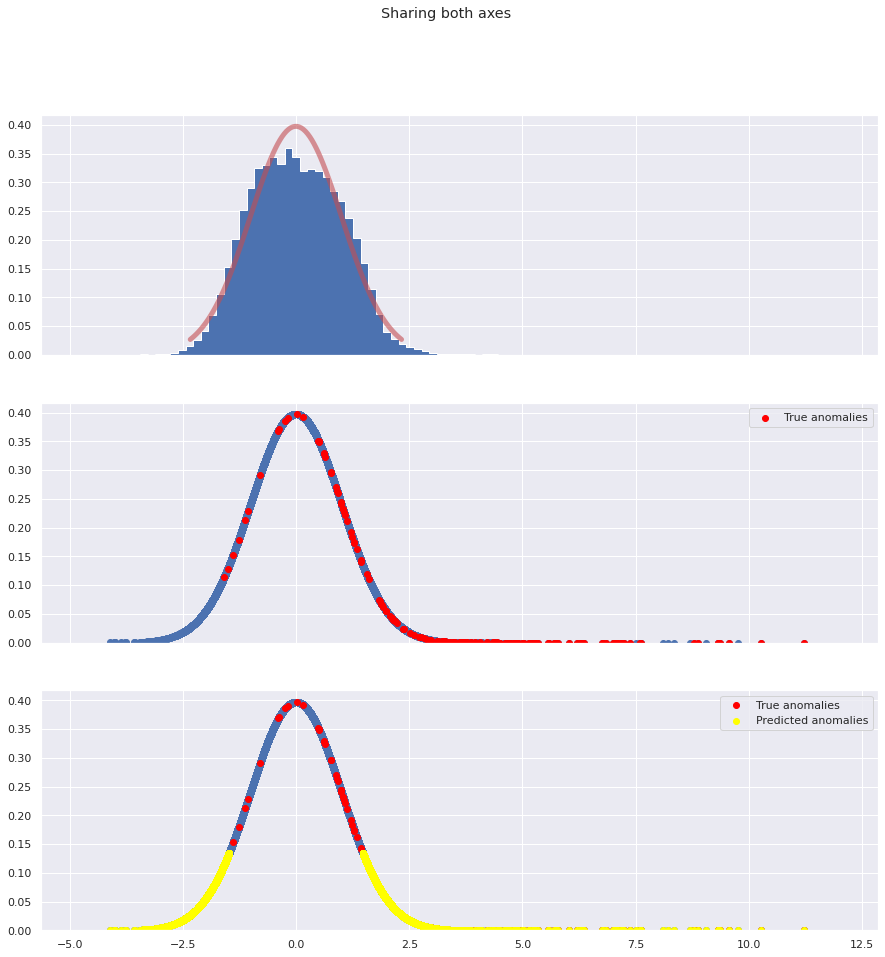

AUC: 0.117


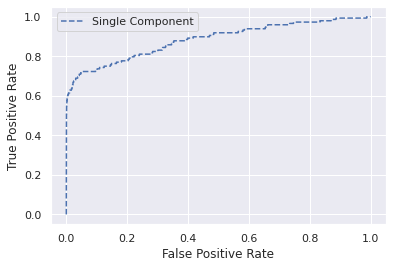

F1 score: 0.017
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

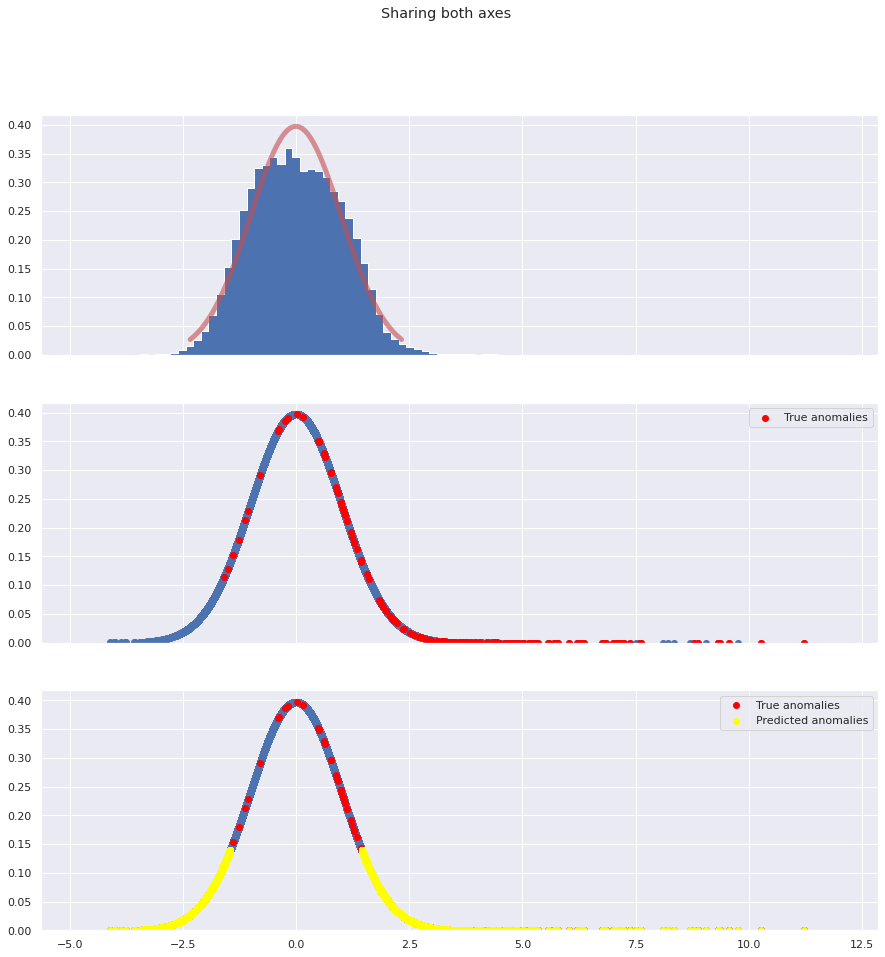

AUC: 0.117


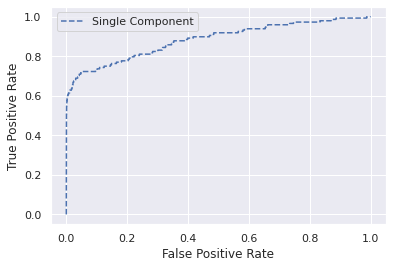

F1 score: 0.016
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

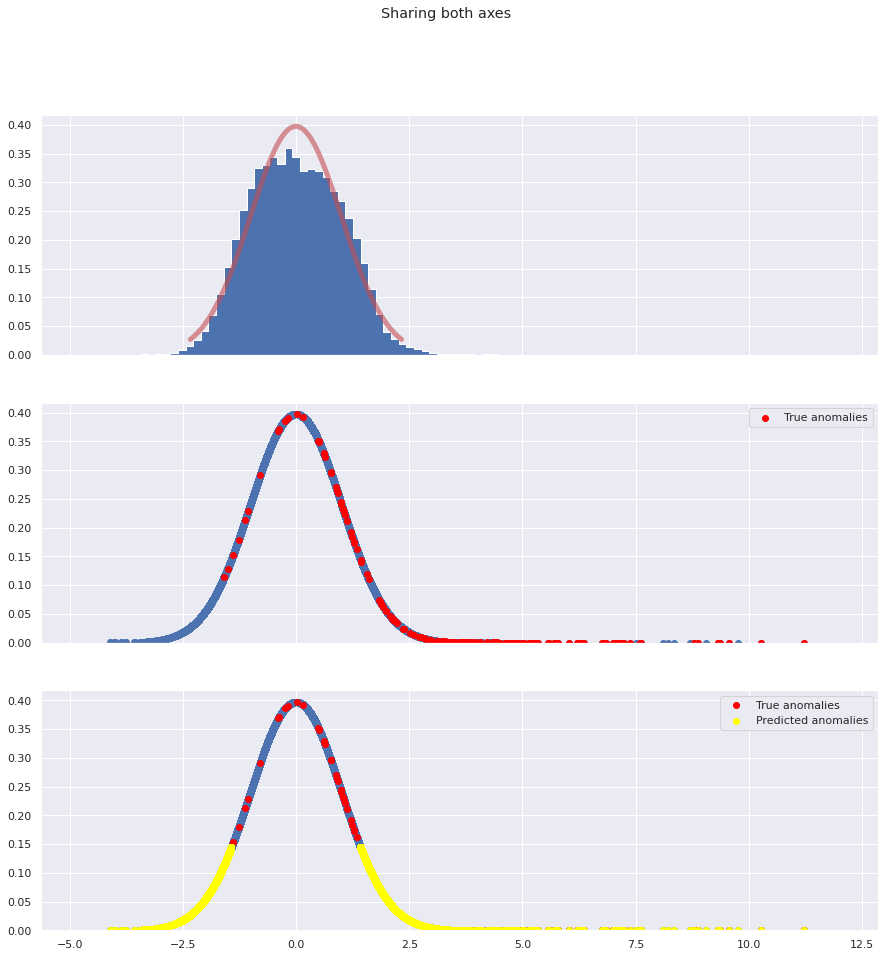

AUC: 0.117


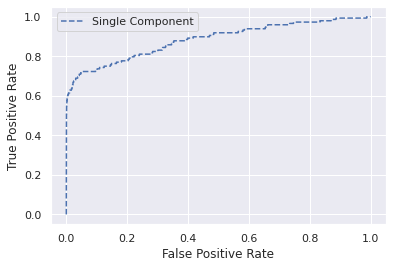

F1 score: 0.016
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

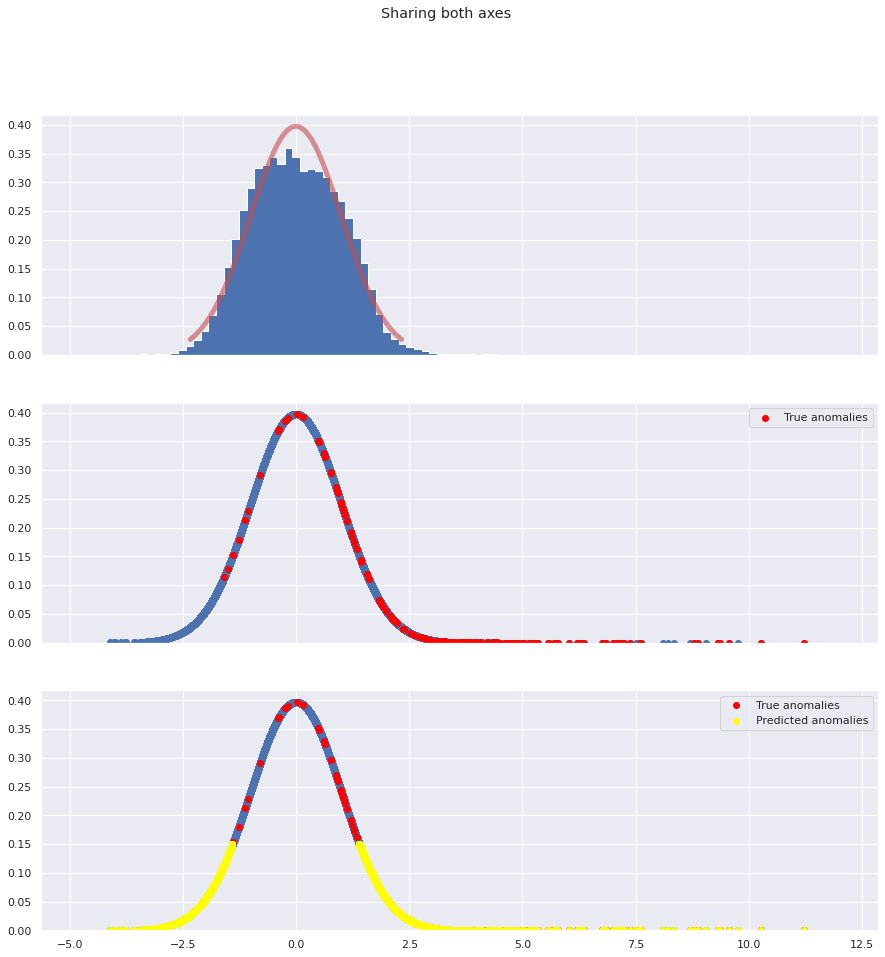

AUC: 0.117


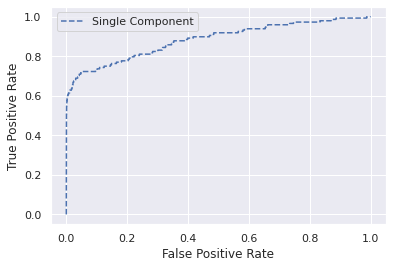

F1 score: 0.015
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
5     0.0      V11   0.0501  0.116556  0.071788
6     0.0      V11   0.0601  0.116556  0.057400
7     0.0      V11   0.0701  0.116556  0.046833
8     0.0      V11   0.0801  0.116556  0.038831
9     0.0      V11   0.0901  0.116556  0.032137
10    0.0      V11   0.1001  0.116556  0.026952
11    0.0      V11   0.1101  0.116556  0.023266
12    0.0      V11   0.1201  0.116556  0.020567
13    0.0      V11   0.1301  0.116556  0.018236
14    0.0      V11   0.1401  0.116556  0.016127
15    0.0      V11   0.1501  0.116556  0.014768
16    0.0      V11   0.1601  0.116556  0.013431
17    0.0      V11   0.1701  0.116556  0.012295
18    0.0      V11   0.1801  0.116556  0.011479
19    0.0      V11   0.1

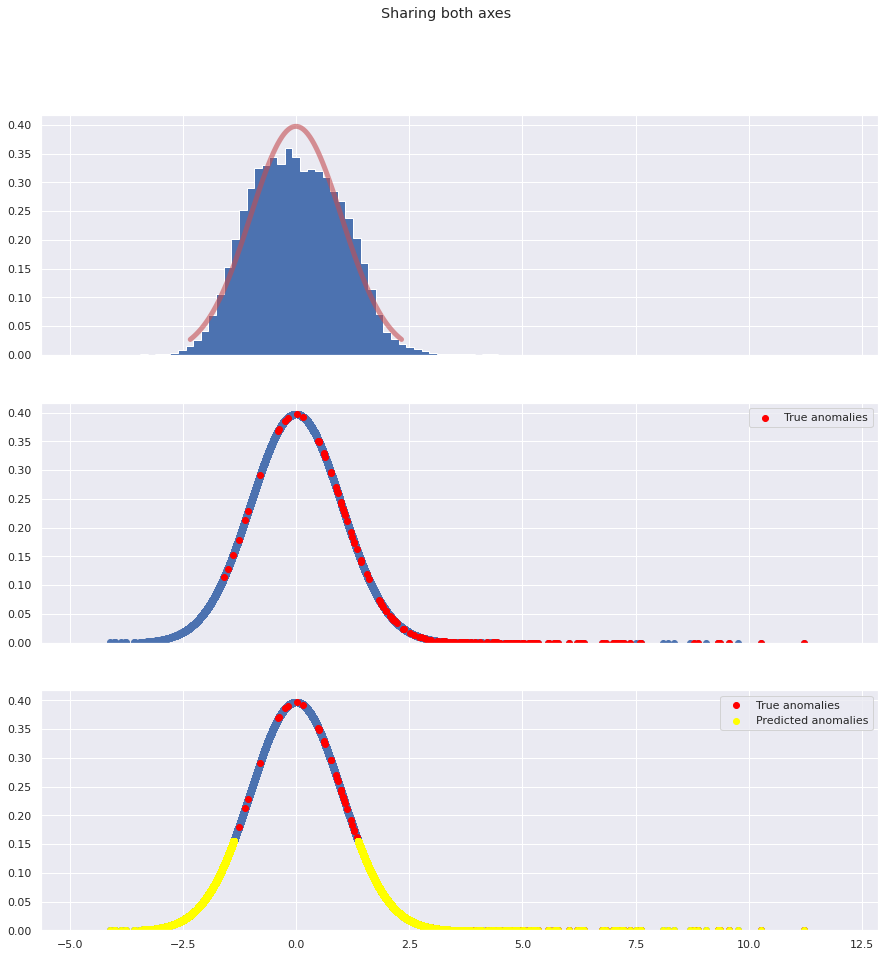

AUC: 0.117


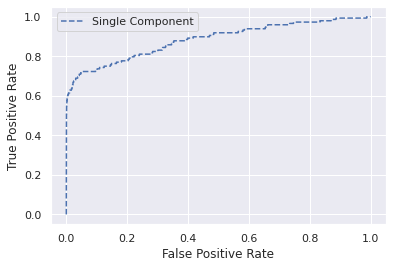

F1 score: 0.014
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1350  0.116556  0.017156
0     NaN      V11   0.1400  0.116556  0.016156
0     NaN      V11   0.1450  0.116556  0.015598
0     NaN      V11   0.1500  0.116556  0.014783
0     NaN      V11   0.1550  0.116556  0.014161

[61 rows x 5 columns]
Epsilon: 0.16


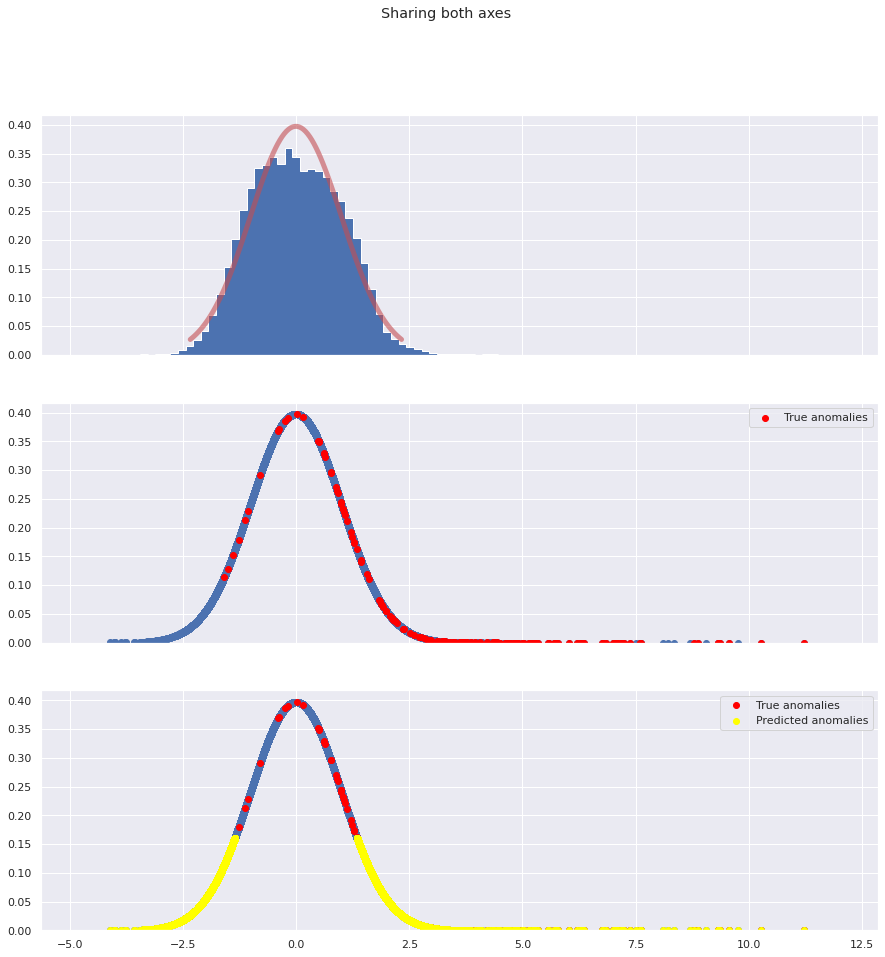

AUC: 0.117


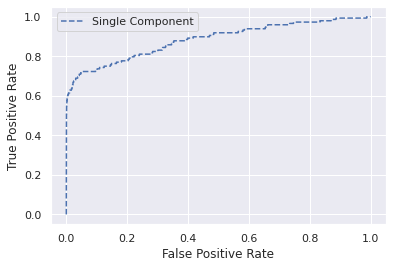

F1 score: 0.013
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1400  0.116556  0.016156
0     NaN      V11   0.1450  0.116556  0.015598
0     NaN      V11   0.1500  0.116556  0.014783
0     NaN      V11   0.1550  0.116556  0.014161
0     NaN      V11   0.1600  0.116556  0.013447

[62 rows x 5 columns]
Epsilon: 0.165


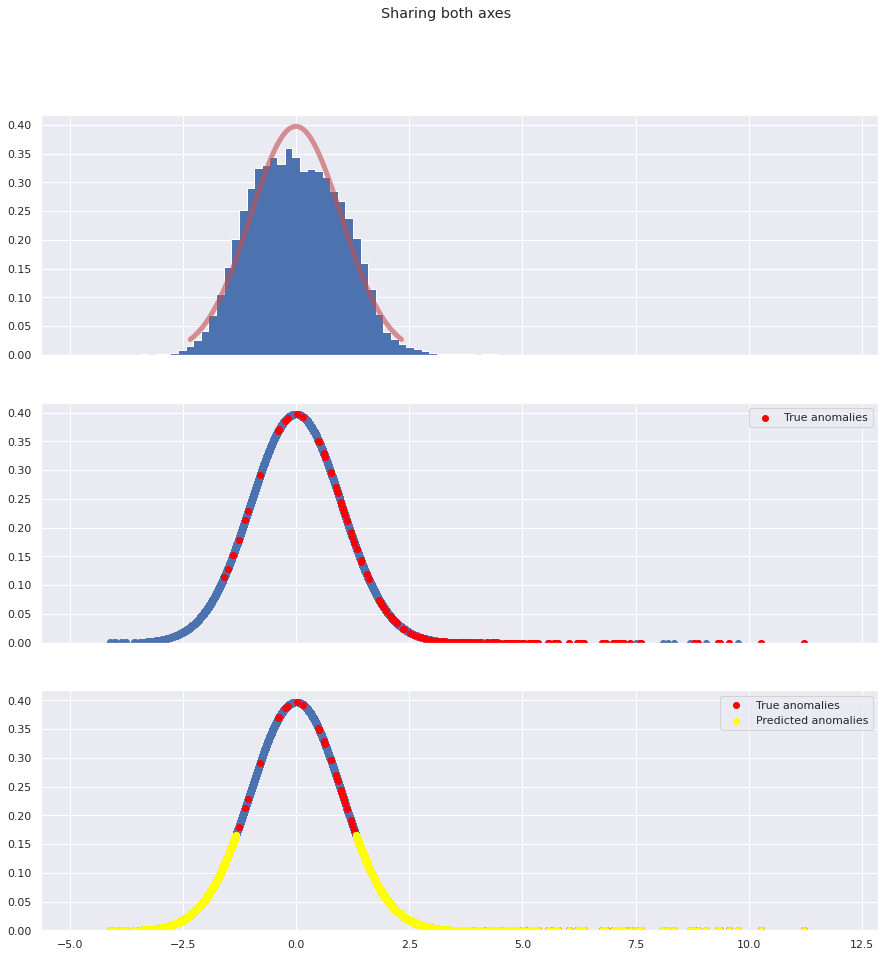

AUC: 0.117


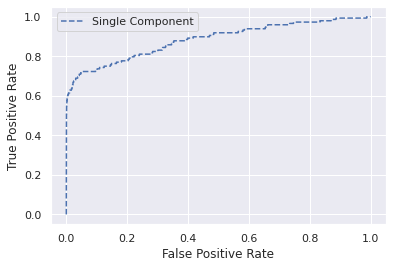

F1 score: 0.013
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1450  0.116556  0.015598
0     NaN      V11   0.1500  0.116556  0.014783
0     NaN      V11   0.1550  0.116556  0.014161
0     NaN      V11   0.1600  0.116556  0.013447
0     NaN      V11   0.1650  0.116556  0.012908

[63 rows x 5 columns]
Epsilon: 0.17


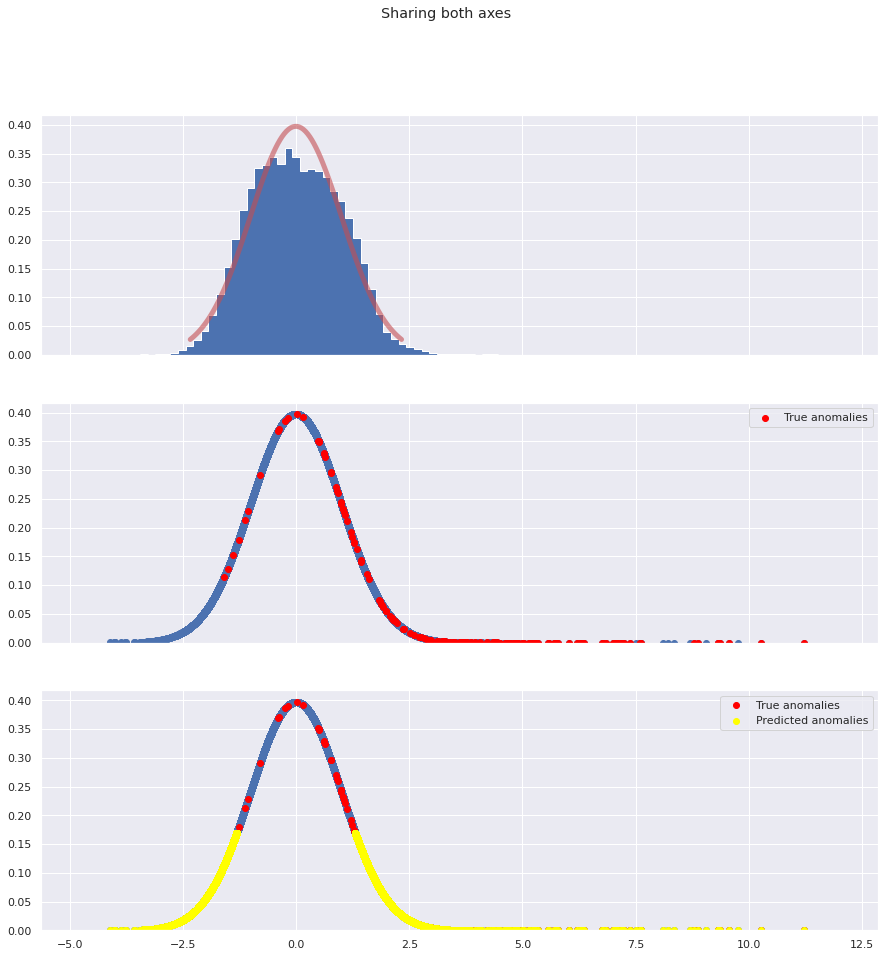

AUC: 0.117


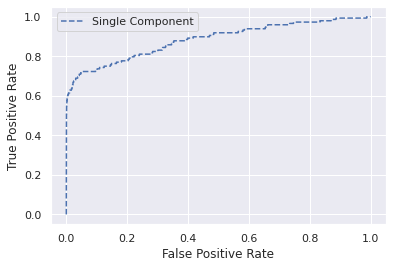

F1 score: 0.012
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1500  0.116556  0.014783
0     NaN      V11   0.1550  0.116556  0.014161
0     NaN      V11   0.1600  0.116556  0.013447
0     NaN      V11   0.1650  0.116556  0.012908
0     NaN      V11   0.1700  0.116556  0.012309

[64 rows x 5 columns]
Epsilon: 0.17500000000000002


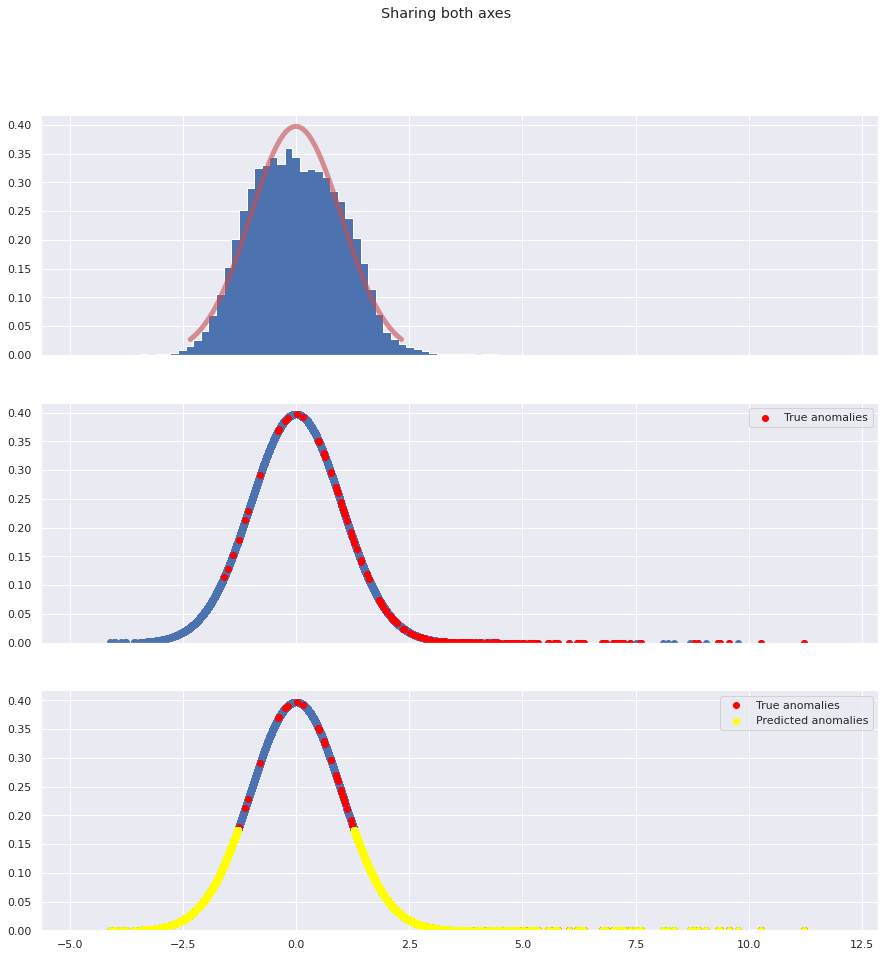

AUC: 0.117


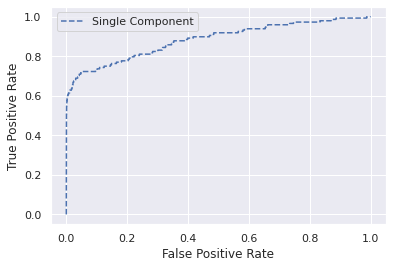

F1 score: 0.012
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1550  0.116556  0.014161
0     NaN      V11   0.1600  0.116556  0.013447
0     NaN      V11   0.1650  0.116556  0.012908
0     NaN      V11   0.1700  0.116556  0.012309
0     NaN      V11   0.1750  0.116556  0.011840

[65 rows x 5 columns]
Epsilon: 0.18


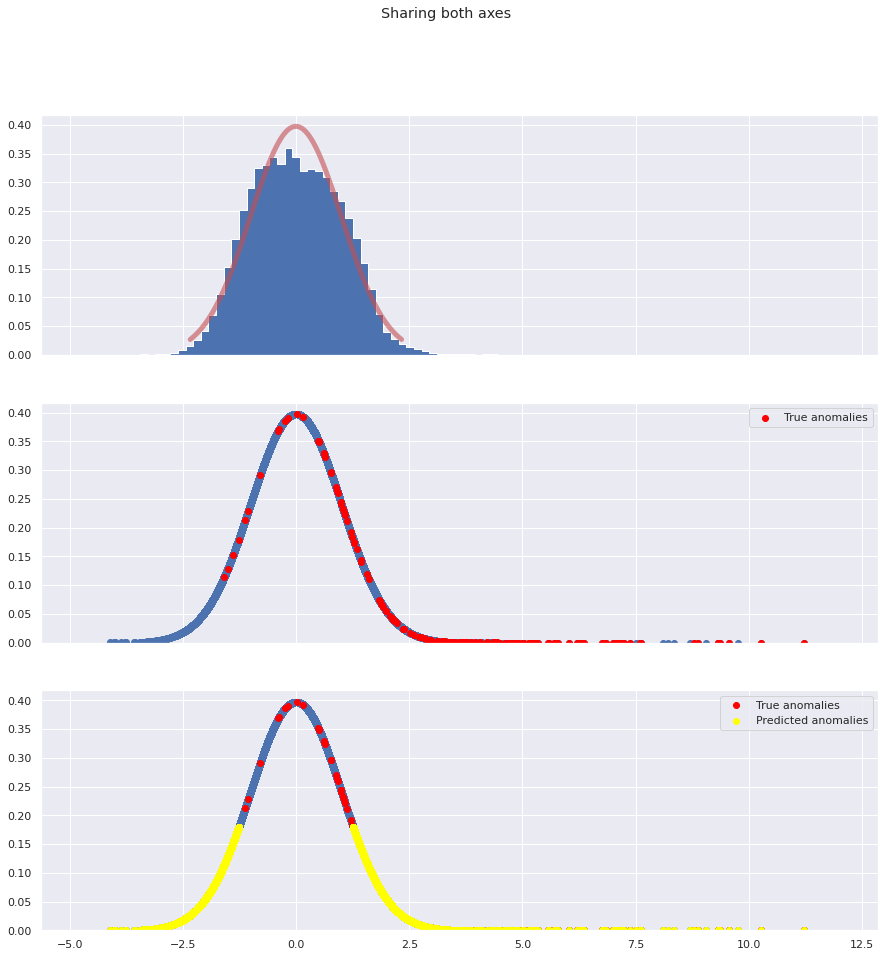

AUC: 0.117


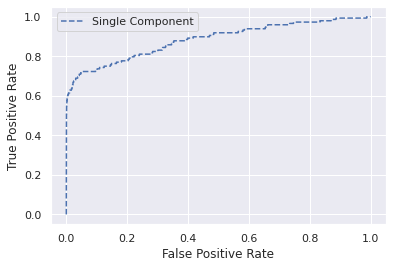

F1 score: 0.011
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1600  0.116556  0.013447
0     NaN      V11   0.1650  0.116556  0.012908
0     NaN      V11   0.1700  0.116556  0.012309
0     NaN      V11   0.1750  0.116556  0.011840
0     NaN      V11   0.1800  0.116556  0.011486

[66 rows x 5 columns]
Epsilon: 0.185


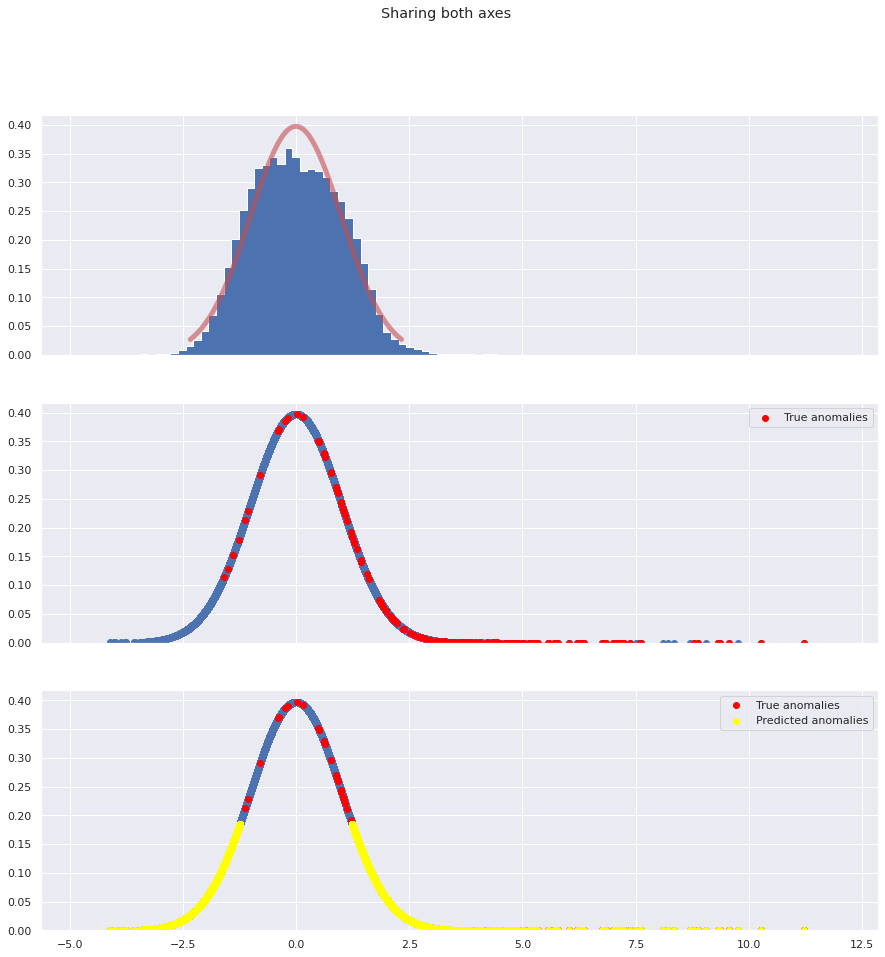

AUC: 0.117


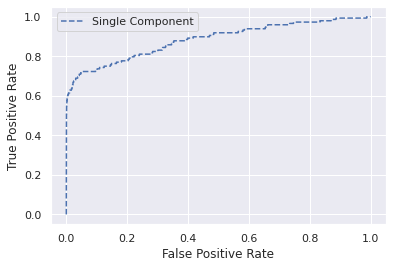

F1 score: 0.011
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1650  0.116556  0.012908
0     NaN      V11   0.1700  0.116556  0.012309
0     NaN      V11   0.1750  0.116556  0.011840
0     NaN      V11   0.1800  0.116556  0.011486
0     NaN      V11   0.1850  0.116556  0.011103

[67 rows x 5 columns]
Epsilon: 0.19


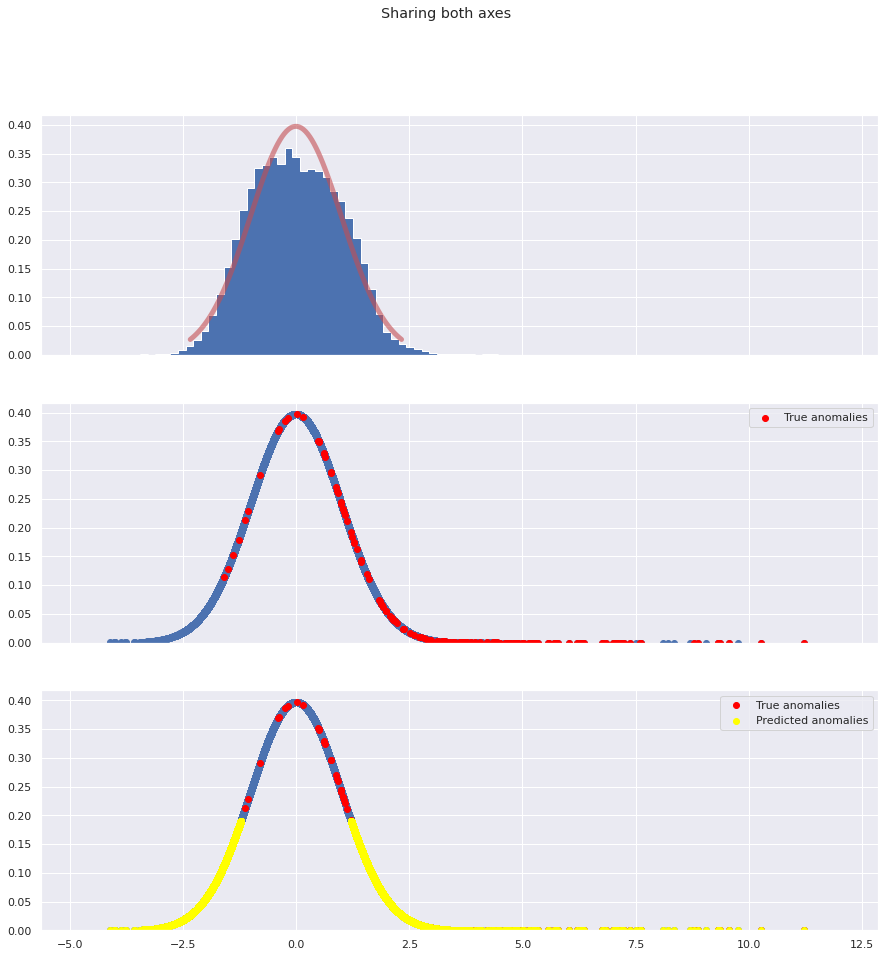

AUC: 0.117


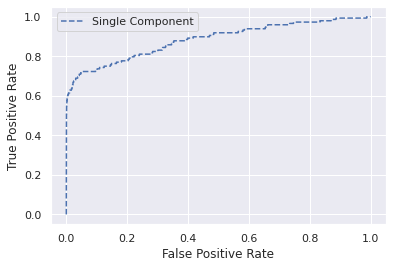

F1 score: 0.011
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1700  0.116556  0.012309
0     NaN      V11   0.1750  0.116556  0.011840
0     NaN      V11   0.1800  0.116556  0.011486
0     NaN      V11   0.1850  0.116556  0.011103
0     NaN      V11   0.1900  0.116556  0.010633

[68 rows x 5 columns]
Epsilon: 0.195


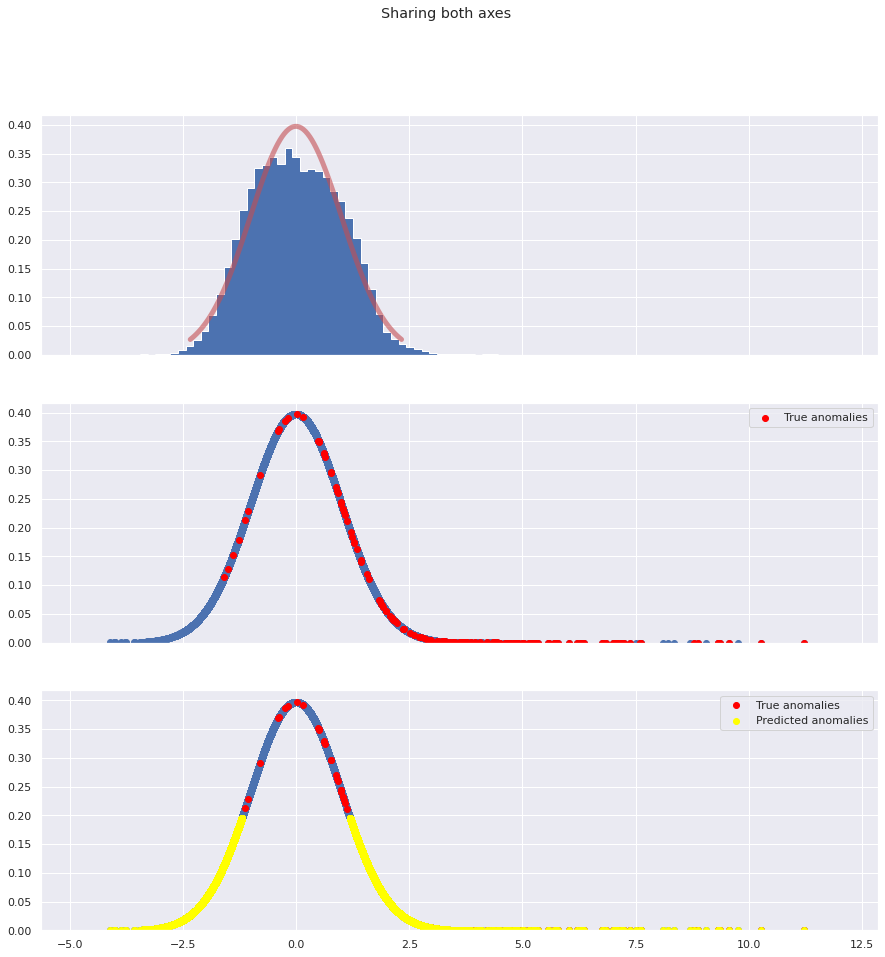

AUC: 0.117


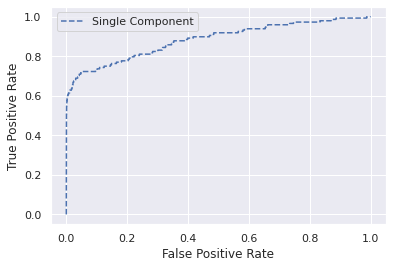

F1 score: 0.010
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1750  0.116556  0.011840
0     NaN      V11   0.1800  0.116556  0.011486
0     NaN      V11   0.1850  0.116556  0.011103
0     NaN      V11   0.1900  0.116556  0.010633
0     NaN      V11   0.1950  0.116556  0.010276

[69 rows x 5 columns]
Epsilon: 0.2


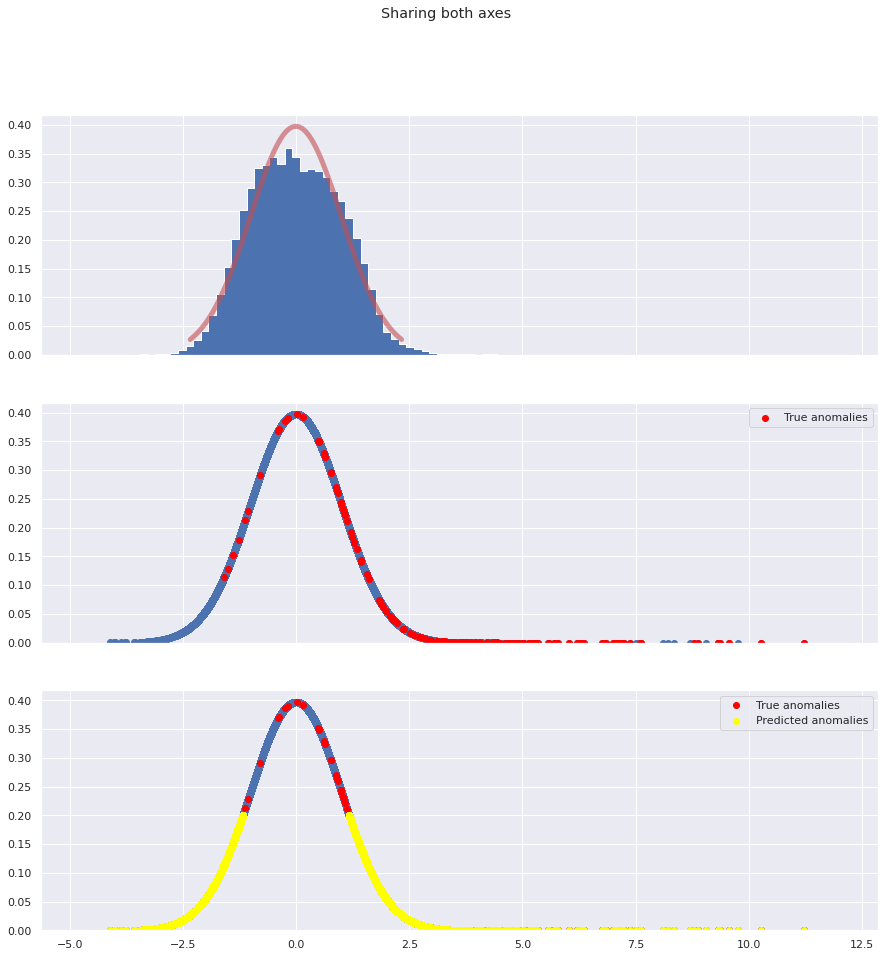

AUC: 0.117


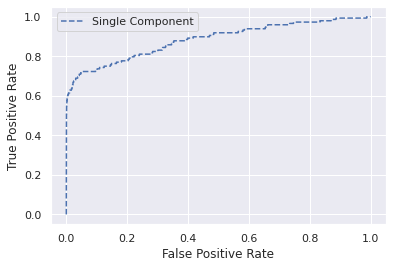

F1 score: 0.010
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1800  0.116556  0.011486
0     NaN      V11   0.1850  0.116556  0.011103
0     NaN      V11   0.1900  0.116556  0.010633
0     NaN      V11   0.1950  0.116556  0.010276
0     NaN      V11   0.2000  0.116556  0.009870

[70 rows x 5 columns]
Epsilon: 0.20500000000000002


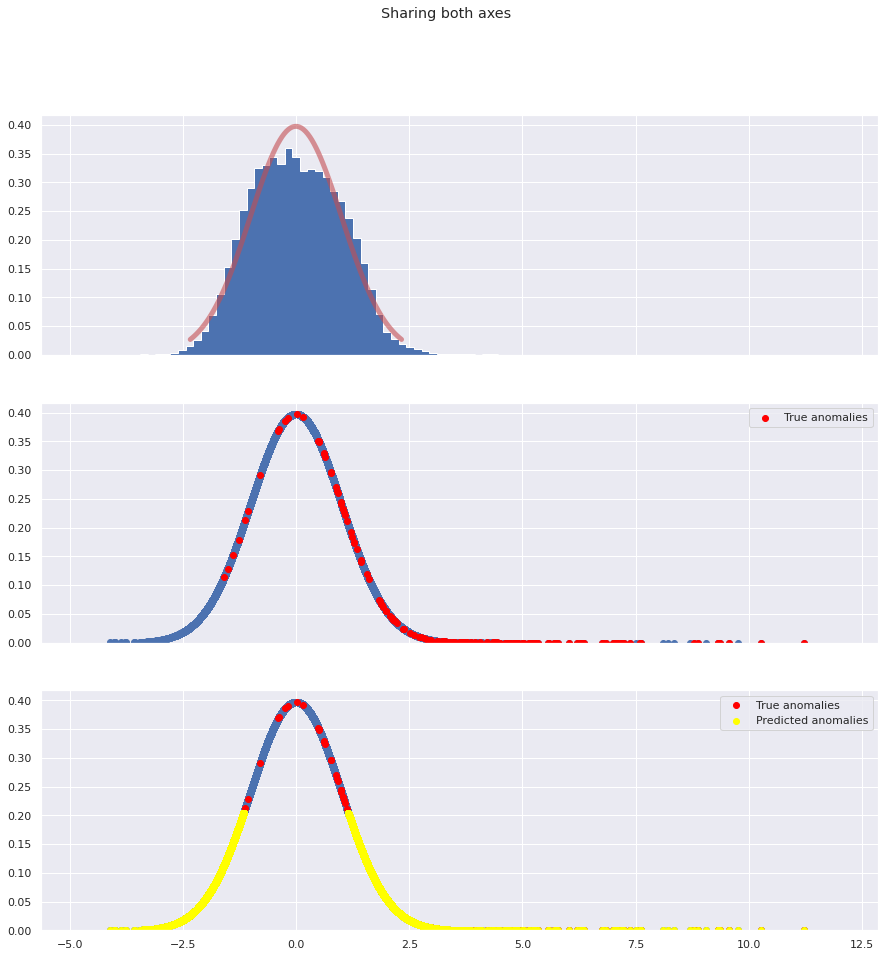

AUC: 0.117


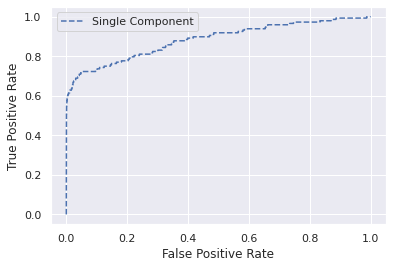

F1 score: 0.009
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1850  0.116556  0.011103
0     NaN      V11   0.1900  0.116556  0.010633
0     NaN      V11   0.1950  0.116556  0.010276
0     NaN      V11   0.2000  0.116556  0.009870
0     NaN      V11   0.2050  0.116556  0.009492

[71 rows x 5 columns]
Epsilon: 0.21


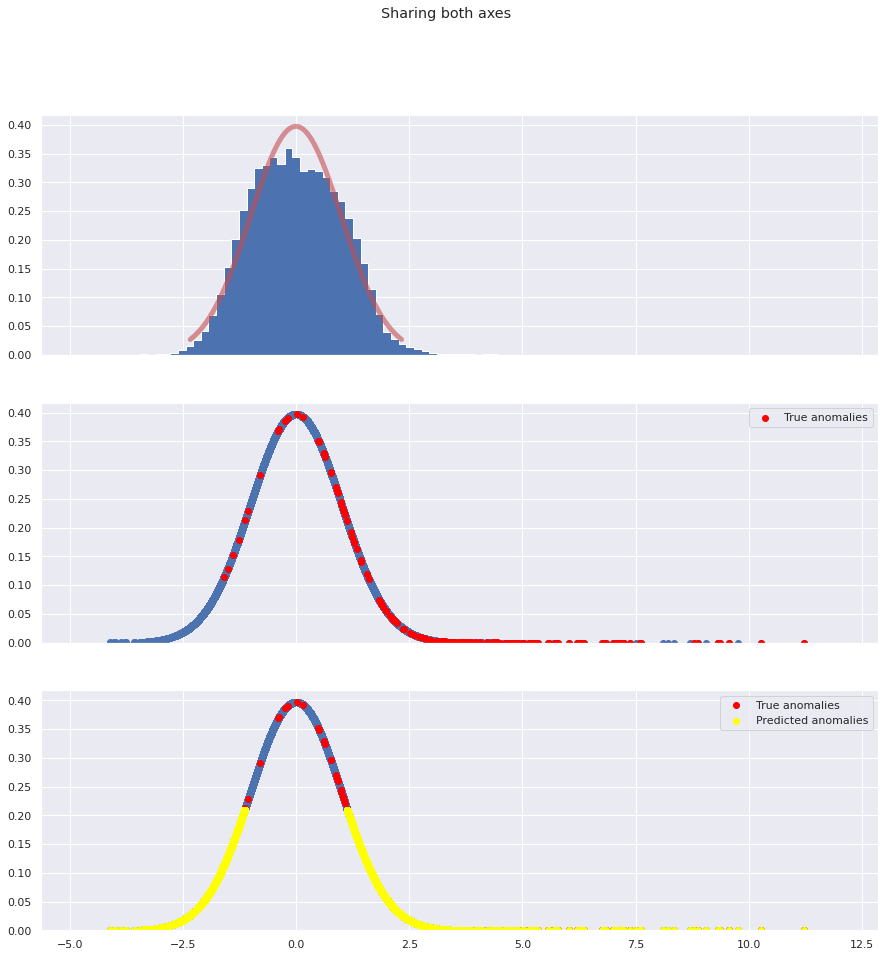

AUC: 0.117


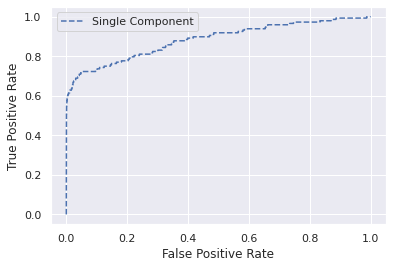

F1 score: 0.009
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1900  0.116556  0.010633
0     NaN      V11   0.1950  0.116556  0.010276
0     NaN      V11   0.2000  0.116556  0.009870
0     NaN      V11   0.2050  0.116556  0.009492
0     NaN      V11   0.2100  0.116556  0.009129

[72 rows x 5 columns]
Epsilon: 0.215


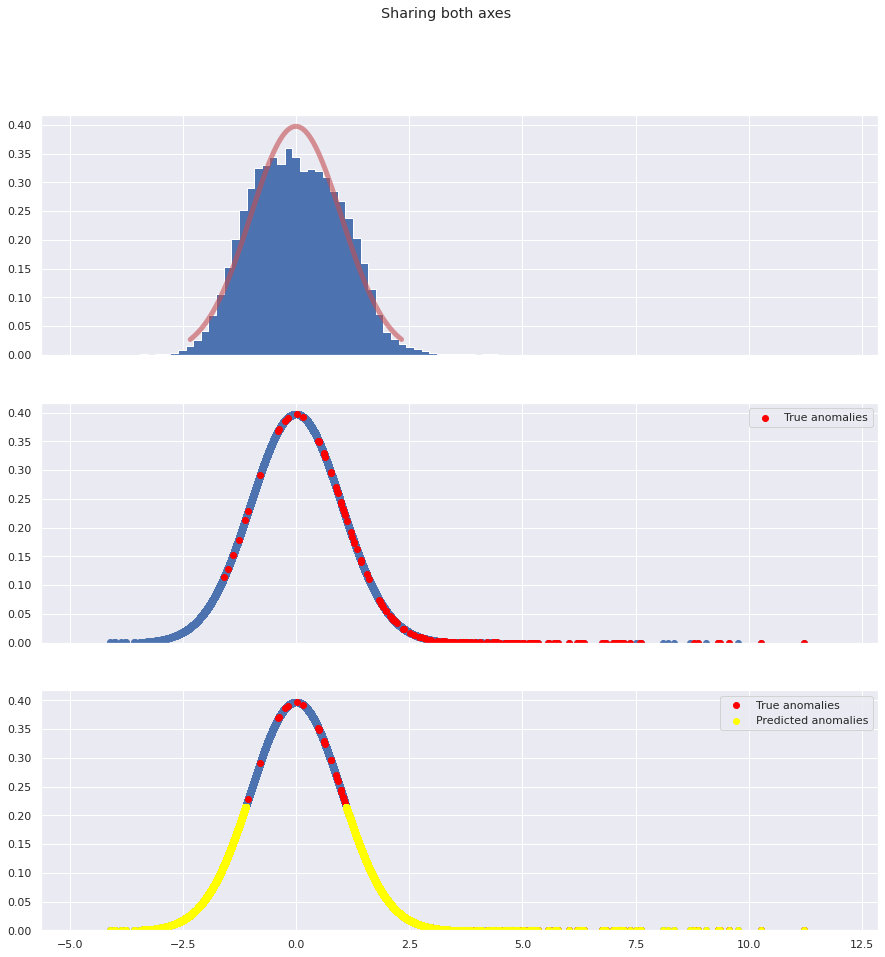

AUC: 0.117


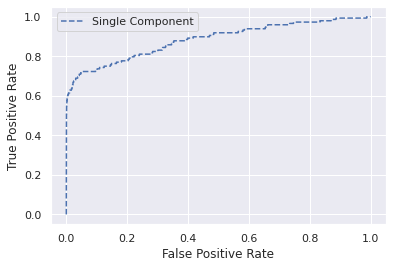

F1 score: 0.009
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.1950  0.116556  0.010276
0     NaN      V11   0.2000  0.116556  0.009870
0     NaN      V11   0.2050  0.116556  0.009492
0     NaN      V11   0.2100  0.116556  0.009129
0     NaN      V11   0.2150  0.116556  0.008940

[73 rows x 5 columns]
Epsilon: 0.22


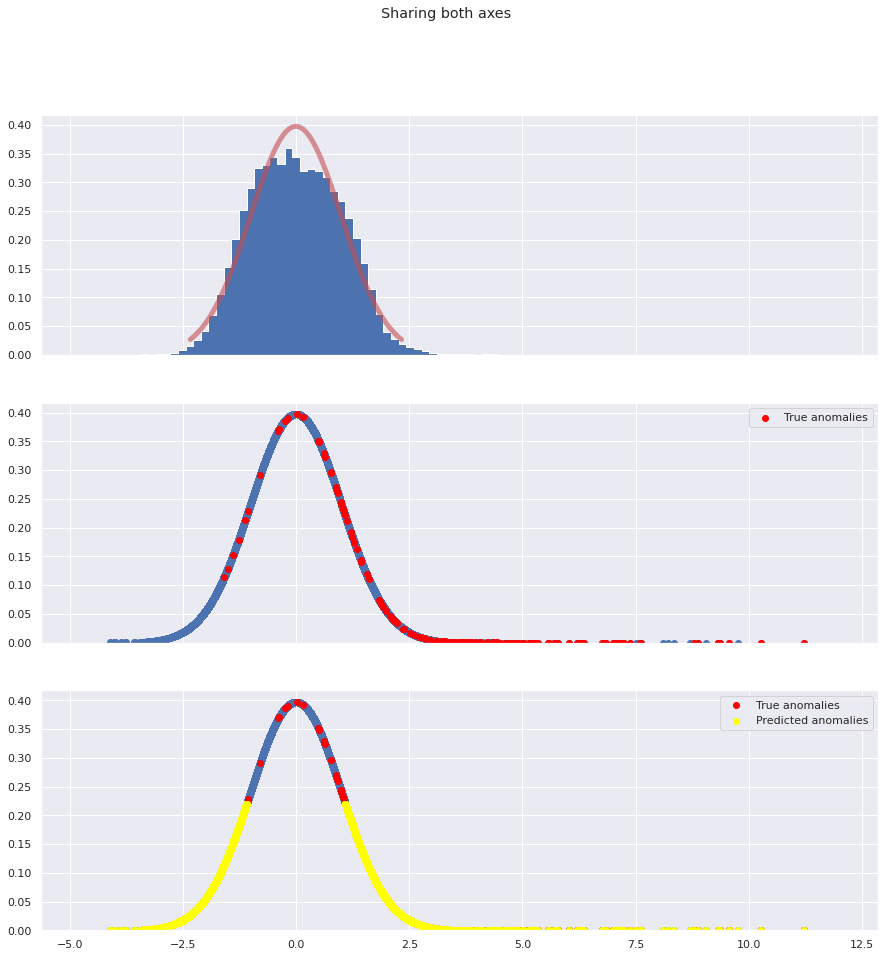

AUC: 0.117


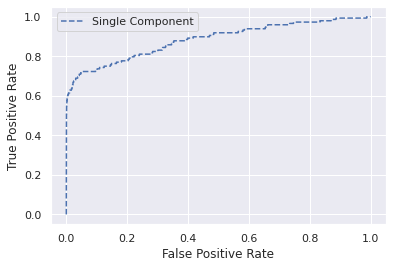

F1 score: 0.009
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2000  0.116556  0.009870
0     NaN      V11   0.2050  0.116556  0.009492
0     NaN      V11   0.2100  0.116556  0.009129
0     NaN      V11   0.2150  0.116556  0.008940
0     NaN      V11   0.2200  0.116556  0.008623

[74 rows x 5 columns]
Epsilon: 0.225


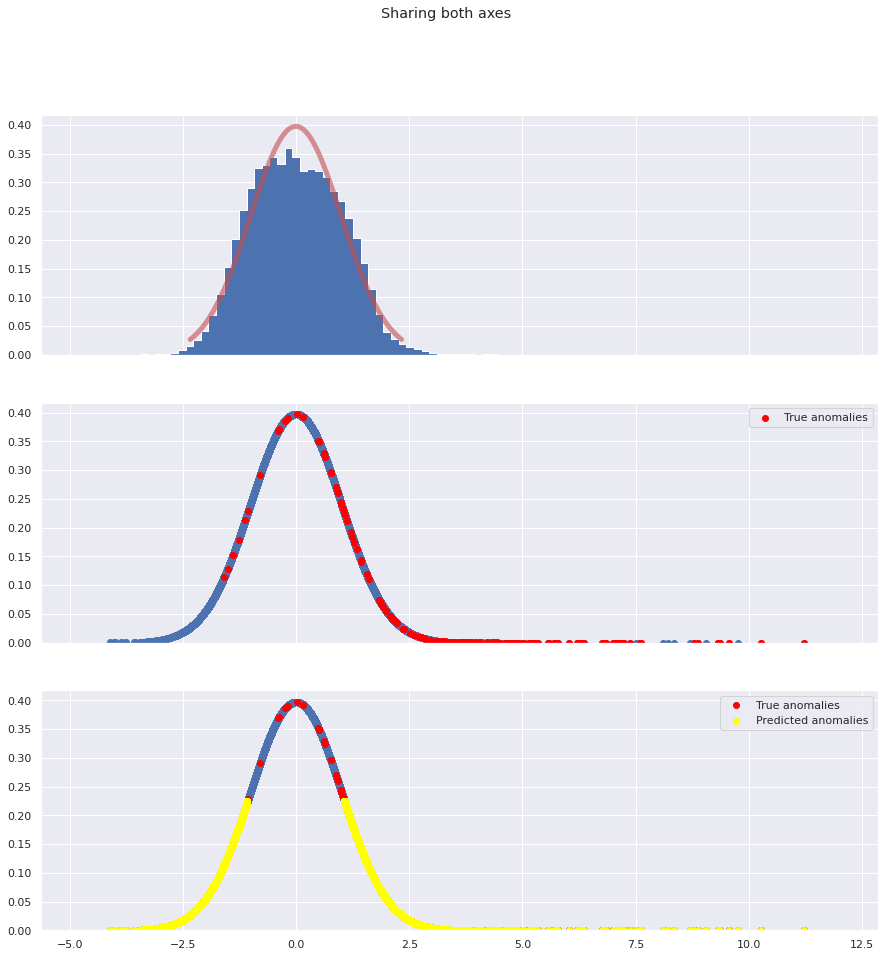

AUC: 0.117


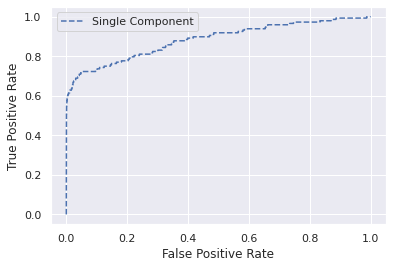

F1 score: 0.008
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2050  0.116556  0.009492
0     NaN      V11   0.2100  0.116556  0.009129
0     NaN      V11   0.2150  0.116556  0.008940
0     NaN      V11   0.2200  0.116556  0.008623
0     NaN      V11   0.2250  0.116556  0.008384

[75 rows x 5 columns]
Epsilon: 0.23


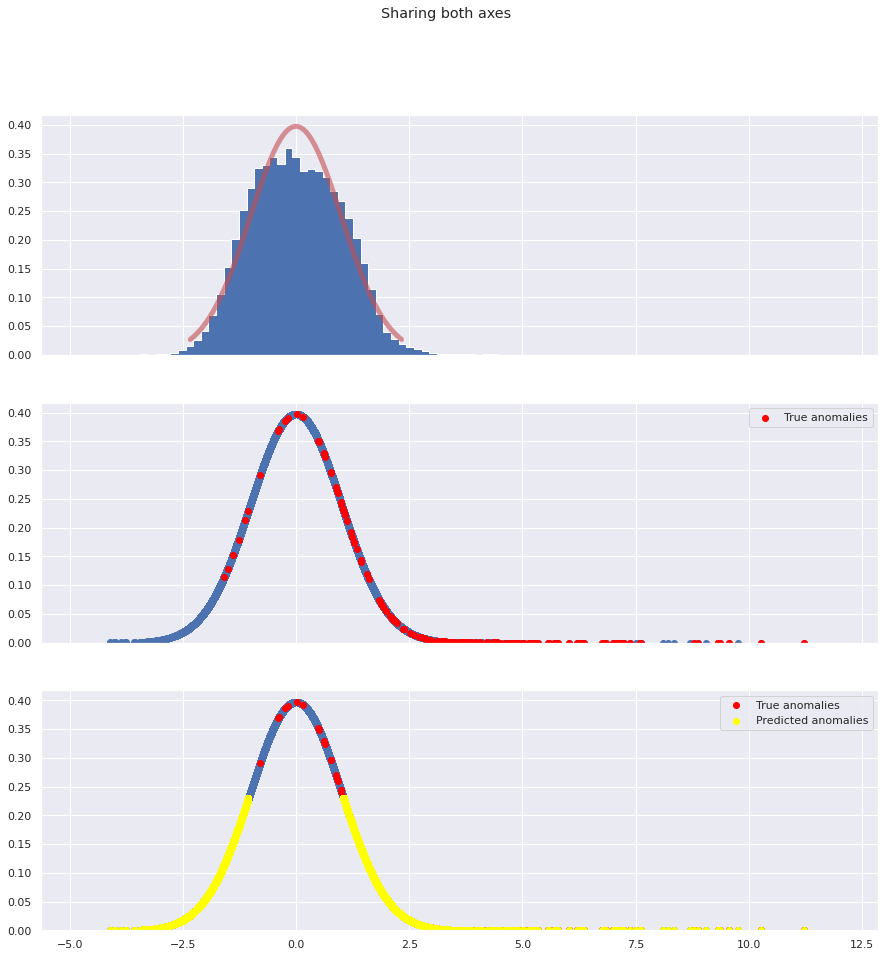

AUC: 0.117


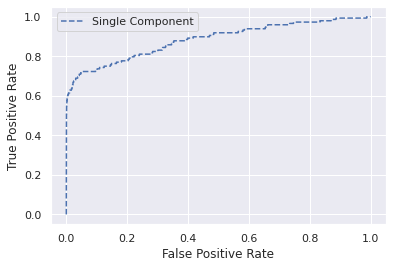

F1 score: 0.008
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2100  0.116556  0.009129
0     NaN      V11   0.2150  0.116556  0.008940
0     NaN      V11   0.2200  0.116556  0.008623
0     NaN      V11   0.2250  0.116556  0.008384
0     NaN      V11   0.2300  0.116556  0.008233

[76 rows x 5 columns]
Epsilon: 0.23500000000000001


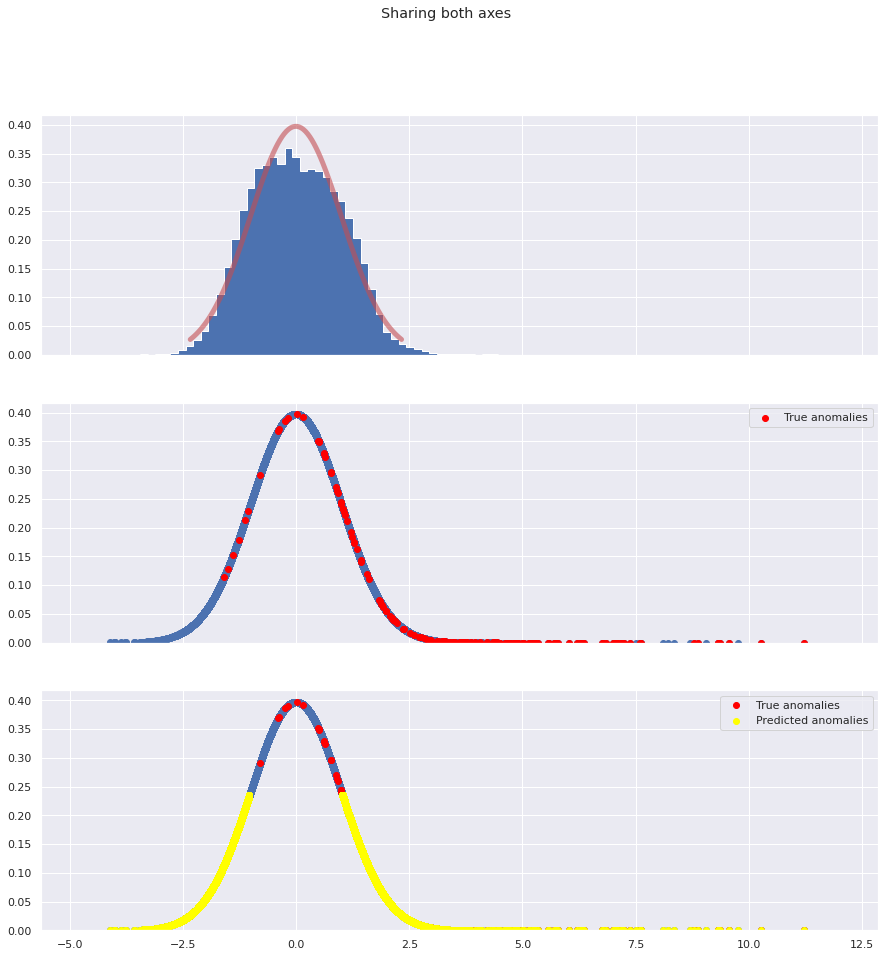

AUC: 0.117


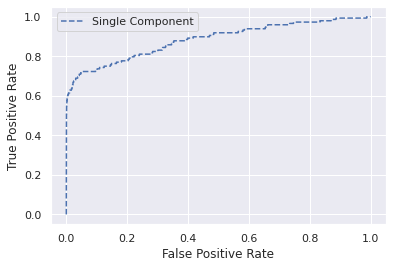

F1 score: 0.008
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2150  0.116556  0.008940
0     NaN      V11   0.2200  0.116556  0.008623
0     NaN      V11   0.2250  0.116556  0.008384
0     NaN      V11   0.2300  0.116556  0.008233
0     NaN      V11   0.2350  0.116556  0.008091

[77 rows x 5 columns]
Epsilon: 0.24


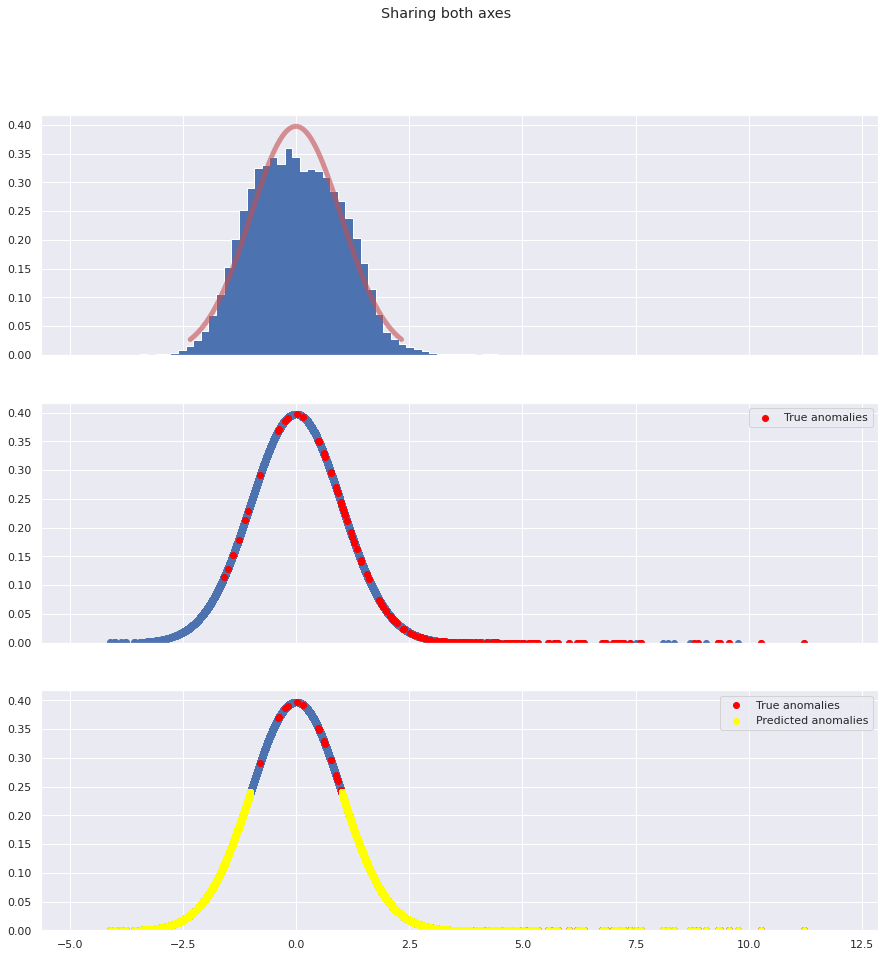

AUC: 0.117


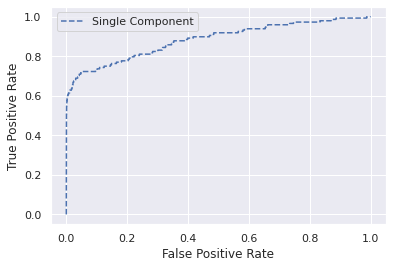

F1 score: 0.008
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2200  0.116556  0.008623
0     NaN      V11   0.2250  0.116556  0.008384
0     NaN      V11   0.2300  0.116556  0.008233
0     NaN      V11   0.2350  0.116556  0.008091
0     NaN      V11   0.2400  0.116556  0.007811

[78 rows x 5 columns]
Epsilon: 0.245


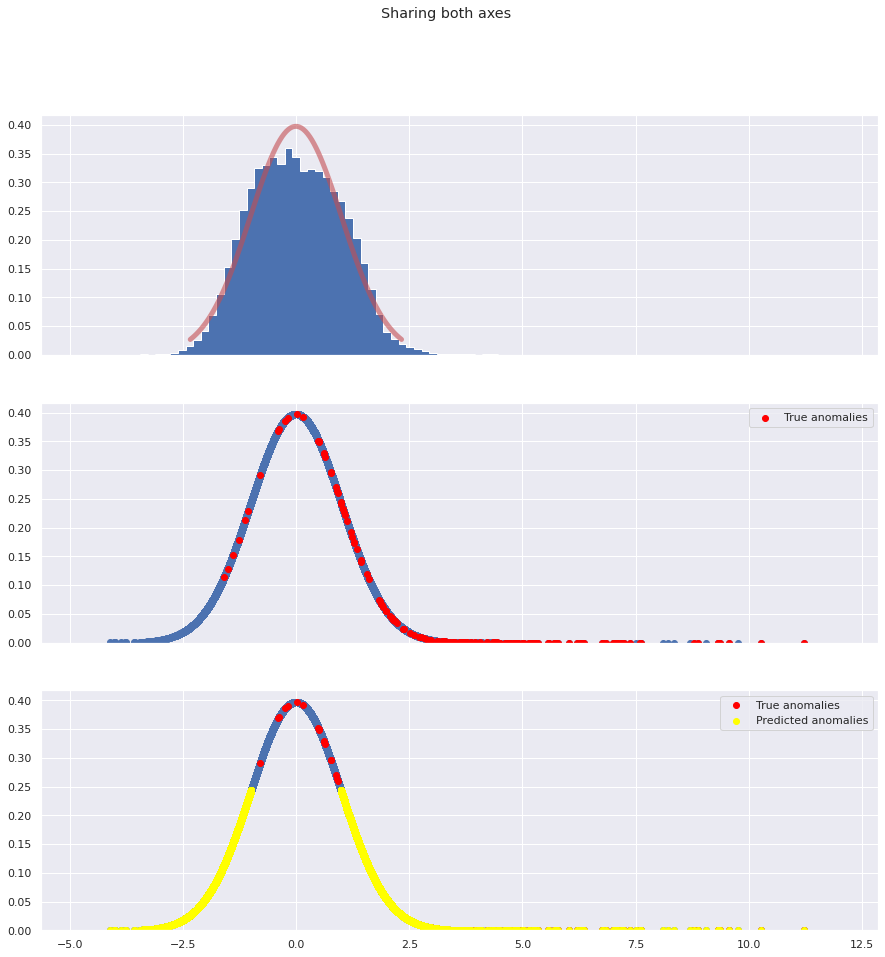

AUC: 0.117


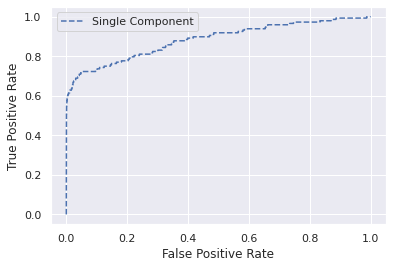

F1 score: 0.008
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2250  0.116556  0.008384
0     NaN      V11   0.2300  0.116556  0.008233
0     NaN      V11   0.2350  0.116556  0.008091
0     NaN      V11   0.2400  0.116556  0.007811
0     NaN      V11   0.2450  0.116556  0.007736

[79 rows x 5 columns]
Epsilon: 0.25


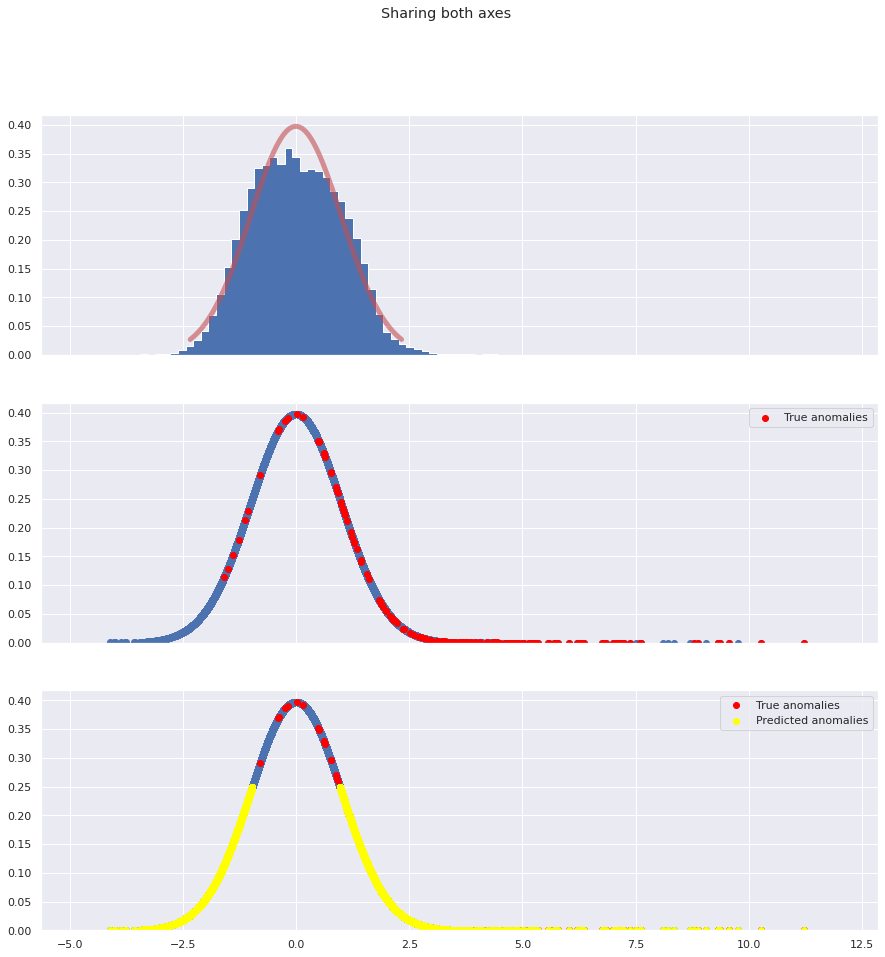

AUC: 0.117


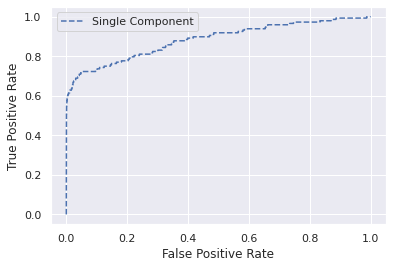

F1 score: 0.007
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2300  0.116556  0.008233
0     NaN      V11   0.2350  0.116556  0.008091
0     NaN      V11   0.2400  0.116556  0.007811
0     NaN      V11   0.2450  0.116556  0.007736
0     NaN      V11   0.2500  0.116556  0.007485

[80 rows x 5 columns]
Epsilon: 0.255


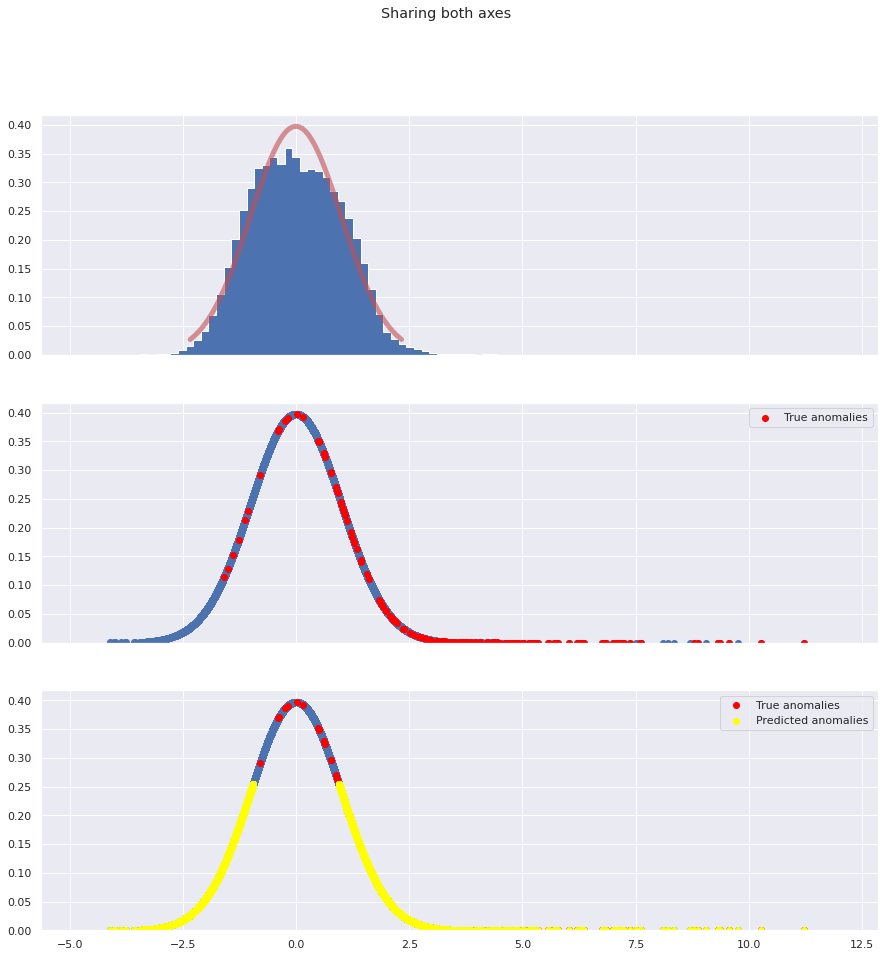

AUC: 0.117


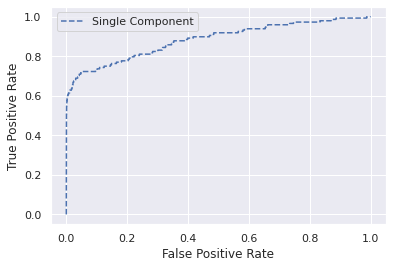

F1 score: 0.007
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2350  0.116556  0.008091
0     NaN      V11   0.2400  0.116556  0.007811
0     NaN      V11   0.2450  0.116556  0.007736
0     NaN      V11   0.2500  0.116556  0.007485
0     NaN      V11   0.2550  0.116556  0.007258

[81 rows x 5 columns]
Epsilon: 0.26


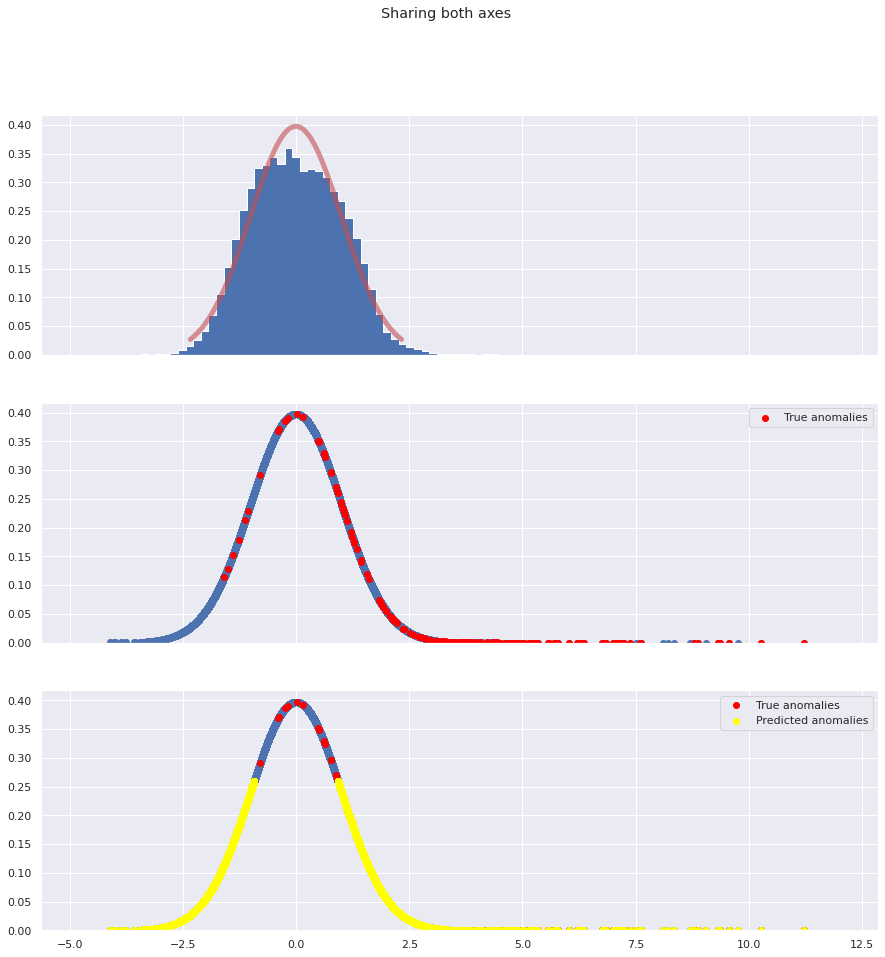

AUC: 0.117


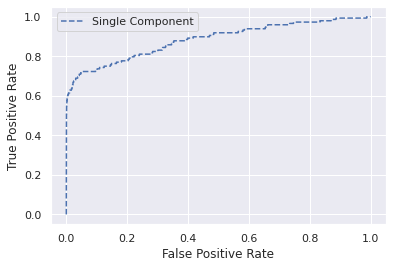

F1 score: 0.007
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2400  0.116556  0.007811
0     NaN      V11   0.2450  0.116556  0.007736
0     NaN      V11   0.2500  0.116556  0.007485
0     NaN      V11   0.2550  0.116556  0.007258
0     NaN      V11   0.2600  0.116556  0.007045

[82 rows x 5 columns]
Epsilon: 0.265


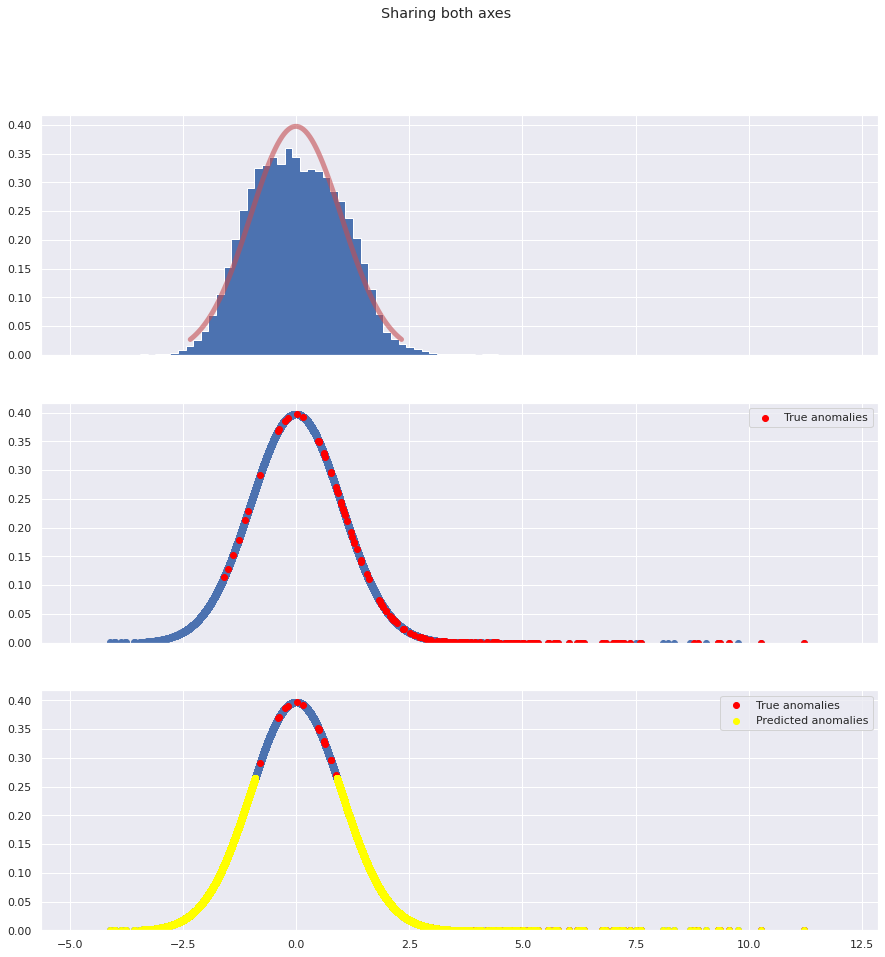

AUC: 0.117


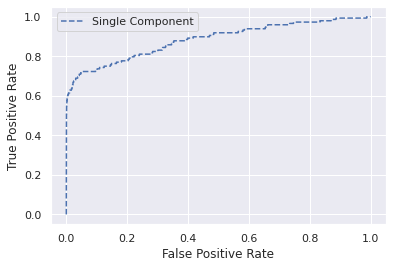

F1 score: 0.007
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2450  0.116556  0.007736
0     NaN      V11   0.2500  0.116556  0.007485
0     NaN      V11   0.2550  0.116556  0.007258
0     NaN      V11   0.2600  0.116556  0.007045
0     NaN      V11   0.2650  0.116556  0.006942

[83 rows x 5 columns]
Epsilon: 0.27


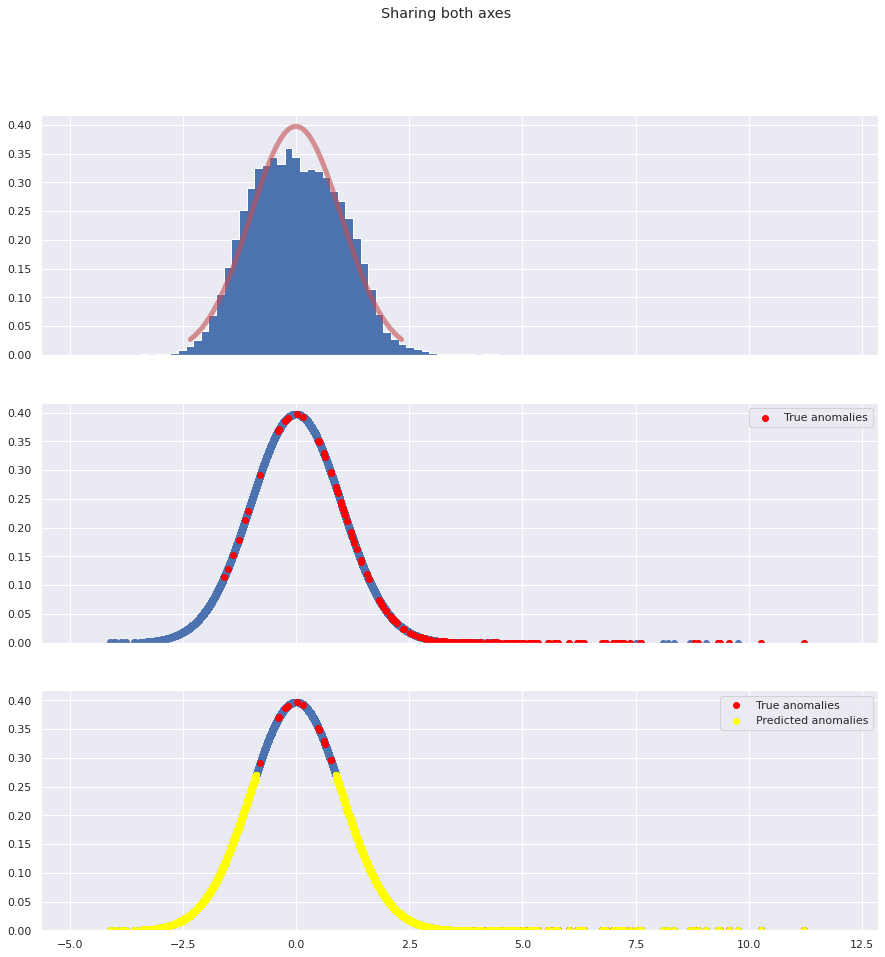

AUC: 0.117


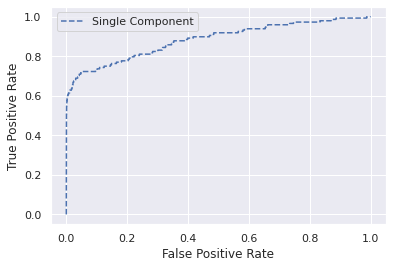

F1 score: 0.007
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2500  0.116556  0.007485
0     NaN      V11   0.2550  0.116556  0.007258
0     NaN      V11   0.2600  0.116556  0.007045
0     NaN      V11   0.2650  0.116556  0.006942
0     NaN      V11   0.2700  0.116556  0.006724

[84 rows x 5 columns]
Epsilon: 0.275


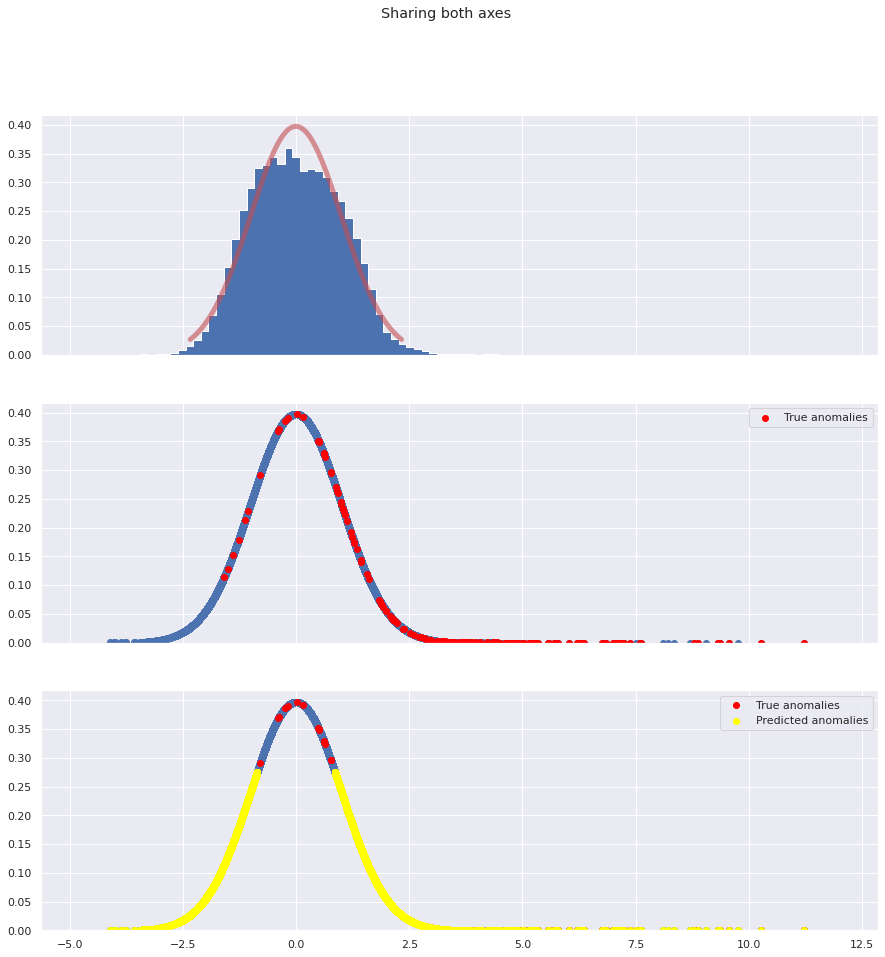

AUC: 0.117


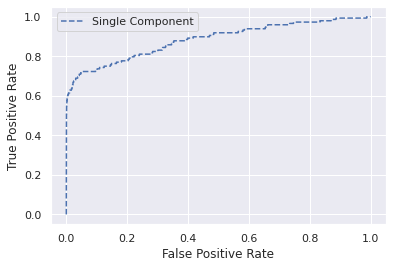

F1 score: 0.007
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2550  0.116556  0.007258
0     NaN      V11   0.2600  0.116556  0.007045
0     NaN      V11   0.2650  0.116556  0.006942
0     NaN      V11   0.2700  0.116556  0.006724
0     NaN      V11   0.2750  0.116556  0.006577

[85 rows x 5 columns]
Epsilon: 0.28


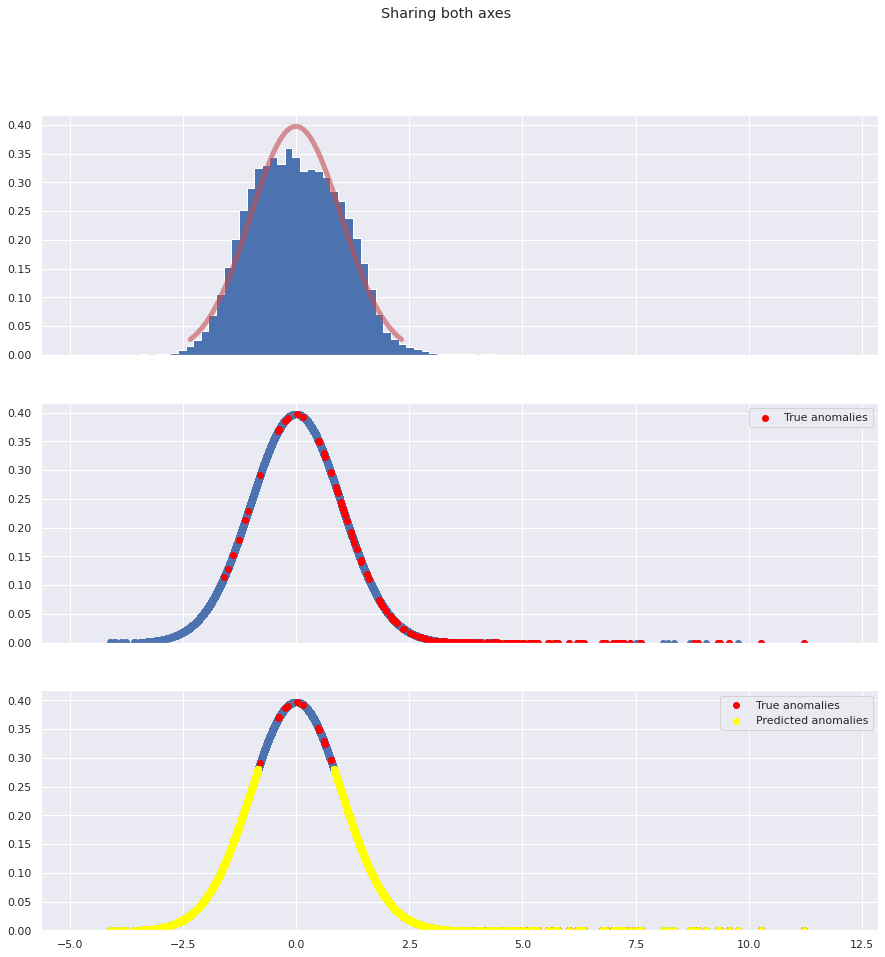

AUC: 0.117


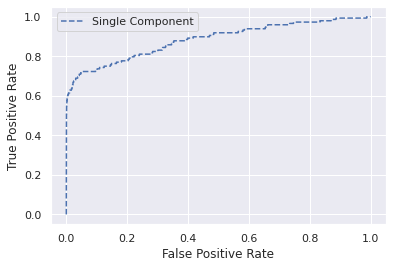

F1 score: 0.006
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2600  0.116556  0.007045
0     NaN      V11   0.2650  0.116556  0.006942
0     NaN      V11   0.2700  0.116556  0.006724
0     NaN      V11   0.2750  0.116556  0.006577
0     NaN      V11   0.2800  0.116556  0.006382

[86 rows x 5 columns]
Epsilon: 0.28500000000000003


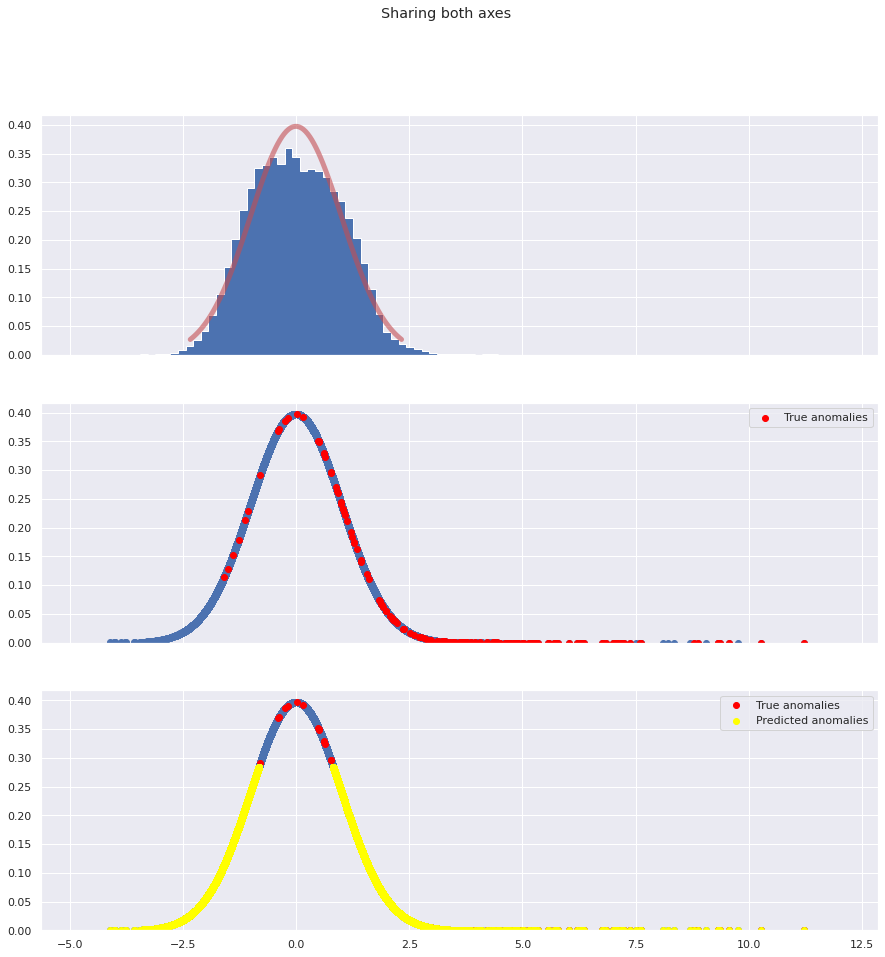

AUC: 0.117


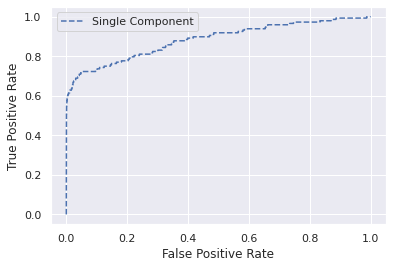

F1 score: 0.006
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2650  0.116556  0.006942
0     NaN      V11   0.2700  0.116556  0.006724
0     NaN      V11   0.2750  0.116556  0.006577
0     NaN      V11   0.2800  0.116556  0.006382
0     NaN      V11   0.2850  0.116556  0.006195

[87 rows x 5 columns]
Epsilon: 0.29


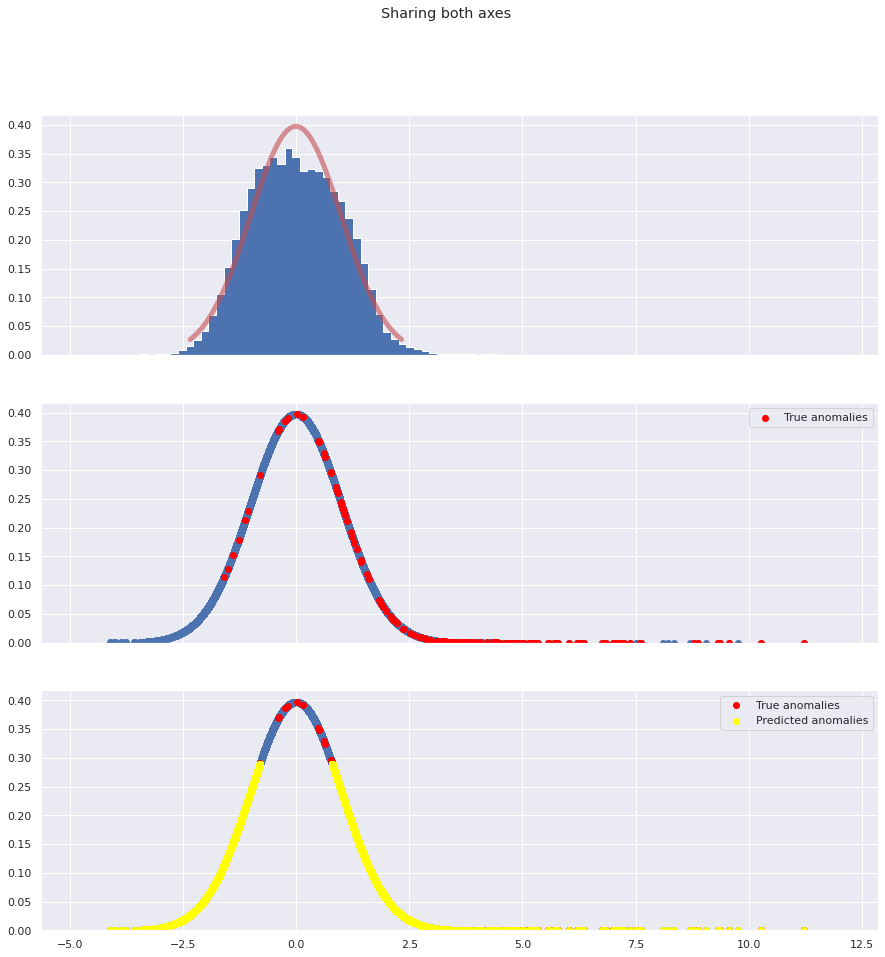

AUC: 0.117


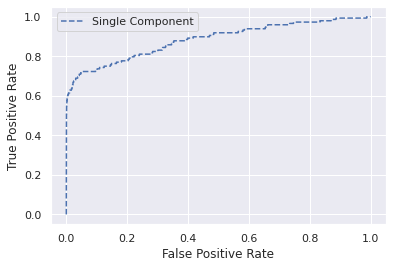

F1 score: 0.006
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2700  0.116556  0.006724
0     NaN      V11   0.2750  0.116556  0.006577
0     NaN      V11   0.2800  0.116556  0.006382
0     NaN      V11   0.2850  0.116556  0.006195
0     NaN      V11   0.2900  0.116556  0.006015

[88 rows x 5 columns]
Epsilon: 0.295


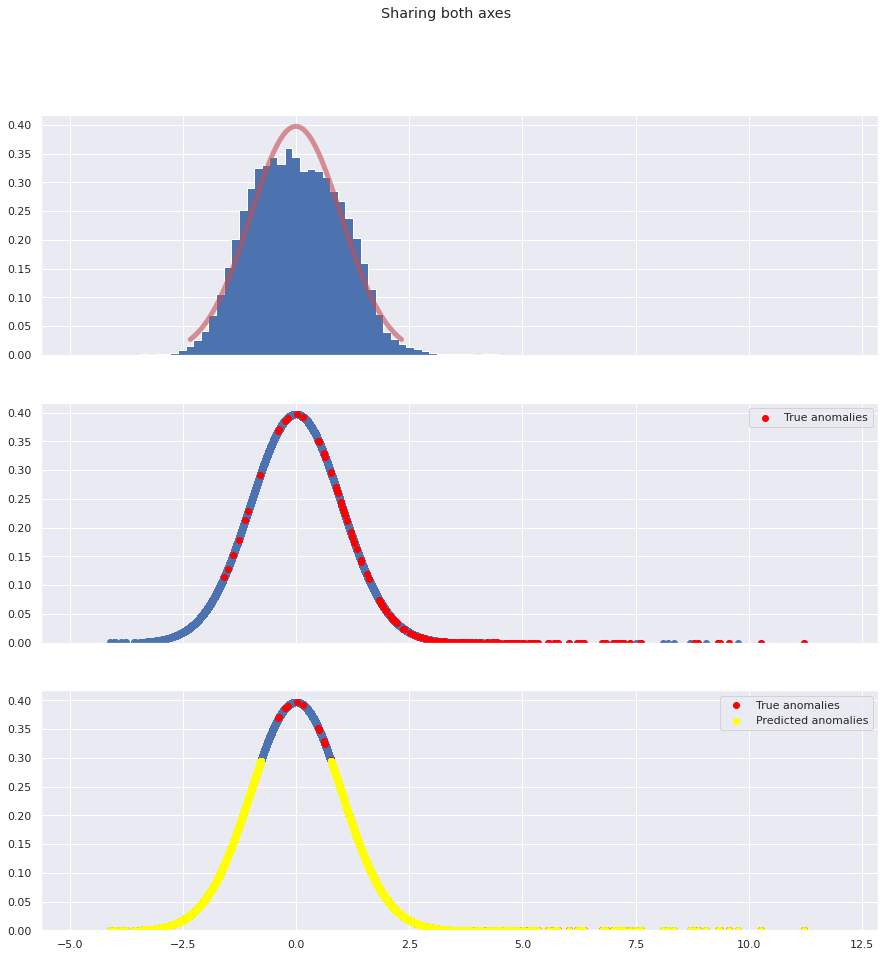

AUC: 0.117


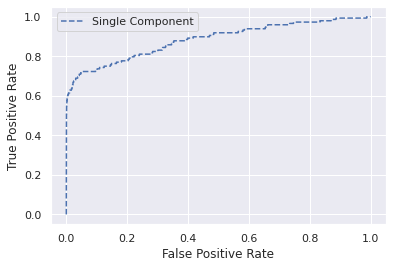

F1 score: 0.006
    index var_name  epsilon       AUC  F1_score
0     0.0      V11   0.0001  0.116556  0.558952
1     0.0      V11   0.0101  0.116556  0.278481
2     0.0      V11   0.0201  0.116556  0.166210
3     0.0      V11   0.0301  0.116556  0.115028
4     0.0      V11   0.0401  0.116556  0.089649
..    ...      ...      ...       ...       ...
0     NaN      V11   0.2750  0.116556  0.006577
0     NaN      V11   0.2800  0.116556  0.006382
0     NaN      V11   0.2850  0.116556  0.006195
0     NaN      V11   0.2900  0.116556  0.006015
0     NaN      V11   0.2950  0.116556  0.005894

[89 rows x 5 columns]


In [43]:

for i in range(0, len(epsilons)): 
  var_name = 'V11'
  epsilon = epsilons[i]
  print("Epsilon: {}".format(epsilon))

  arr = np.array(non_fraud_X_train[var_name])
  std_dev = np.std(arr)
  mean = np.mean(arr)


  norm = stats.norm(

      loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
      scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

  )



  fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
  fig.suptitle('Sharing both axes')



  x = np.linspace(norm.ppf(0.01),
                  norm.ppf(0.99), 100)
  axs[0].plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
  axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


  x = np.array(X_test[var_name])
  mu = mean
  sigma = std_dev
  probs = p_x(x, mu, sigma)
  preds = np.where(probs < epsilon, 1, 0)

  summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


  axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[1].legend()



  axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
  axs[2].legend()



  plt.show()


  fpr, tpr, thresholds = roc_curve(summary_df['y_test'], summary_df['p(x)'])
  auc = roc_auc_score(summary_df['y_test'], summary_df['p(x)'])
  print('AUC: %.3f' % auc)

  fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
  plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()


  from sklearn.metrics import f1_score

  f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
  print("F1 score: %.3f" % f1_score)

  new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

  results = results.append(new_results)
  results = results.drop_duplicates()
  print(results)

In [44]:
results.reset_index(inplace=True)

In [45]:
results

level_0  index var_name  epsilon       AUC  F1_score
0         0    0.0      V11   0.0001  0.116556  0.558952
1         1    0.0      V11   0.0101  0.116556  0.278481
2         2    0.0      V11   0.0201  0.116556  0.166210
3         3    0.0      V11   0.0301  0.116556  0.115028
4         4    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
84        0    NaN      V11   0.2750  0.116556  0.006577
85        0    NaN      V11   0.2800  0.116556  0.006382
86        0    NaN      V11   0.2850  0.116556  0.006195
87        0    NaN      V11   0.2900  0.116556  0.006015
88        0    NaN      V11   0.2950  0.116556  0.005894

[89 rows x 6 columns]

In [47]:
optimal_epsilon = results.iloc[[results['F1_score'].idxmax()]]['epsilon'].iloc[0]
optimal_epsilon

0.0001

### Fitting to different variables to find best auc

In [52]:
possible_vars = list(X_train.columns)[1:-2]

In [53]:
possible_vars

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

Epsilon: 0.0001


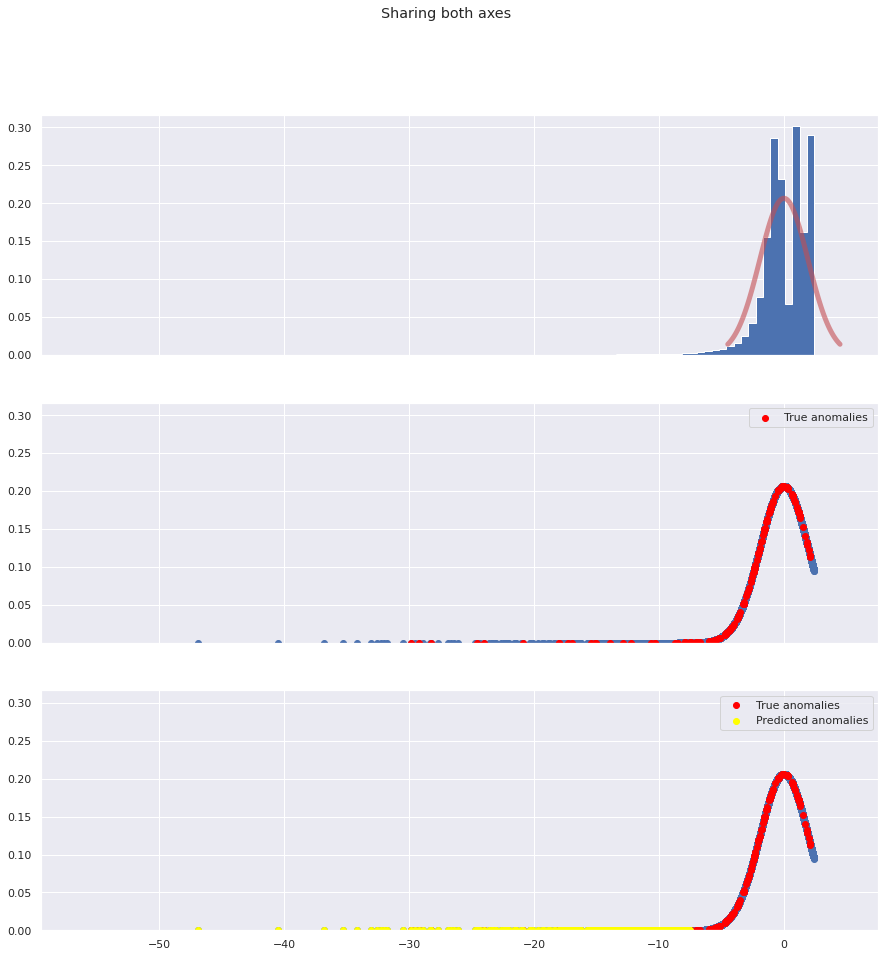

AUC: 0.298


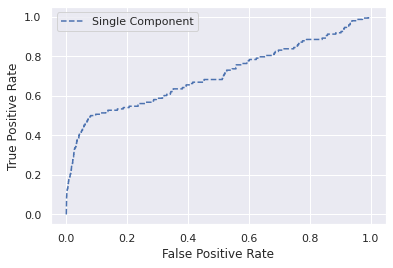

F1 score: 0.056
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
85      0.0    NaN      V11   0.2800  0.116556  0.006382
86      0.0    NaN      V11   0.2850  0.116556  0.006195
87      0.0    NaN      V11   0.2900  0.116556  0.006015
88      0.0    NaN      V11   0.2950  0.116556  0.005894
0       NaN    NaN       V1   0.0001  0.297944  0.055825

[90 rows x 6 columns]
Epsilon: 0.0001


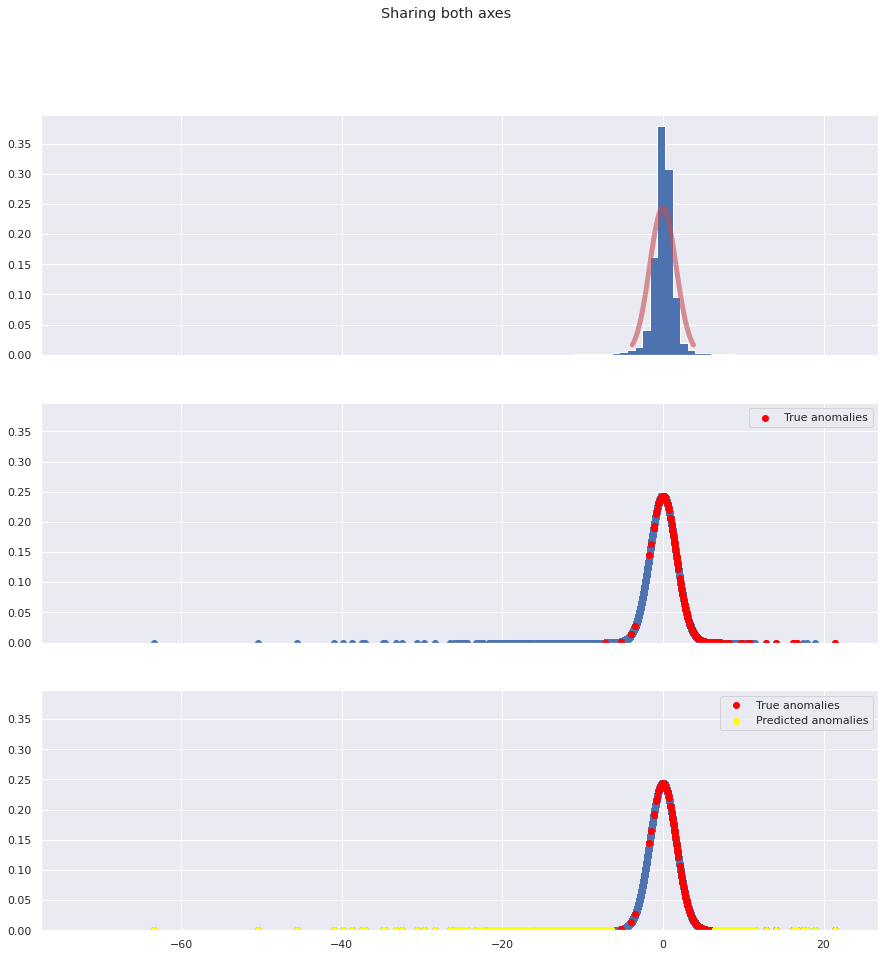

AUC: 0.171


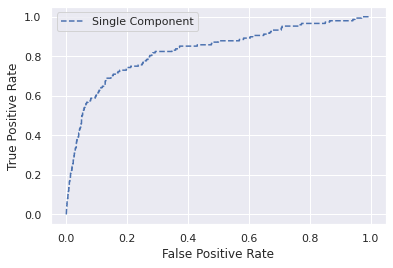

F1 score: 0.041
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
86      0.0    NaN      V11   0.2850  0.116556  0.006195
87      0.0    NaN      V11   0.2900  0.116556  0.006015
88      0.0    NaN      V11   0.2950  0.116556  0.005894
0       NaN    NaN       V1   0.0001  0.297944  0.055825
0       NaN    NaN       V2   0.0001  0.170933  0.040863

[91 rows x 6 columns]
Epsilon: 0.0001


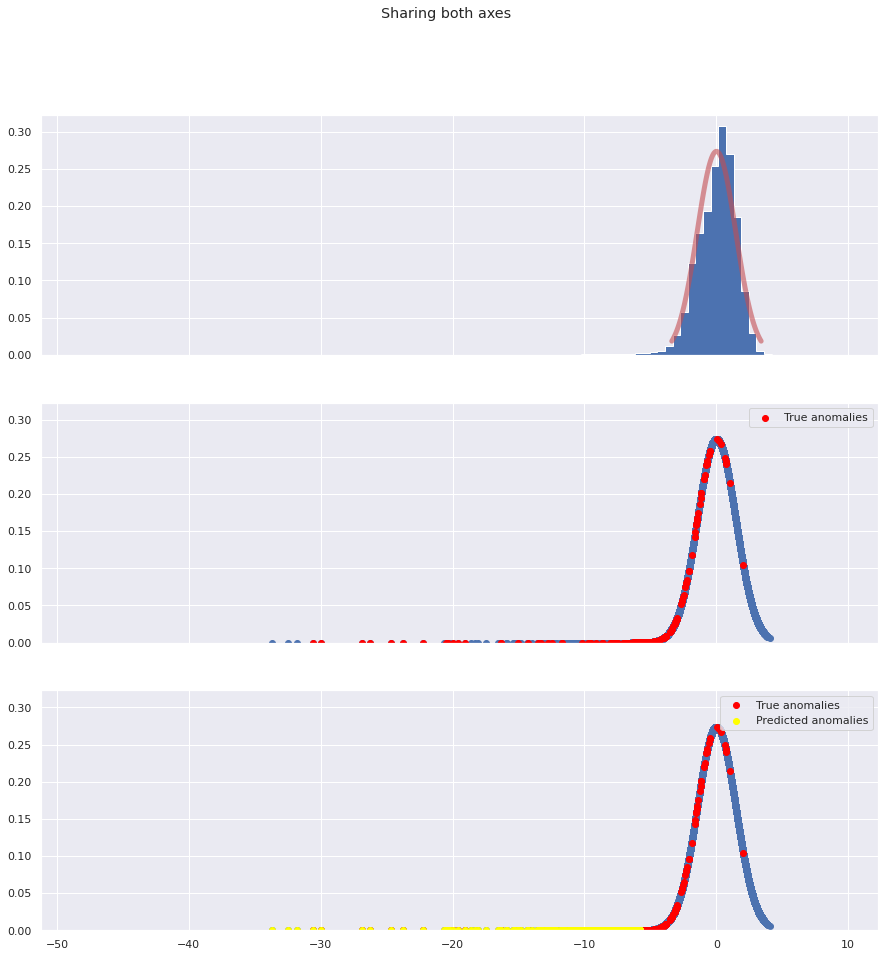

AUC: 0.116


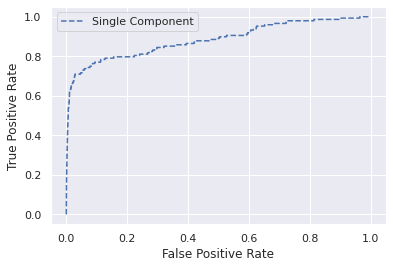

F1 score: 0.216
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
87      0.0    NaN      V11   0.2900  0.116556  0.006015
88      0.0    NaN      V11   0.2950  0.116556  0.005894
0       NaN    NaN       V1   0.0001  0.297944  0.055825
0       NaN    NaN       V2   0.0001  0.170933  0.040863
0       NaN    NaN       V3   0.0001  0.116315  0.215886

[92 rows x 6 columns]
Epsilon: 0.0001


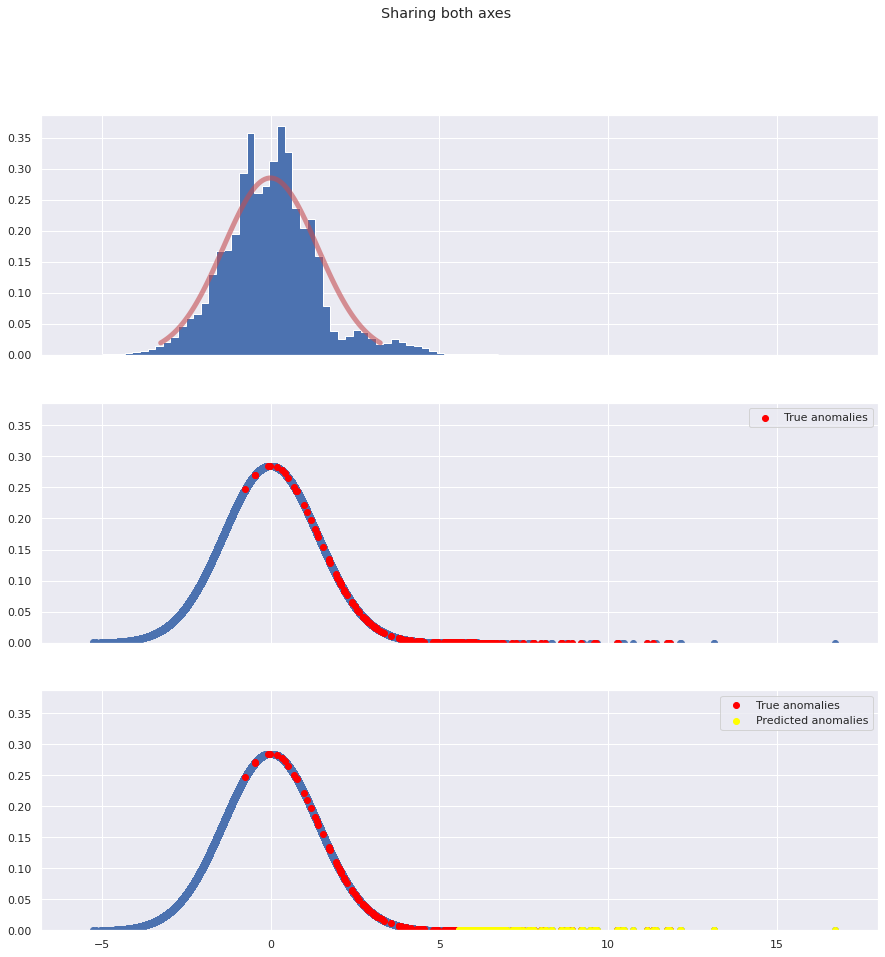

AUC: 0.097


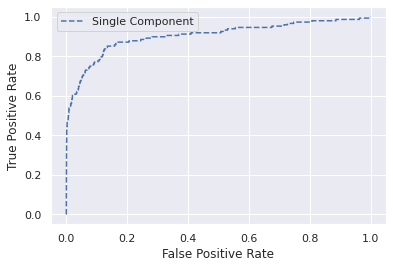

F1 score: 0.336
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
88      0.0    NaN      V11   0.2950  0.116556  0.005894
0       NaN    NaN       V1   0.0001  0.297944  0.055825
0       NaN    NaN       V2   0.0001  0.170933  0.040863
0       NaN    NaN       V3   0.0001  0.116315  0.215886
0       NaN    NaN       V4   0.0001  0.096538  0.335570

[93 rows x 6 columns]
Epsilon: 0.0001


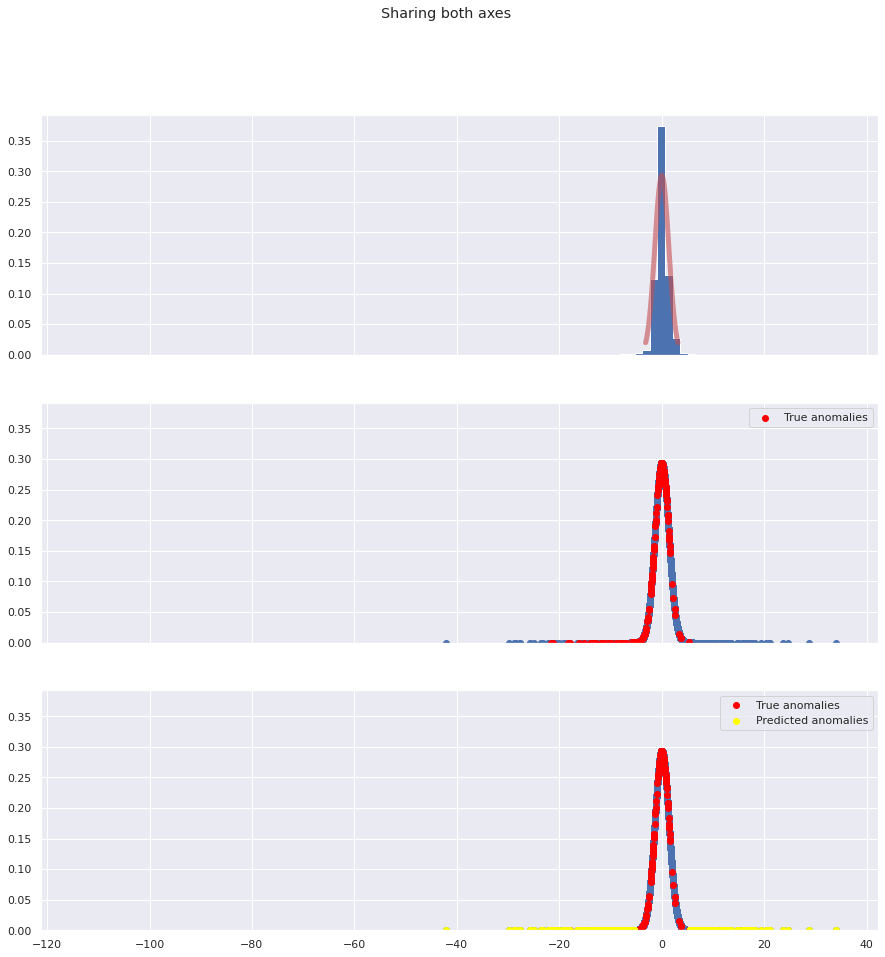

AUC: 0.248


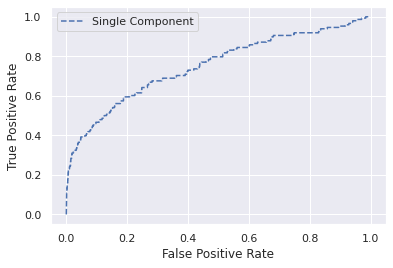

F1 score: 0.080
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V1   0.0001  0.297944  0.055825
0       NaN    NaN       V2   0.0001  0.170933  0.040863
0       NaN    NaN       V3   0.0001  0.116315  0.215886
0       NaN    NaN       V4   0.0001  0.096538  0.335570
0       NaN    NaN       V5   0.0001  0.248389  0.079511

[94 rows x 6 columns]
Epsilon: 0.0001


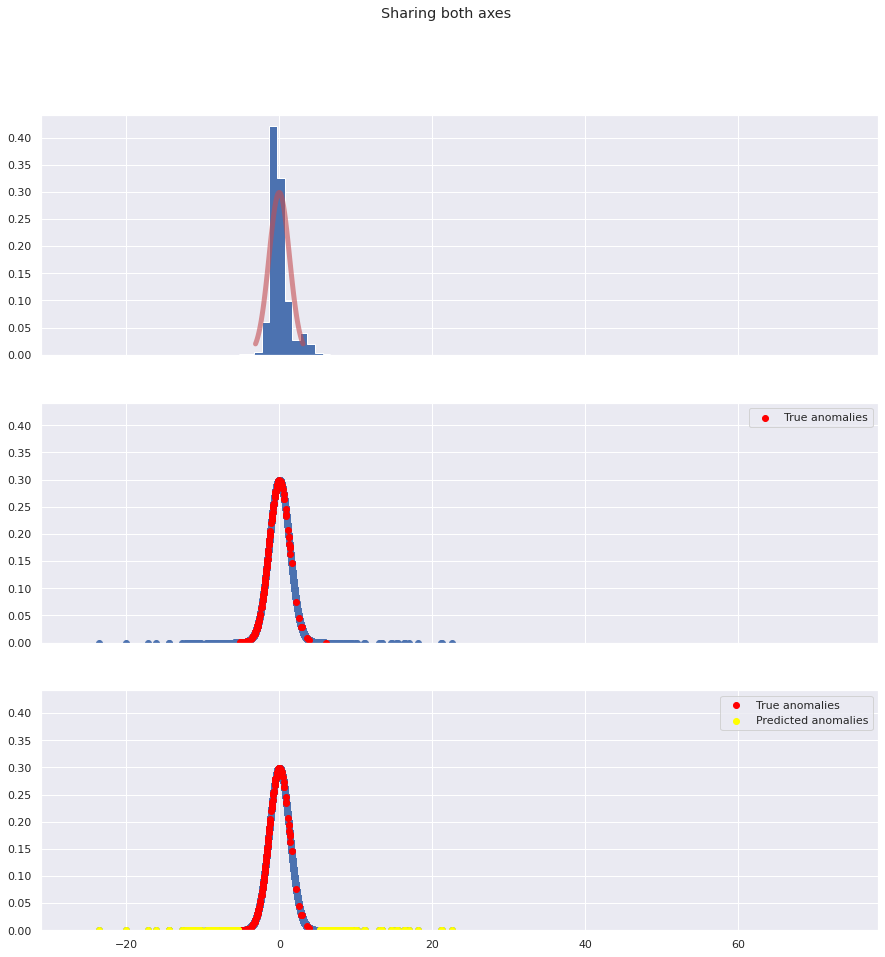

AUC: 0.278


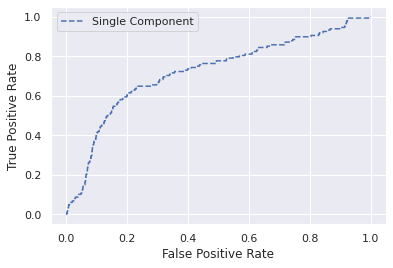

F1 score: 0.005
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V2   0.0001  0.170933  0.040863
0       NaN    NaN       V3   0.0001  0.116315  0.215886
0       NaN    NaN       V4   0.0001  0.096538  0.335570
0       NaN    NaN       V5   0.0001  0.248389  0.079511
0       NaN    NaN       V6   0.0001  0.278300  0.005013

[95 rows x 6 columns]
Epsilon: 0.0001


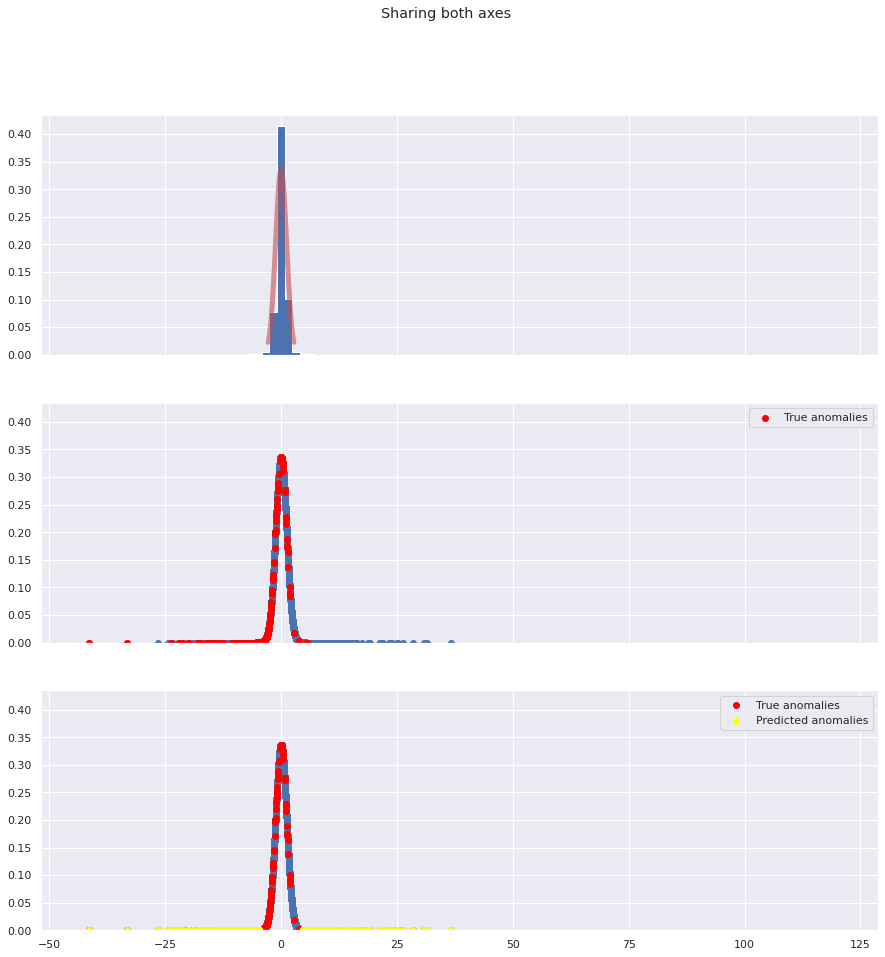

AUC: 0.132


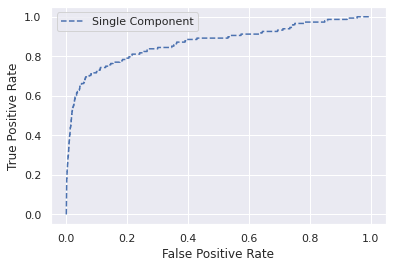

F1 score: 0.106
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V3   0.0001  0.116315  0.215886
0       NaN    NaN       V4   0.0001  0.096538  0.335570
0       NaN    NaN       V5   0.0001  0.248389  0.079511
0       NaN    NaN       V6   0.0001  0.278300  0.005013
0       NaN    NaN       V7   0.0001  0.131931  0.106409

[96 rows x 6 columns]
Epsilon: 0.0001


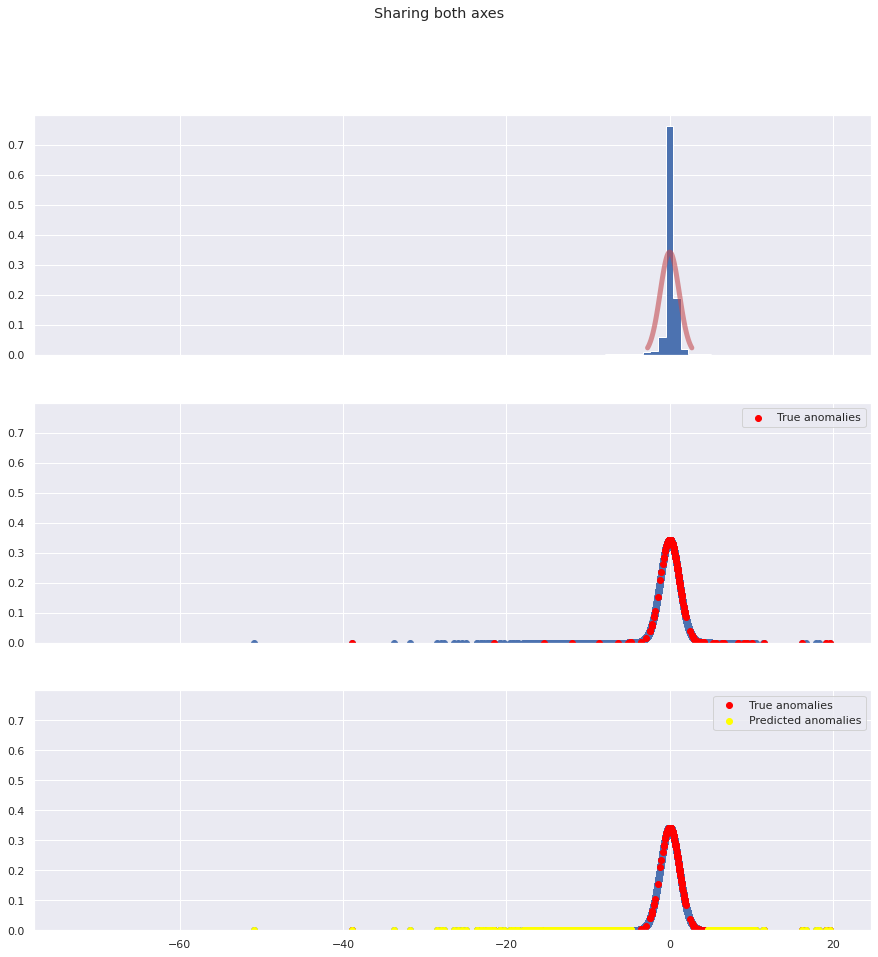

AUC: 0.227


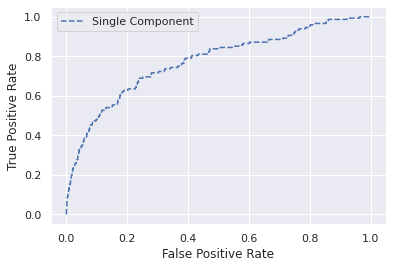

F1 score: 0.038
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V4   0.0001  0.096538  0.335570
0       NaN    NaN       V5   0.0001  0.248389  0.079511
0       NaN    NaN       V6   0.0001  0.278300  0.005013
0       NaN    NaN       V7   0.0001  0.131931  0.106409
0       NaN    NaN       V8   0.0001  0.226820  0.037906

[97 rows x 6 columns]
Epsilon: 0.0001


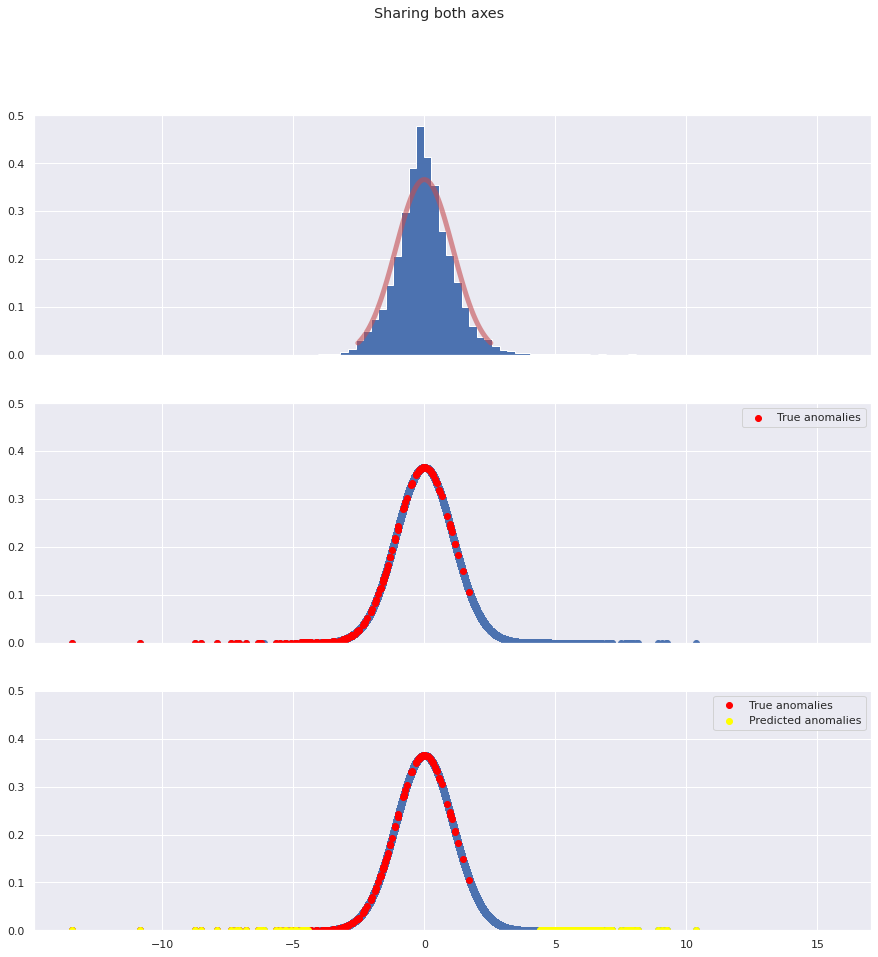

AUC: 0.230


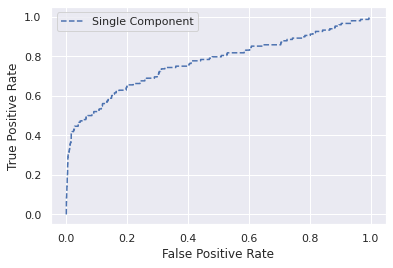

F1 score: 0.111
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V5   0.0001  0.248389  0.079511
0       NaN    NaN       V6   0.0001  0.278300  0.005013
0       NaN    NaN       V7   0.0001  0.131931  0.106409
0       NaN    NaN       V8   0.0001  0.226820  0.037906
0       NaN    NaN       V9   0.0001  0.229975  0.110874

[98 rows x 6 columns]
Epsilon: 0.0001


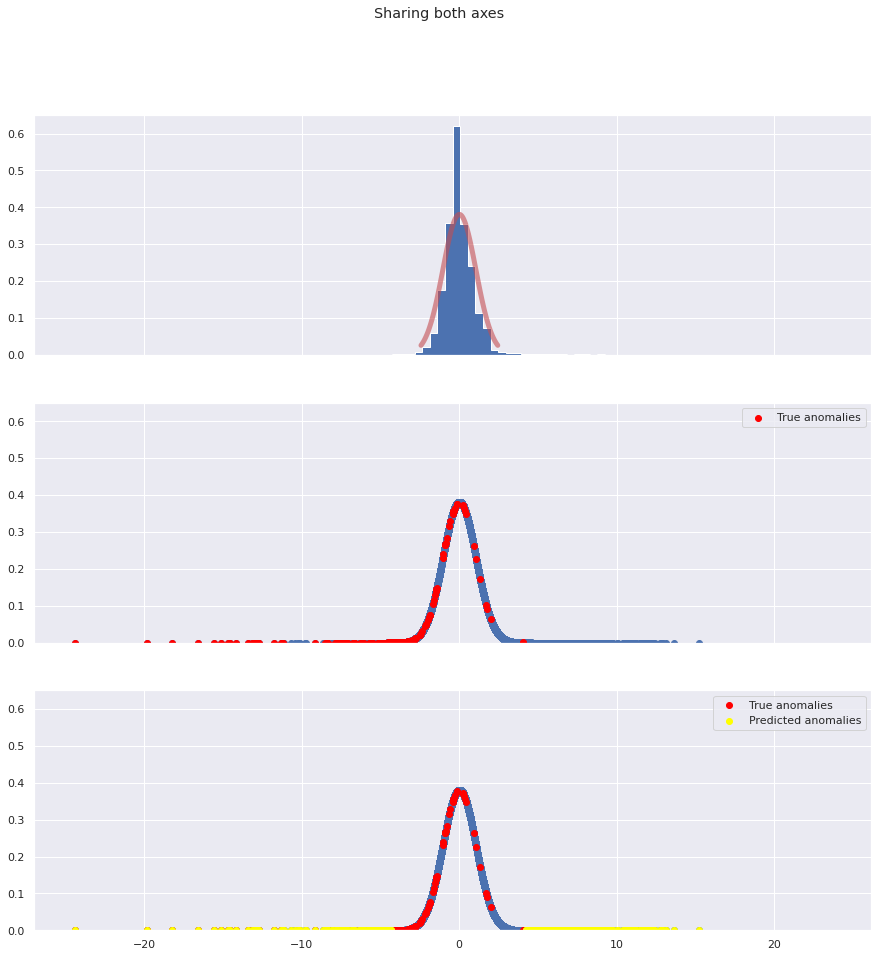

AUC: 0.086


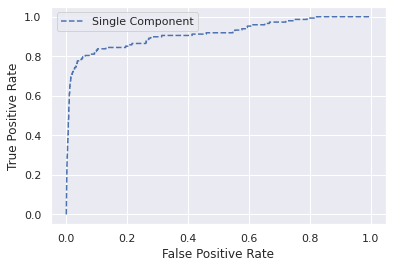

F1 score: 0.160
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V6   0.0001  0.278300  0.005013
0       NaN    NaN       V7   0.0001  0.131931  0.106409
0       NaN    NaN       V8   0.0001  0.226820  0.037906
0       NaN    NaN       V9   0.0001  0.229975  0.110874
0       NaN    NaN      V10   0.0001  0.085572  0.160271

[99 rows x 6 columns]
Epsilon: 0.0001


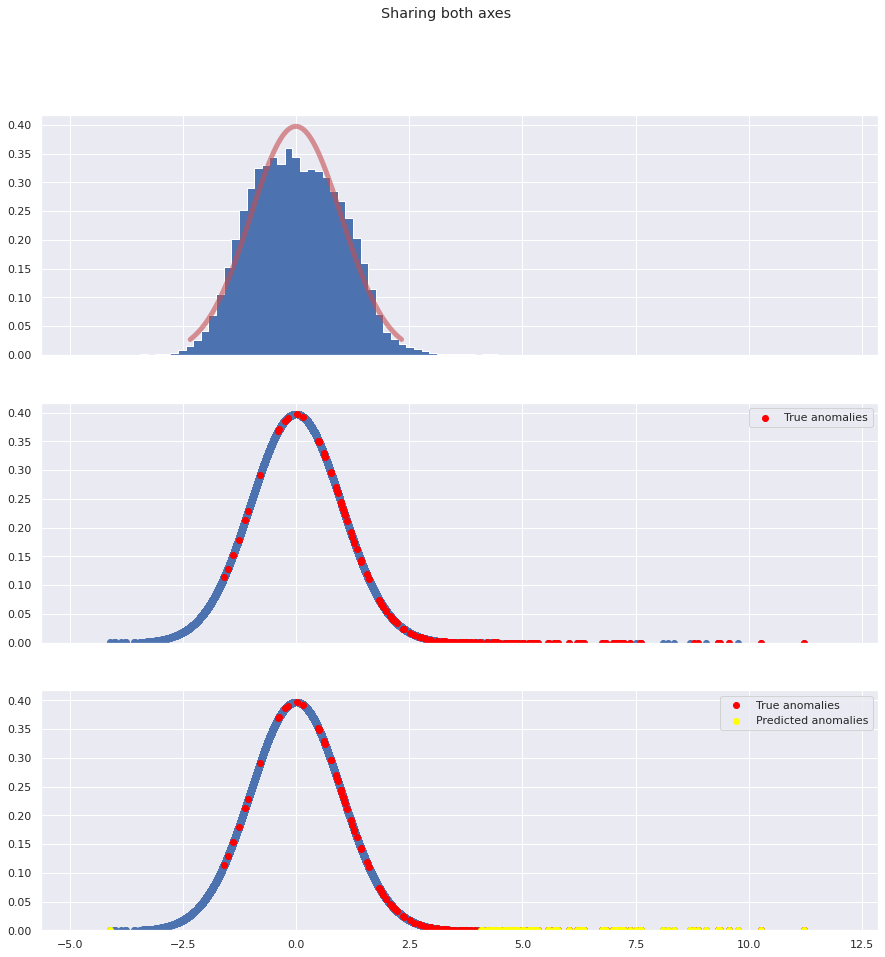

AUC: 0.117


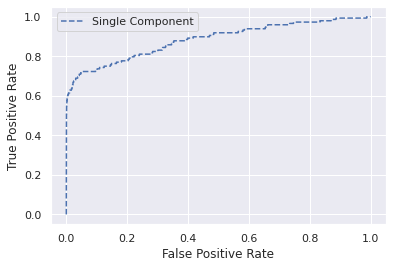

F1 score: 0.559
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V7   0.0001  0.131931  0.106409
0       NaN    NaN       V8   0.0001  0.226820  0.037906
0       NaN    NaN       V9   0.0001  0.229975  0.110874
0       NaN    NaN      V10   0.0001  0.085572  0.160271
0       NaN    NaN      V11   0.0001  0.116556  0.558952

[100 rows x 6 columns]
Epsilon: 0.0001


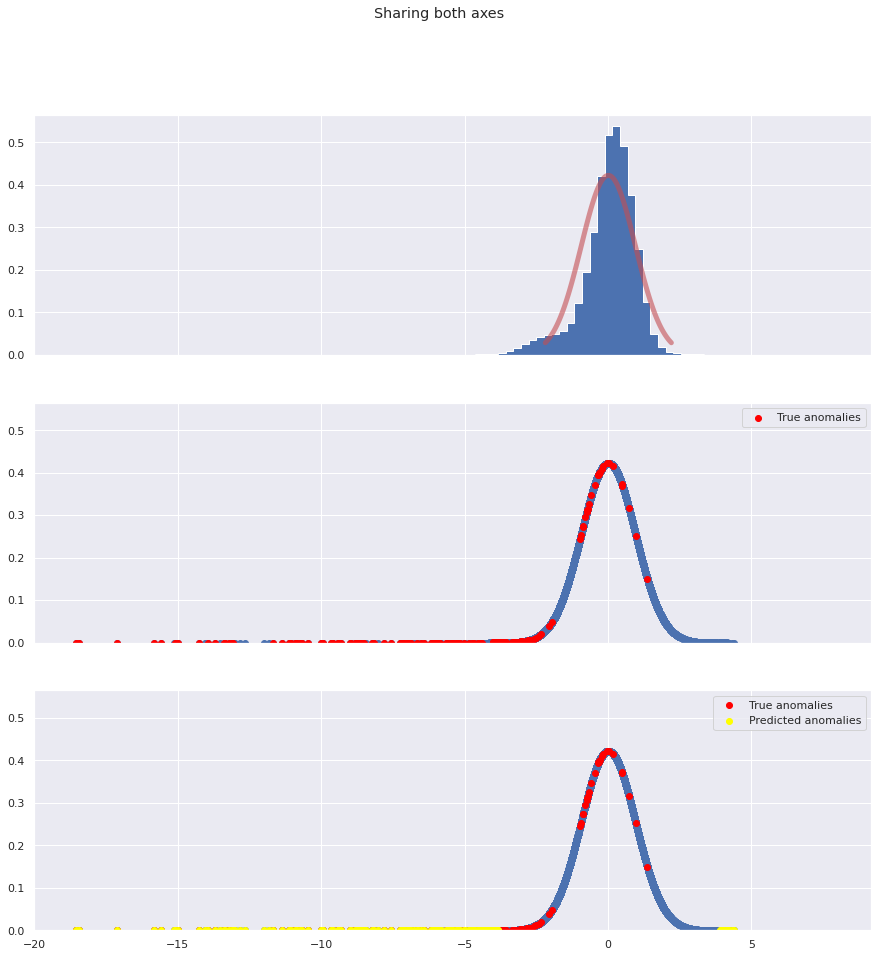

AUC: 0.093


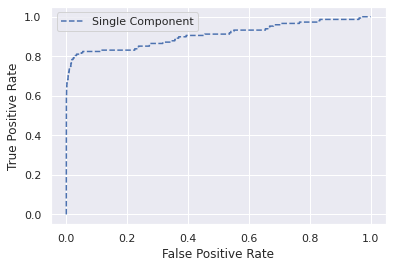

F1 score: 0.521
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V8   0.0001  0.226820  0.037906
0       NaN    NaN       V9   0.0001  0.229975  0.110874
0       NaN    NaN      V10   0.0001  0.085572  0.160271
0       NaN    NaN      V11   0.0001  0.116556  0.558952
0       NaN    NaN      V12   0.0001  0.092739  0.520776

[101 rows x 6 columns]
Epsilon: 0.0001


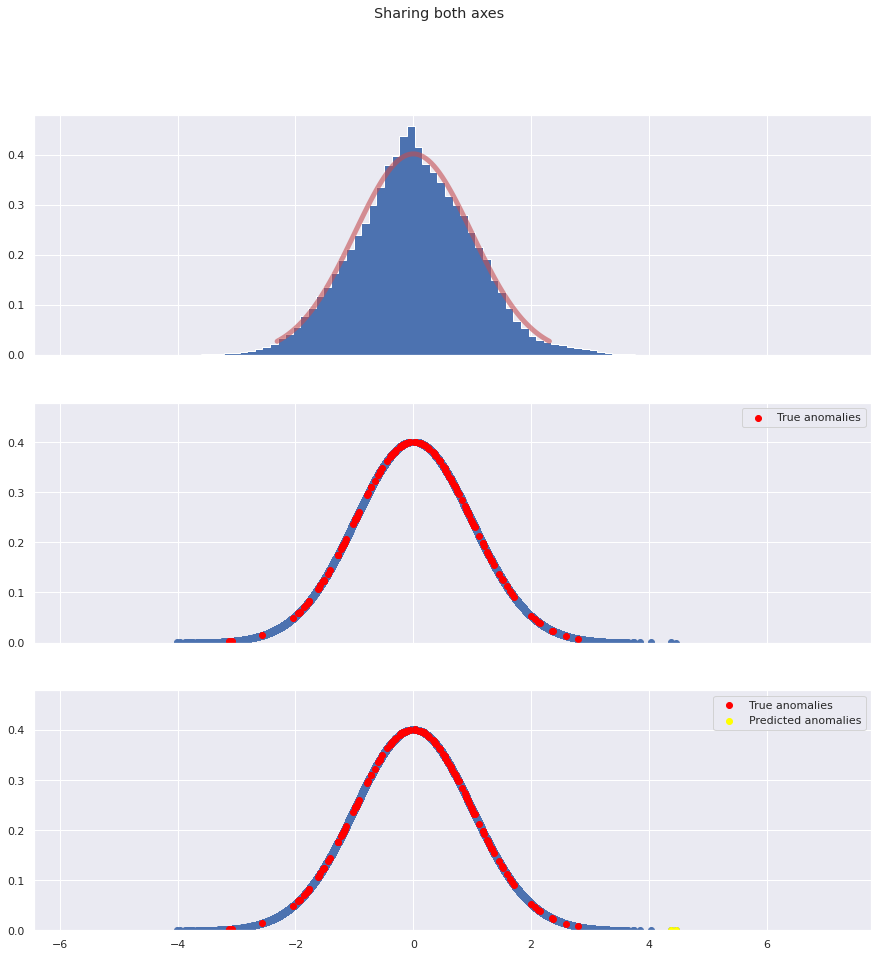

AUC: 0.419


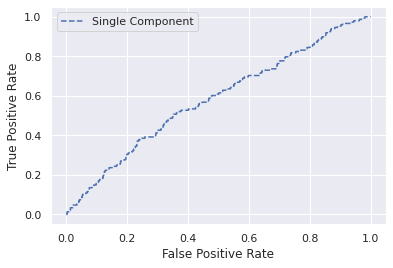

F1 score: 0.000
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN       V9   0.0001  0.229975  0.110874
0       NaN    NaN      V10   0.0001  0.085572  0.160271
0       NaN    NaN      V11   0.0001  0.116556  0.558952
0       NaN    NaN      V12   0.0001  0.092739  0.520776
0       NaN    NaN      V13   0.0001  0.418830  0.000000

[102 rows x 6 columns]
Epsilon: 0.0001


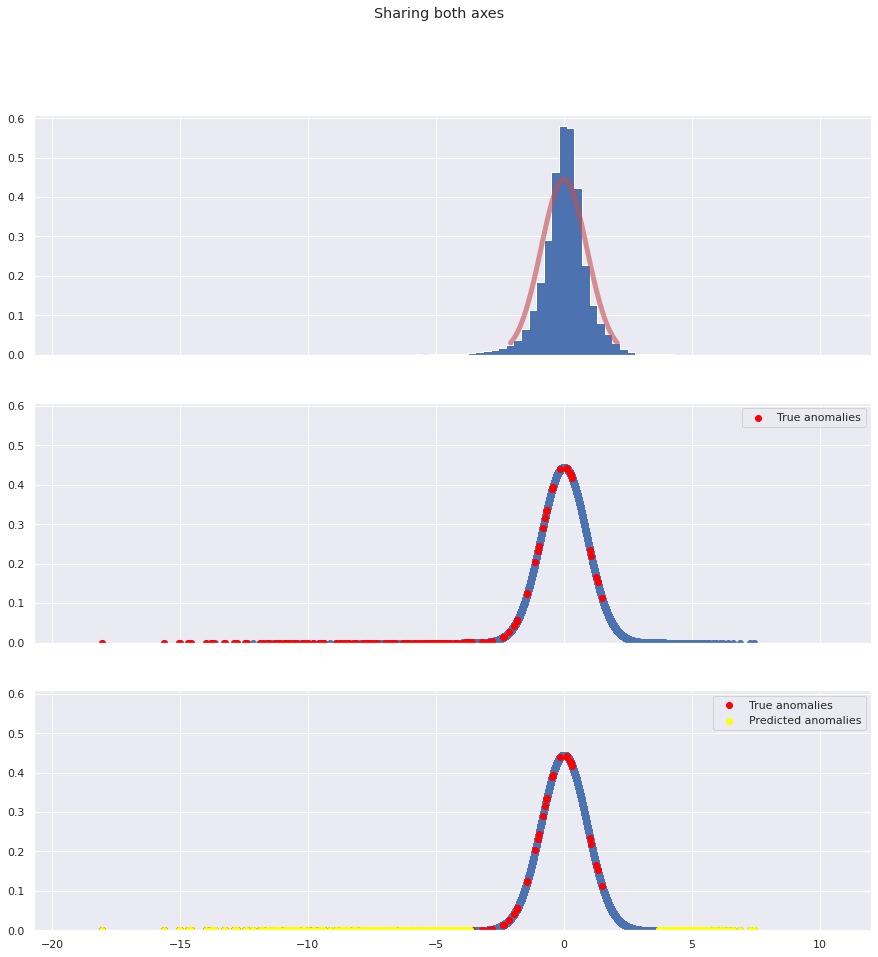

AUC: 0.059


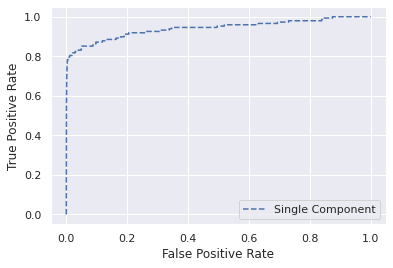

F1 score: 0.390
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V10   0.0001  0.085572  0.160271
0       NaN    NaN      V11   0.0001  0.116556  0.558952
0       NaN    NaN      V12   0.0001  0.092739  0.520776
0       NaN    NaN      V13   0.0001  0.418830  0.000000
0       NaN    NaN      V14   0.0001  0.058754  0.390492

[103 rows x 6 columns]
Epsilon: 0.0001


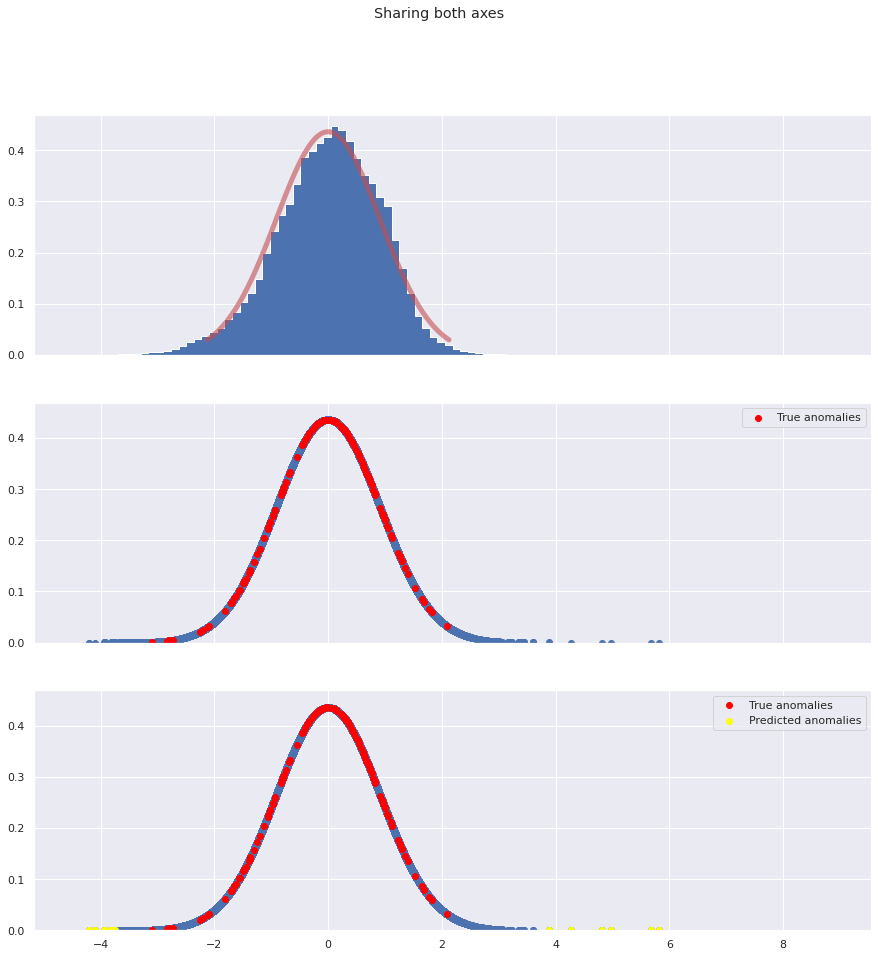

AUC: 0.462


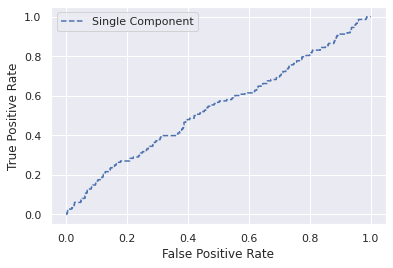

F1 score: 0.000
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V11   0.0001  0.116556  0.558952
0       NaN    NaN      V12   0.0001  0.092739  0.520776
0       NaN    NaN      V13   0.0001  0.418830  0.000000
0       NaN    NaN      V14   0.0001  0.058754  0.390492
0       NaN    NaN      V15   0.0001  0.461546  0.000000

[104 rows x 6 columns]
Epsilon: 0.0001


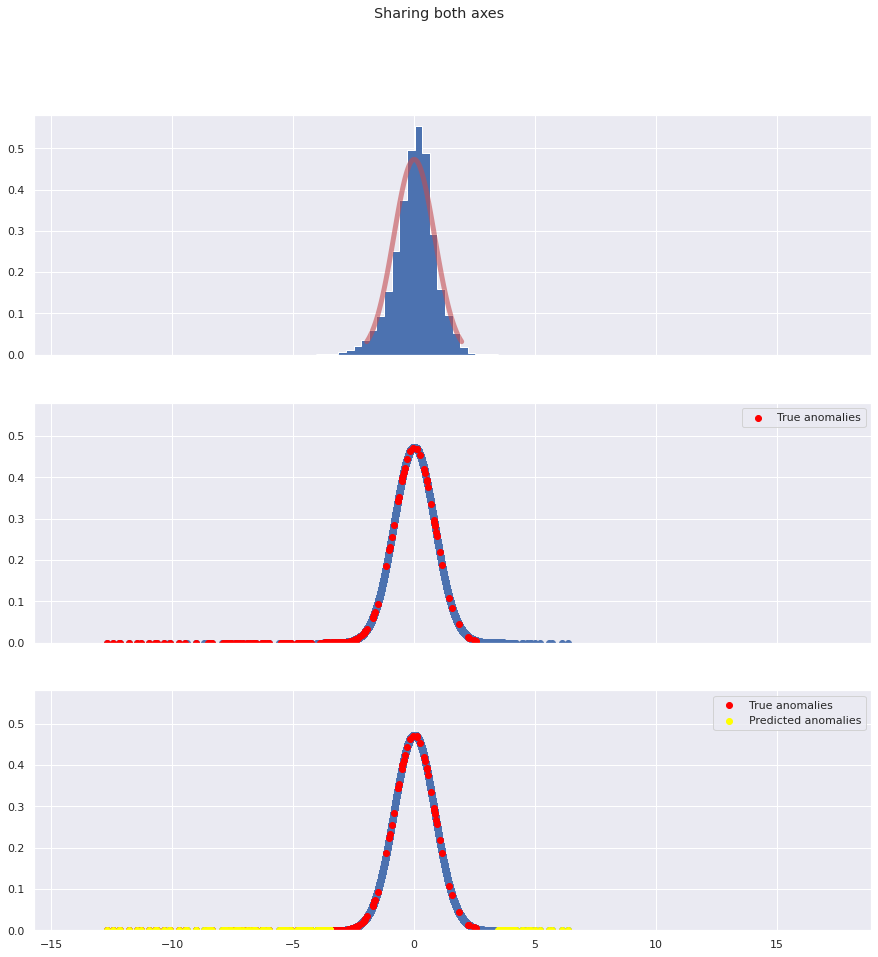

AUC: 0.111


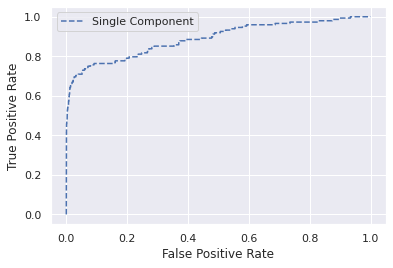

F1 score: 0.413
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V12   0.0001  0.092739  0.520776
0       NaN    NaN      V13   0.0001  0.418830  0.000000
0       NaN    NaN      V14   0.0001  0.058754  0.390492
0       NaN    NaN      V15   0.0001  0.461546  0.000000
0       NaN    NaN      V16   0.0001  0.110966  0.413374

[105 rows x 6 columns]
Epsilon: 0.0001


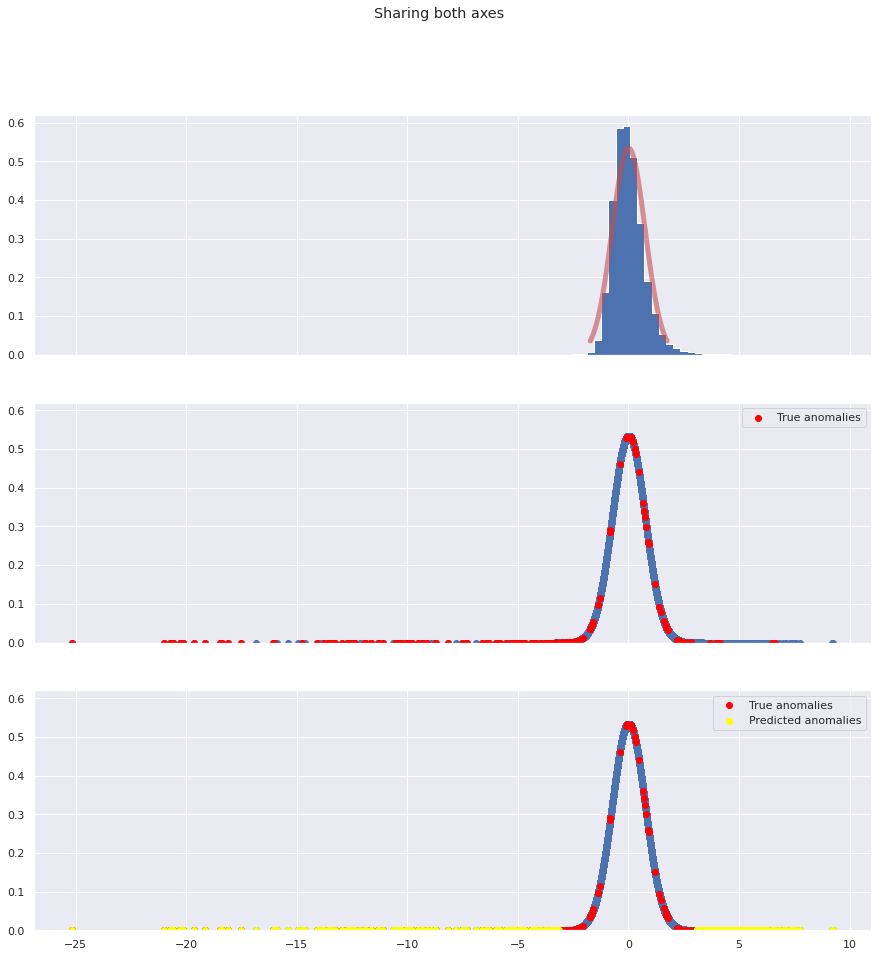

AUC: 0.070


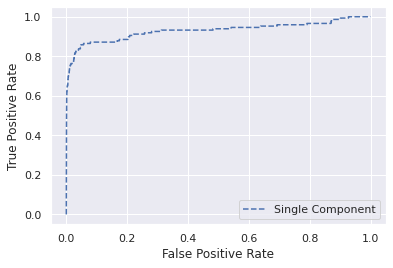

F1 score: 0.324
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V13   0.0001  0.418830  0.000000
0       NaN    NaN      V14   0.0001  0.058754  0.390492
0       NaN    NaN      V15   0.0001  0.461546  0.000000
0       NaN    NaN      V16   0.0001  0.110966  0.413374
0       NaN    NaN      V17   0.0001  0.070201  0.324324

[106 rows x 6 columns]
Epsilon: 0.0001


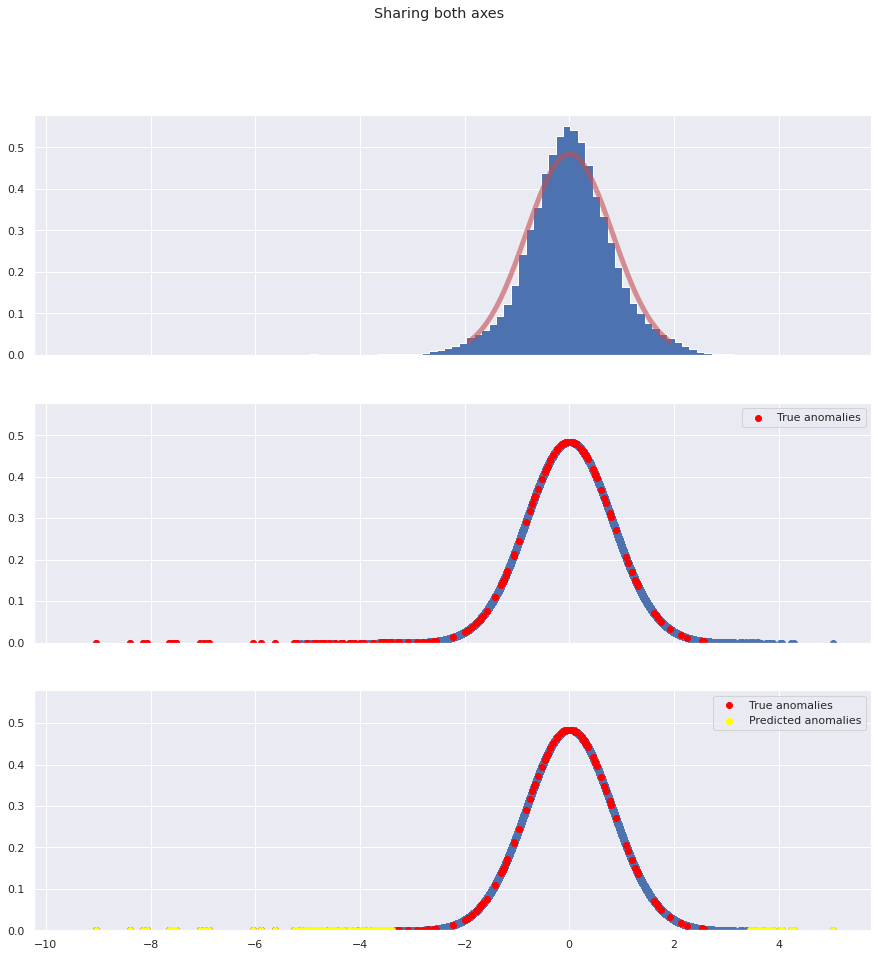

AUC: 0.235


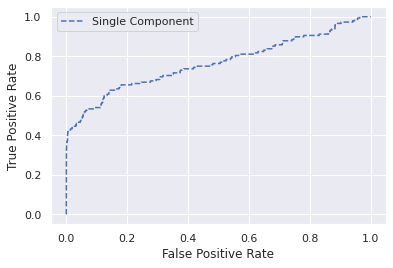

F1 score: 0.390
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V14   0.0001  0.058754  0.390492
0       NaN    NaN      V15   0.0001  0.461546  0.000000
0       NaN    NaN      V16   0.0001  0.110966  0.413374
0       NaN    NaN      V17   0.0001  0.070201  0.324324
0       NaN    NaN      V18   0.0001  0.235320  0.390438

[107 rows x 6 columns]
Epsilon: 0.0001


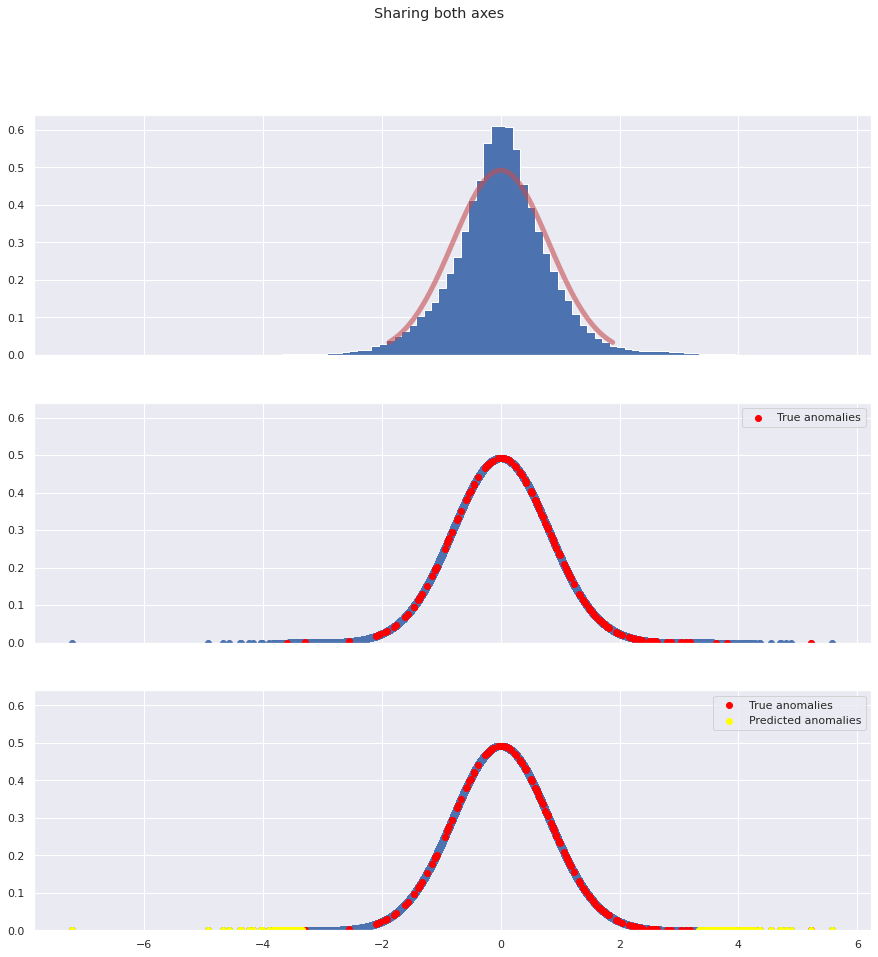

AUC: 0.258


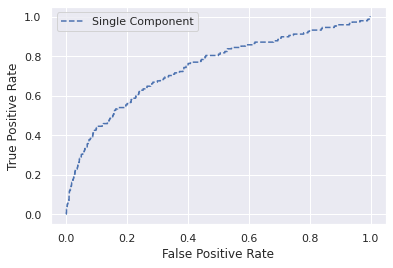

F1 score: 0.025
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V15   0.0001  0.461546  0.000000
0       NaN    NaN      V16   0.0001  0.110966  0.413374
0       NaN    NaN      V17   0.0001  0.070201  0.324324
0       NaN    NaN      V18   0.0001  0.235320  0.390438
0       NaN    NaN      V19   0.0001  0.257866  0.025397

[108 rows x 6 columns]
Epsilon: 0.0001


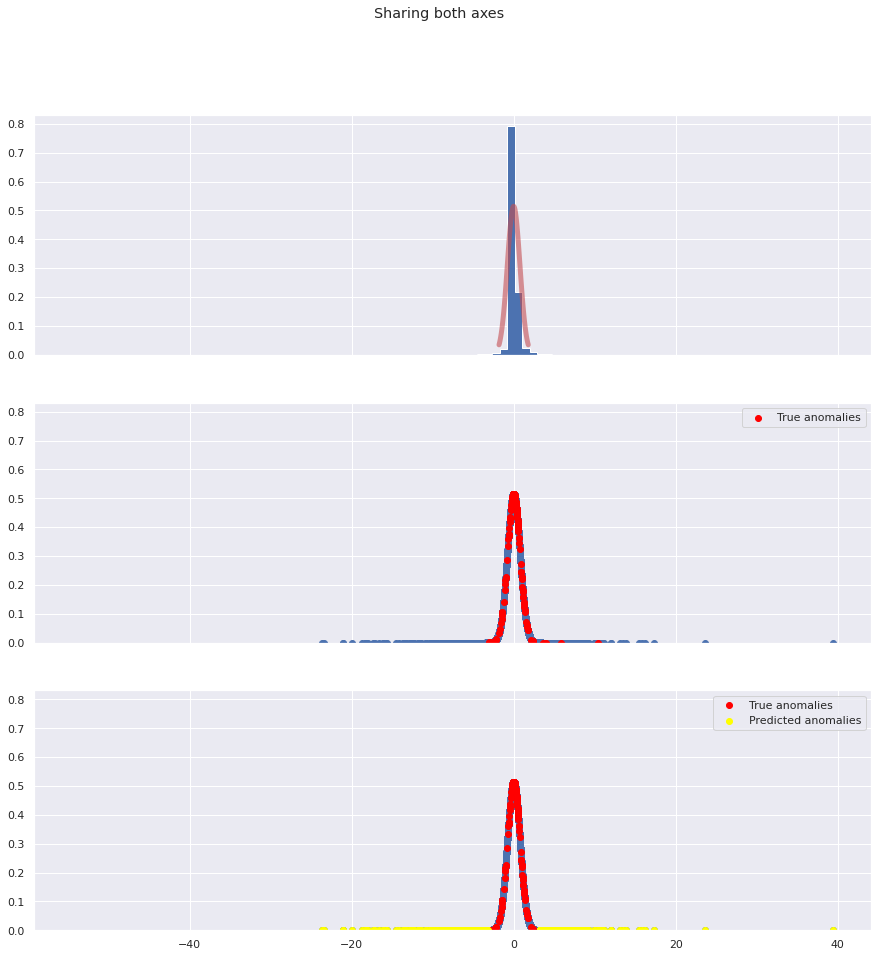

AUC: 0.282


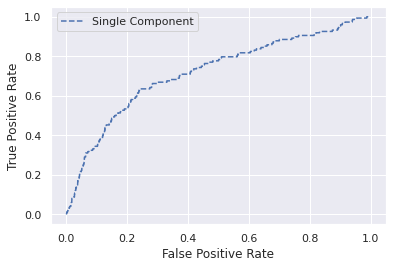

F1 score: 0.009
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V16   0.0001  0.110966  0.413374
0       NaN    NaN      V17   0.0001  0.070201  0.324324
0       NaN    NaN      V18   0.0001  0.235320  0.390438
0       NaN    NaN      V19   0.0001  0.257866  0.025397
0       NaN    NaN      V20   0.0001  0.281608  0.008909

[109 rows x 6 columns]
Epsilon: 0.0001


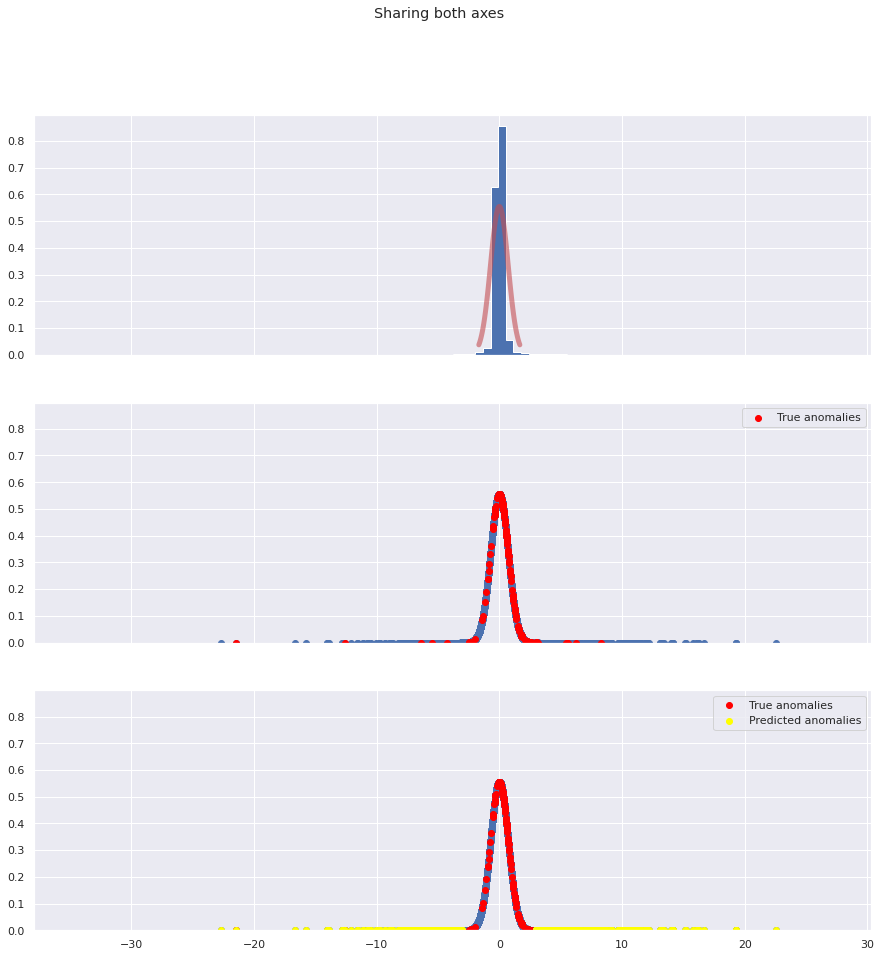

AUC: 0.198


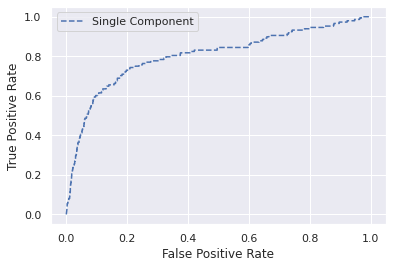

F1 score: 0.024
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V17   0.0001  0.070201  0.324324
0       NaN    NaN      V18   0.0001  0.235320  0.390438
0       NaN    NaN      V19   0.0001  0.257866  0.025397
0       NaN    NaN      V20   0.0001  0.281608  0.008909
0       NaN    NaN      V21   0.0001  0.197535  0.024096

[110 rows x 6 columns]
Epsilon: 0.0001


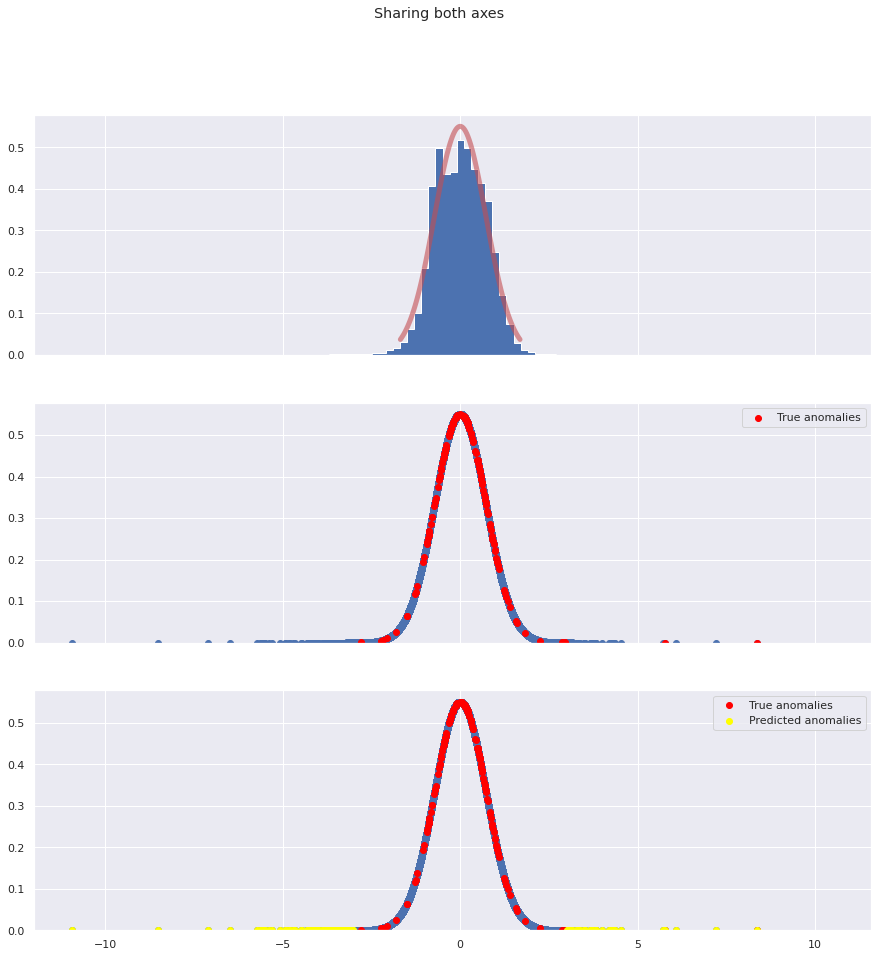

AUC: 0.450


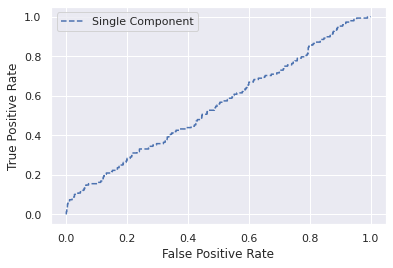

F1 score: 0.014
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V18   0.0001  0.235320  0.390438
0       NaN    NaN      V19   0.0001  0.257866  0.025397
0       NaN    NaN      V20   0.0001  0.281608  0.008909
0       NaN    NaN      V21   0.0001  0.197535  0.024096
0       NaN    NaN      V22   0.0001  0.450073  0.014134

[111 rows x 6 columns]
Epsilon: 0.0001


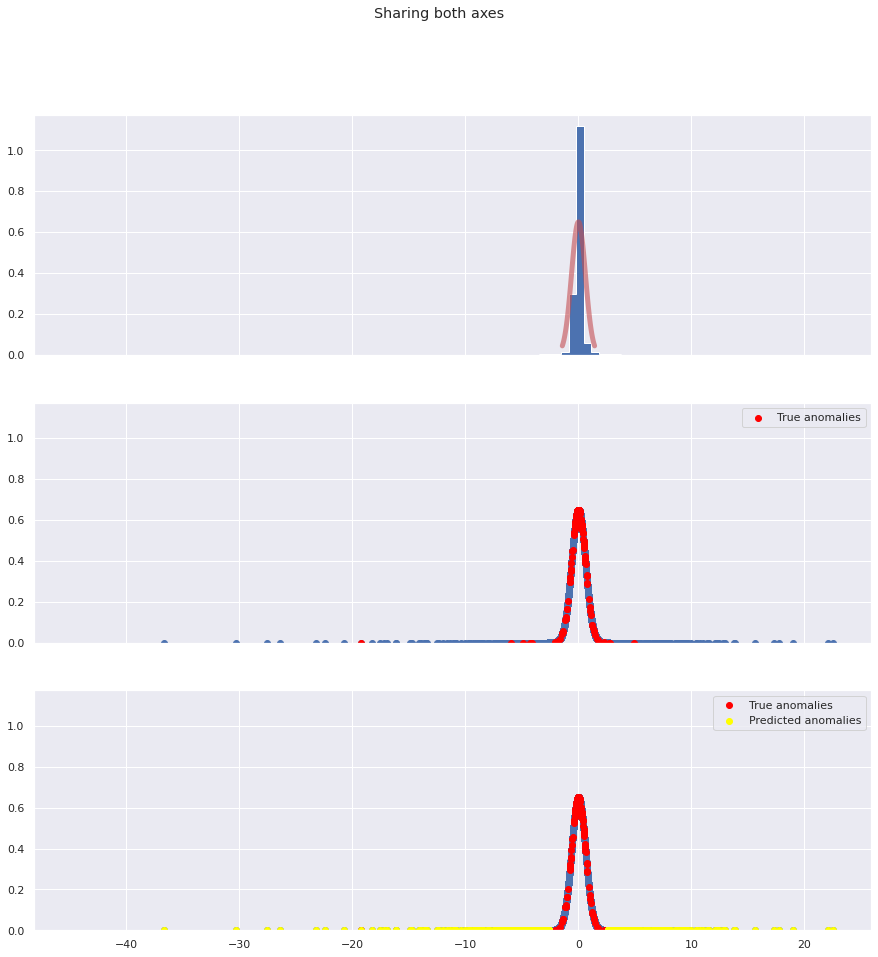

AUC: 0.318


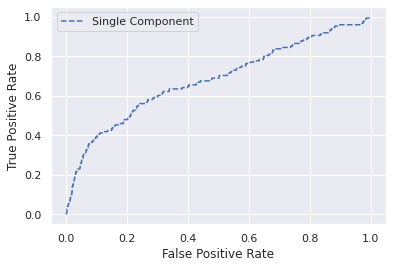

F1 score: 0.020
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V19   0.0001  0.257866  0.025397
0       NaN    NaN      V20   0.0001  0.281608  0.008909
0       NaN    NaN      V21   0.0001  0.197535  0.024096
0       NaN    NaN      V22   0.0001  0.450073  0.014134
0       NaN    NaN      V23   0.0001  0.318314  0.020382

[112 rows x 6 columns]
Epsilon: 0.0001


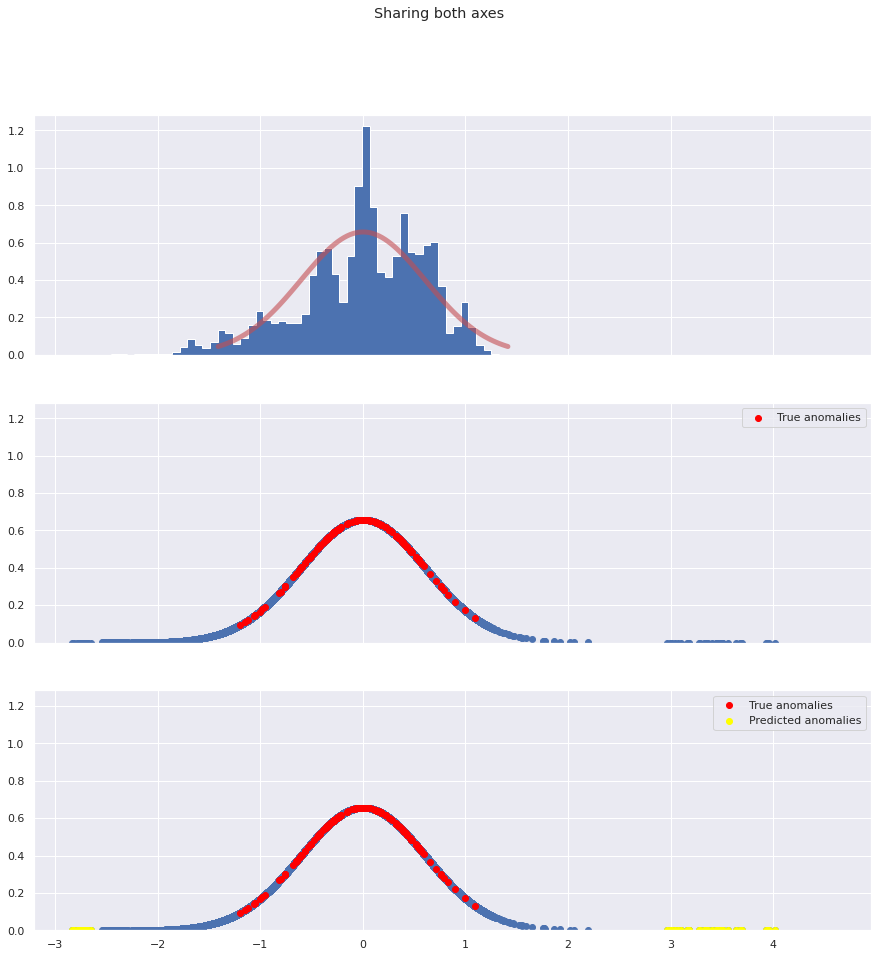

AUC: 0.518


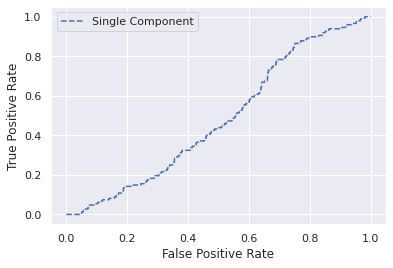

F1 score: 0.000
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V20   0.0001  0.281608  0.008909
0       NaN    NaN      V21   0.0001  0.197535  0.024096
0       NaN    NaN      V22   0.0001  0.450073  0.014134
0       NaN    NaN      V23   0.0001  0.318314  0.020382
0       NaN    NaN      V24   0.0001  0.517885  0.000000

[113 rows x 6 columns]
Epsilon: 0.0001


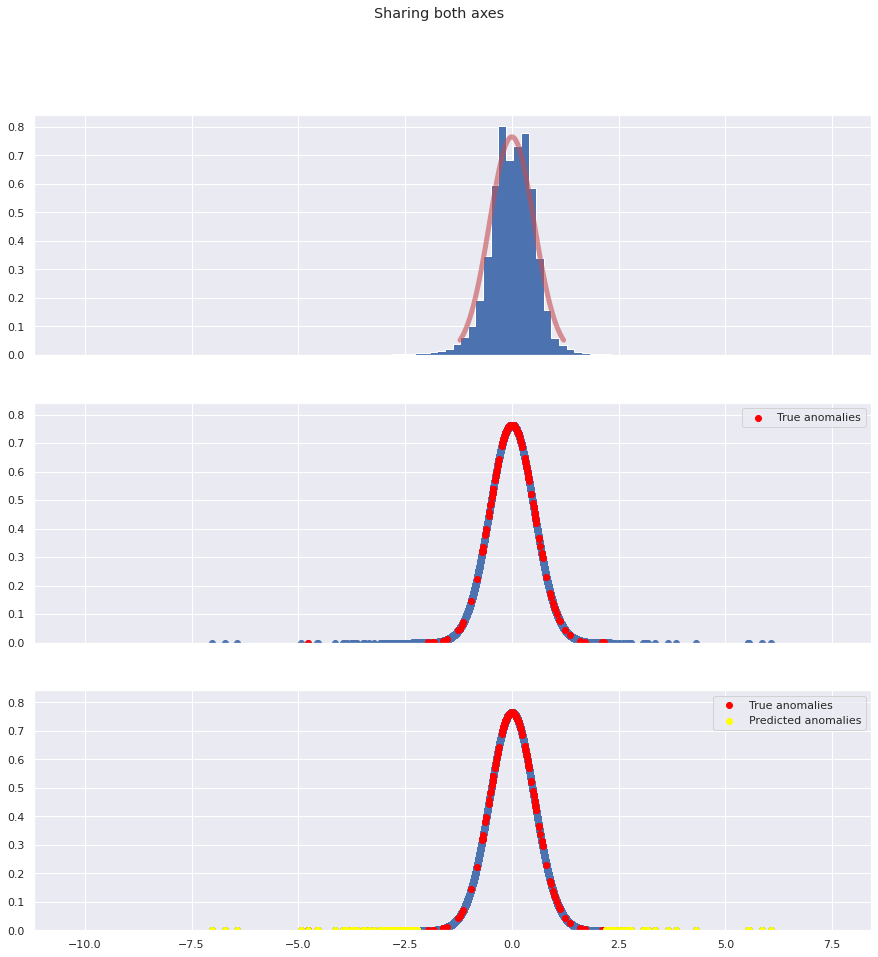

AUC: 0.438


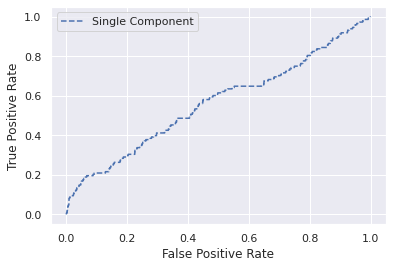

F1 score: 0.006
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V21   0.0001  0.197535  0.024096
0       NaN    NaN      V22   0.0001  0.450073  0.014134
0       NaN    NaN      V23   0.0001  0.318314  0.020382
0       NaN    NaN      V24   0.0001  0.517885  0.000000
0       NaN    NaN      V25   0.0001  0.437740  0.005731

[114 rows x 6 columns]
Epsilon: 0.0001


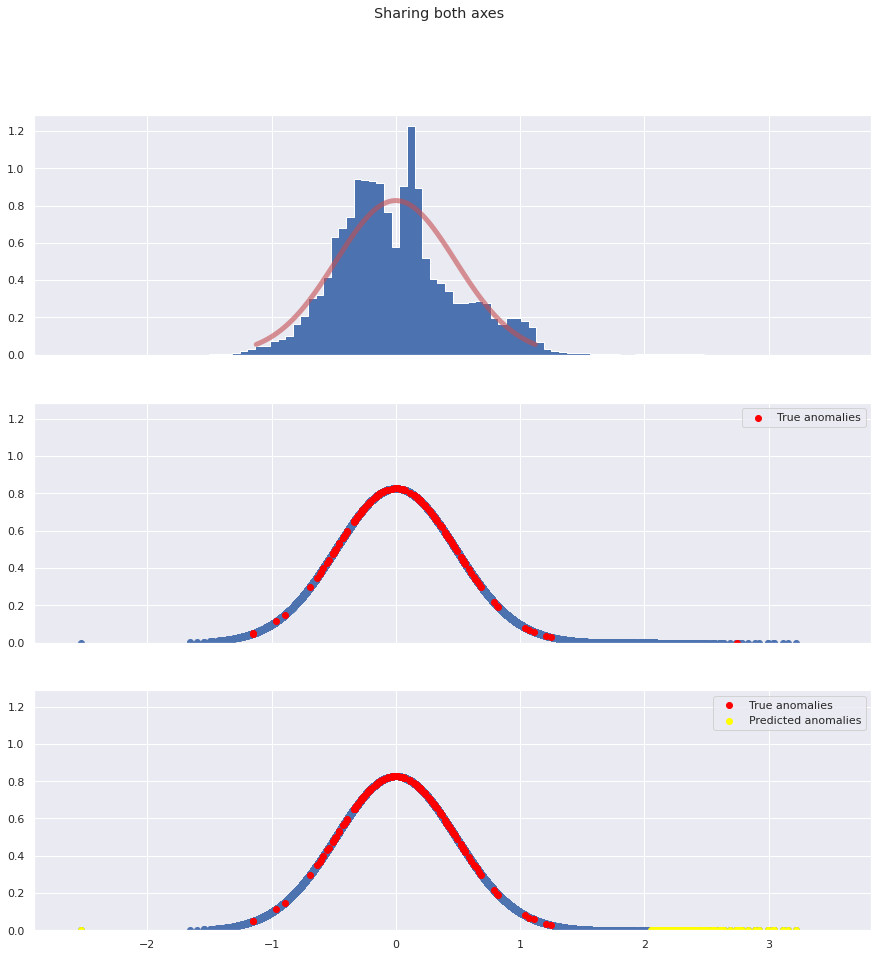

AUC: 0.495


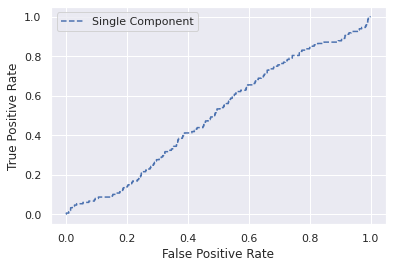

F1 score: 0.007
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V22   0.0001  0.450073  0.014134
0       NaN    NaN      V23   0.0001  0.318314  0.020382
0       NaN    NaN      V24   0.0001  0.517885  0.000000
0       NaN    NaN      V25   0.0001  0.437740  0.005731
0       NaN    NaN      V26   0.0001  0.494574  0.006873

[115 rows x 6 columns]
Epsilon: 0.0001


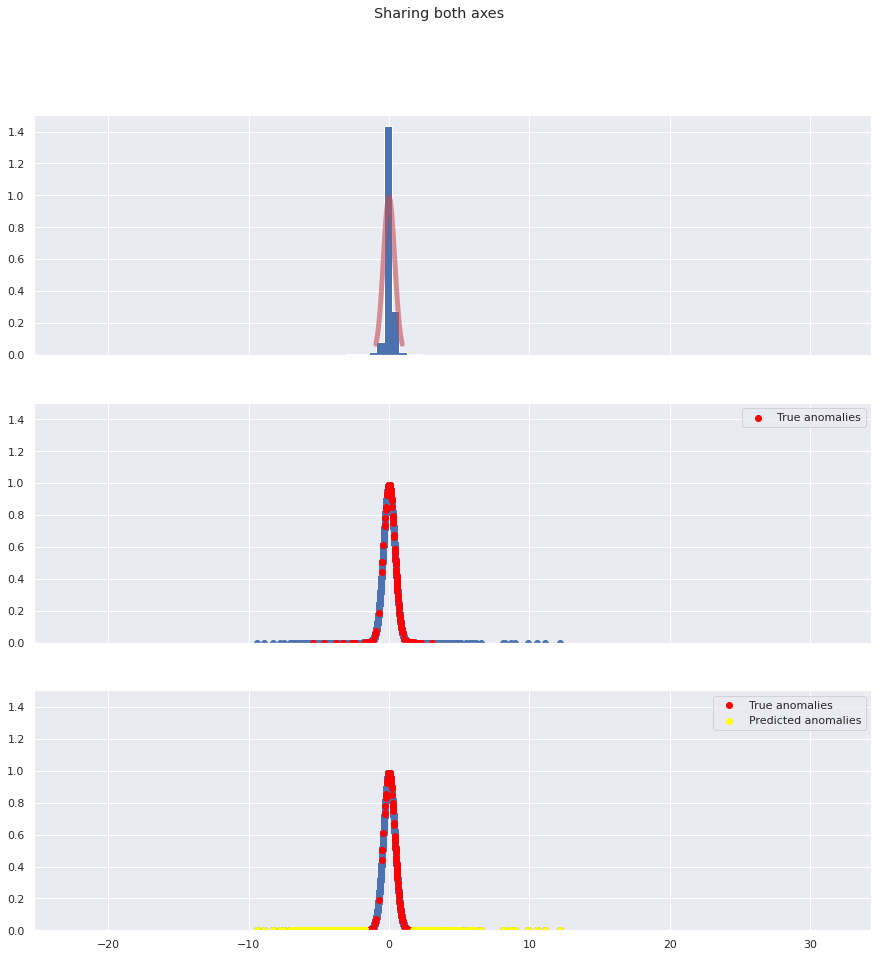

AUC: 0.185


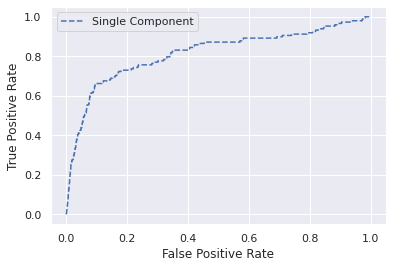

F1 score: 0.039
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V23   0.0001  0.318314  0.020382
0       NaN    NaN      V24   0.0001  0.517885  0.000000
0       NaN    NaN      V25   0.0001  0.437740  0.005731
0       NaN    NaN      V26   0.0001  0.494574  0.006873
0       NaN    NaN      V27   0.0001  0.185294  0.039216

[116 rows x 6 columns]
Epsilon: 0.0001


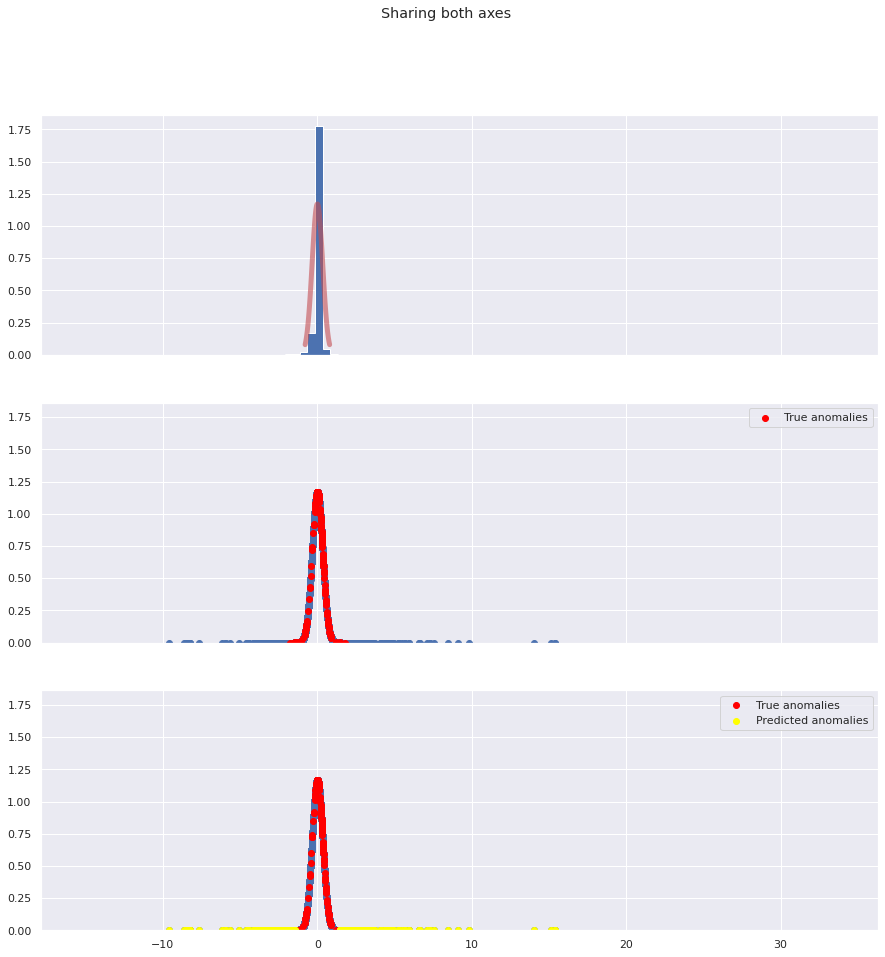

AUC: 0.199


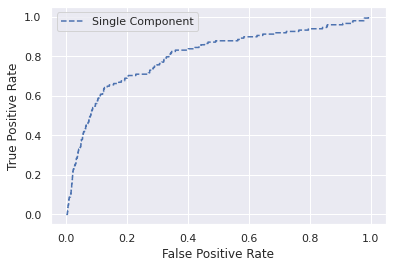

F1 score: 0.012
    level_0  index var_name  epsilon       AUC  F1_score
0       0.0    0.0      V11   0.0001  0.116556  0.558952
1       1.0    0.0      V11   0.0101  0.116556  0.278481
2       2.0    0.0      V11   0.0201  0.116556  0.166210
3       3.0    0.0      V11   0.0301  0.116556  0.115028
4       4.0    0.0      V11   0.0401  0.116556  0.089649
..      ...    ...      ...      ...       ...       ...
0       NaN    NaN      V24   0.0001  0.517885  0.000000
0       NaN    NaN      V25   0.0001  0.437740  0.005731
0       NaN    NaN      V26   0.0001  0.494574  0.006873
0       NaN    NaN      V27   0.0001  0.185294  0.039216
0       NaN    NaN      V28   0.0001  0.198540  0.012140

[117 rows x 6 columns]


In [55]:
for i in possible_vars: 
  var_name = i
  epsilon = optimal_epsilon
  print("Epsilon: {}".format(epsilon))

  arr = np.array(non_fraud_X_train[var_name])
  std_dev = np.std(arr)
  mean = np.mean(arr)


  norm = stats.norm(

      loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
      scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

  )



  fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
  fig.suptitle('Sharing both axes')



  x = np.linspace(norm.ppf(0.01),
                  norm.ppf(0.99), 100)
  axs[0].plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
  axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


  x = np.array(X_test[var_name])
  mu = mean
  sigma = std_dev
  probs = p_x(x, mu, sigma)
  preds = np.where(probs < epsilon, 1, 0)

  summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


  axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[1].legend()



  axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
  axs[2].legend()



  plt.show()


  fpr, tpr, thresholds = roc_curve(summary_df['y_test'], summary_df['p(x)'])
  auc = roc_auc_score(summary_df['y_test'], summary_df['p(x)'])
  print('AUC: %.3f' % auc)

  fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
  plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()


  from sklearn.metrics import f1_score

  f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
  print("F1 score: %.3f" % f1_score)

  new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

  results = results.append(new_results)
  results = results.drop_duplicates()
  print(results)

In [64]:
results = results[column_names]
results.reset_index(inplace=True)
results

index var_name  epsilon       AUC  F1_score
0        0      V11   0.0001  0.116556  0.558952
1        1      V11   0.0101  0.116556  0.278481
2        2      V11   0.0201  0.116556  0.166210
3        3      V11   0.0301  0.116556  0.115028
4        4      V11   0.0401  0.116556  0.089649
..     ...      ...      ...       ...       ...
112      0      V24   0.0001  0.517885  0.000000
113      0      V25   0.0001  0.437740  0.005731
114      0      V26   0.0001  0.494574  0.006873
115      0      V27   0.0001  0.185294  0.039216
116      0      V28   0.0001  0.198540  0.012140

[117 rows x 5 columns]

In [66]:
results.iloc[[results['AUC'].idxmax()]]

index var_name  epsilon       AUC  F1_score
112      0      V24   0.0001  0.517885       0.0

In [75]:
results[results['AUC'] == results['AUC'].min()]

index var_name  epsilon       AUC  F1_score
102    0.0      V14   0.0001  0.058754  0.390492

Epsilon: 0.0001


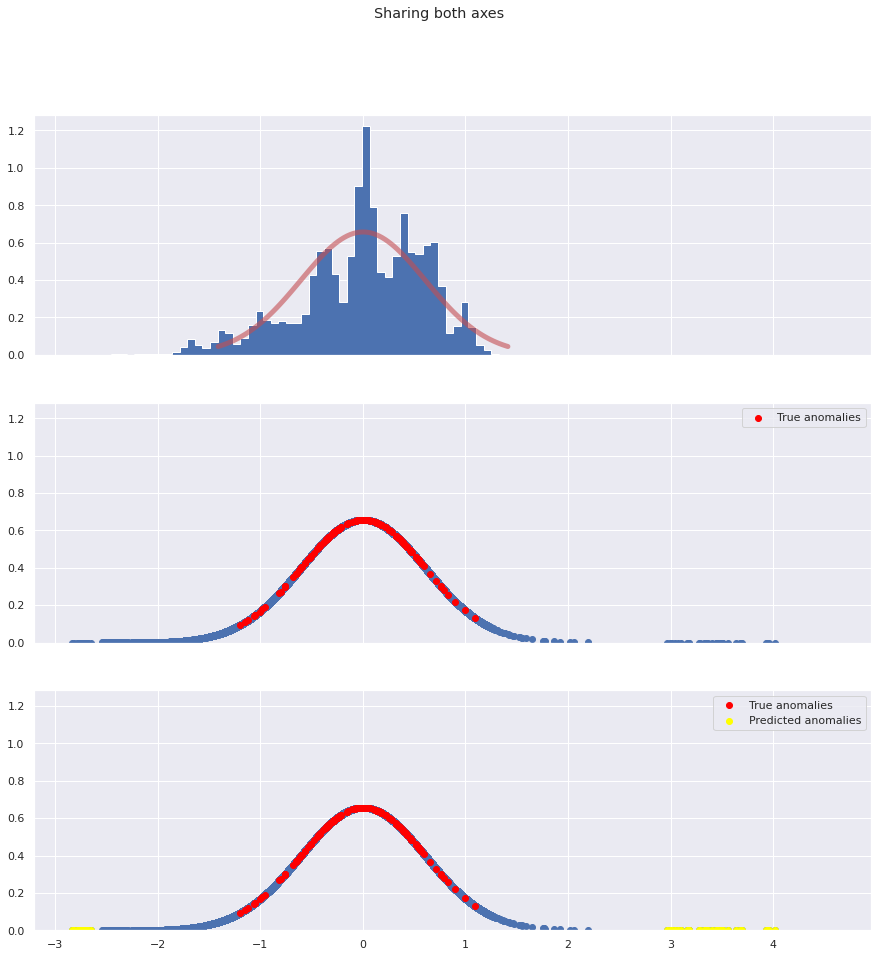

AUC: 0.518


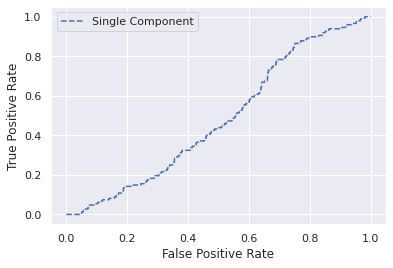

F1 score: 0.000
     index var_name  epsilon       AUC  F1_score
0      0.0      V11   0.0001  0.116556  0.558952
1      1.0      V11   0.0101  0.116556  0.278481
2      2.0      V11   0.0201  0.116556  0.166210
3      3.0      V11   0.0301  0.116556  0.115028
4      4.0      V11   0.0401  0.116556  0.089649
..     ...      ...      ...       ...       ...
113    0.0      V25   0.0001  0.437740  0.005731
114    0.0      V26   0.0001  0.494574  0.006873
115    0.0      V27   0.0001  0.185294  0.039216
116    0.0      V28   0.0001  0.198540  0.012140
0      NaN      V24   0.0001  0.517885  0.000000

[117 rows x 5 columns]


In [68]:
var_name = 'V24'
epsilon = optimal_epsilon
print("Epsilon: {}".format(epsilon))

arr = np.array(non_fraud_X_train[var_name])
std_dev = np.std(arr)
mean = np.mean(arr)


norm = stats.norm(

    loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)



fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
fig.suptitle('Sharing both axes')



x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
axs[0].plot(x, norm.pdf(x),
      'r-', lw=5, alpha=0.6, label='norm pdf')
axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


x = np.array(X_test[var_name])
mu = mean
sigma = std_dev
probs = p_x(x, mu, sigma)
preds = np.where(probs < epsilon, 1, 0)

summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
axs[1].legend()



axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
axs[2].legend()



plt.show()


fpr, tpr, thresholds = roc_curve(summary_df['y_test'], summary_df['p(x)'])
auc = roc_auc_score(summary_df['y_test'], summary_df['p(x)'])
print('AUC: %.3f' % auc)

fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


from sklearn.metrics import f1_score

f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
print("F1 score: %.3f" % f1_score)

new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

results = results.append(new_results)
results = results.drop_duplicates()
print(results)

In [77]:
summary_df

X_test      p(x)  y_test  y_pred
0     -0.101785  0.441241     0.0     0.0
1      0.353867  0.413162     0.0     0.0
2     -0.649766  0.339346     0.0     0.0
3     -0.012238  0.444537     0.0     0.0
4     -1.188354  0.182257     0.0     0.0
...         ...       ...     ...     ...
93982 -0.253898  0.425860     0.0     0.0
93983  1.290424  0.160569     0.0     0.0
93984  0.787677  0.305377     0.0     0.0
93985 -0.213648  0.431081     0.0     0.0
93986 -0.799210  0.296092     0.0     0.0

[93987 rows x 4 columns]

Epsilon: 0.0001


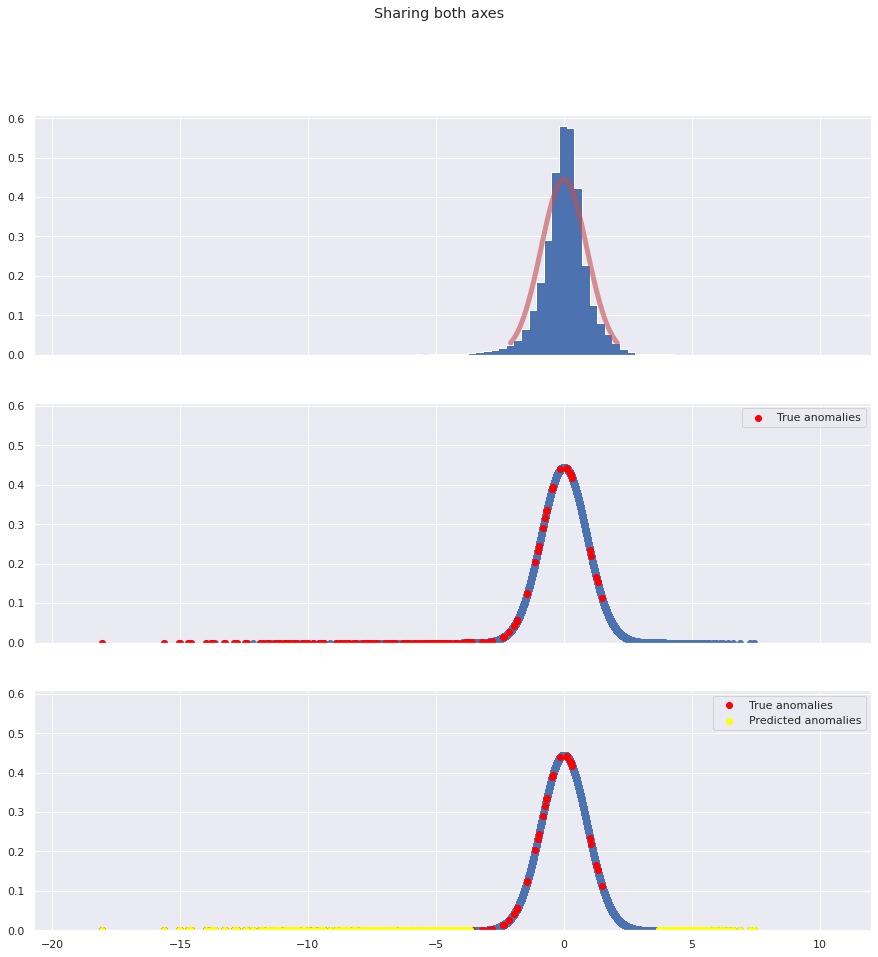

AUC: 0.059


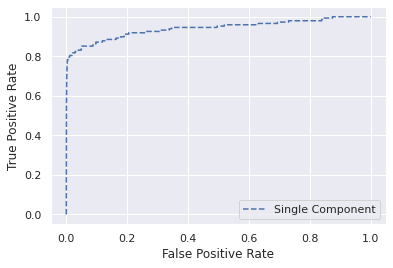

F1 score: 0.390
     index var_name  epsilon       AUC  F1_score
0      0.0      V11   0.0001  0.116556  0.558952
1      1.0      V11   0.0101  0.116556  0.278481
2      2.0      V11   0.0201  0.116556  0.166210
3      3.0      V11   0.0301  0.116556  0.115028
4      4.0      V11   0.0401  0.116556  0.089649
..     ...      ...      ...       ...       ...
116    0.0      V28   0.0001  0.198540  0.012140
0      NaN      V24   0.0001  0.517885  0.000000
0      NaN      V25   0.0001  0.437740  0.005731
0      NaN      V15   0.0001  0.461546  0.000000
0      NaN      V14   0.0001  0.058754  0.390492

[120 rows x 5 columns]


In [76]:
var_name = 'V14'
epsilon = optimal_epsilon
print("Epsilon: {}".format(epsilon))

arr = np.array(non_fraud_X_train[var_name])
std_dev = np.std(arr)
mean = np.mean(arr)


norm = stats.norm(

    loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)



fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
fig.suptitle('Sharing both axes')



x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
axs[0].plot(x, norm.pdf(x),
      'r-', lw=5, alpha=0.6, label='norm pdf')
axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


x = np.array(X_test[var_name])
mu = mean
sigma = std_dev
probs = p_x(x, mu, sigma)
preds = np.where(probs < epsilon, 1, 0)

summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
axs[1].legend()



axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
axs[2].legend()



plt.show()


fpr, tpr, thresholds = roc_curve(summary_df['y_test'], summary_df['p(x)'])
auc = roc_auc_score(summary_df['y_test'], summary_df['p(x)'])
print('AUC: %.3f' % auc)

fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


from sklearn.metrics import f1_score

f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
print("F1 score: %.3f" % f1_score)

new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

results = results.append(new_results)
results = results.drop_duplicates()
print(results)

In [80]:
results['F1_score'].max()

0.5589519650655023

# **Two Gaussians**

### Non Fraud Distribution

Epsilon: 0.0001


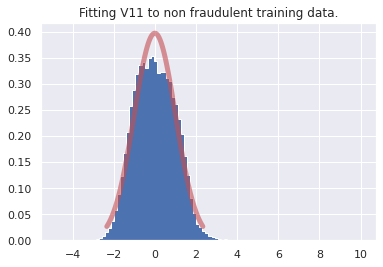

In [190]:
var_name = 'V11'
epsilon = optimal_epsilon
print("Epsilon: {}".format(epsilon))


### Non Fraud Data 
x_non_fraud = np.array(non_fraud_X_train[var_name])
sigma_non_fraud = np.std(x_non_fraud)
mu_non_fraud = np.mean(x_non_fraud)

norm = stats.norm(

    loc = mu_non_fraud,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = sigma_non_fraud ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)


fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(non_fraud_X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.title("Fitting {} to non fraudulent training data.".format(var_name))
plt.show()


### Fraud Distribution

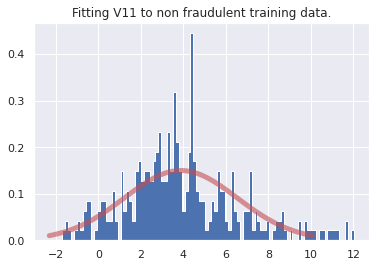

In [191]:
### Fraud Data 
x_fraud = np.array(fraud_X_train[var_name])
sigma_fraud = np.std(x_fraud)
mu_fraud = np.mean(x_fraud)

norm = stats.norm(

    loc = mu_fraud,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = sigma_fraud ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)


fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(fraud_X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.title("Fitting {} to non fraudulent training data.".format(var_name))
plt.show()


In [192]:
p_x(4, mu_fraud, sigma_fraud)

0.14974876146386093

In [193]:
p_x(4, mu_non_fraud, sigma_non_fraud)

0.00013761948202696986

In [195]:
p_fraud = p_x(X_train[var_name], mu_fraud, sigma_fraud)

p_non_fraud = p_x(X_train[var_name], mu_non_fraud, sigma_non_fraud)

data = {
    'var_name': [var_name]*len(X_train), 
    'X_train values': X_train[var_name], 
    'p_fraud': p_fraud, 
    'p_non_fraud': p_non_fraud
}

classifier_df = pd.DataFrame.from_dict(data)

In [196]:
classifier_df

var_name  X_train values   p_fraud  p_non_fraud
37372       V11        0.865235  0.078951     0.272580
215884      V11       -1.640814  0.017446     0.105574
98616       V11        0.795079  0.076602     0.288937
172195      V11       -0.177289  0.046923     0.391793
19496       V11       -1.451948  0.020162     0.140913
...         ...             ...       ...          ...
21440       V11        0.276998  0.059985     0.381951
117583      V11        0.113700  0.055101     0.394661
73349       V11       -0.395574  0.041269     0.368736
267336      V11        1.051043  0.085238     0.228143
128037      V11       -1.122580  0.025637     0.214205

[190820 rows x 4 columns]

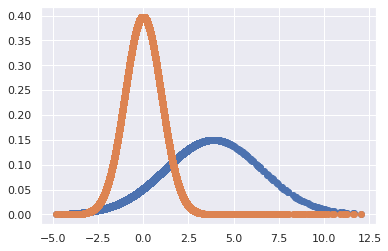

In [197]:
plt.scatter(classifier_df['X_train values'], classifier_df['p_fraud'])
plt.scatter(classifier_df['X_train values'], classifier_df['p_non_fraud'])

In [198]:
classifier_df['y_pred']  = classifier_df.p_fraud > classifier_df.p_non_fraud

In [199]:
classifier_df['y_pred'] =  classifier_df['y_pred'].astype(int)
classifier_df

var_name  X_train values   p_fraud  p_non_fraud  y_pred
37372       V11        0.865235  0.078951     0.272580       0
215884      V11       -1.640814  0.017446     0.105574       0
98616       V11        0.795079  0.076602     0.288937       0
172195      V11       -0.177289  0.046923     0.391793       0
19496       V11       -1.451948  0.020162     0.140913       0
...         ...             ...       ...          ...     ...
21440       V11        0.276998  0.059985     0.381951       0
117583      V11        0.113700  0.055101     0.394661       0
73349       V11       -0.395574  0.041269     0.368736       0
267336      V11        1.051043  0.085238     0.228143       0
128037      V11       -1.122580  0.025637     0.214205       0

[190820 rows x 5 columns]

In [200]:
y_train

Class
37372       0
215884      0
98616       0
172195      0
19496       0
...       ...
21440       0
117583      0
73349       0
267336      0
128037      0

[190820 rows x 1 columns]

In [201]:
classifier_df['y_true'] = y_train

In [202]:
classifier_df[classifier_df['y_pred']==1]

var_name  X_train values   p_fraud  p_non_fraud  y_pred  y_true
98375       V11        1.719513  0.107857     0.090583       1       0
19990       V11        1.645525  0.105410     0.102549       1       0
5957        V11        2.155400  0.121545     0.039056       1       0
102441      V11        4.406806  0.146984     0.000025       1       1
84389       V11        1.703593  0.107332     0.093077       1       0
...         ...             ...       ...          ...     ...     ...
118328      V11        2.091335  0.119630     0.044722       1       0
30869       V11        1.675528  0.106405     0.097581       1       0
33229       V11        2.113196  0.120288     0.042722       1       0
20793       V11        2.788166  0.137827     0.008232       1       0
101732      V11        1.841419  0.111823     0.072966       1       0

[9251 rows x 6 columns]

### ROC score from Two Gaussians and only one variable (V11)

In [203]:
roc_auc_score(classifier_df['y_true'], classifier_df['y_pred'])

0.886340072386584

## Part 3: Multivariate and Mixture of Gaussian Distribution [7 Marks]
We want to build an outlier detection model that boosts our F1 score compared to the last part. To design your model, you can benefit from:

*   Any number of features you want (multivariate).
*   You can fit your Gaussians only on non-fraudulent transactions or to both classes.
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).

It is up to you how to design your model. Try at least 5 different models and report the F1 score for each one. If your model requires a threshold to classify transactions, draw a ROC curve for each model, and compare them with part 2.1. Try to maximize your F1 score. What kind of model works better? How many features? Which features? How many Gaussians? How many components? Summarize your findings with tables and plots. 


**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


In [ ]:
### HERE ###